#### Università degli Studi di Torino - AA 2024/25
# Large Scale Data Analytics using Jupyter Notebook
## Exploring Movies Datasets: Trends, Visualisation and Insights

This notebook focuses on analyzing large-scale movie-related datasets. Through descriptive statistics, visualizations, and interactive queries, we aim to uncover insights about:
- The most popular and highly-rated movies
- Key actors, directors, and crew members
- Global film production trends
- Geographic patterns in movie releases and ratings

The analysis combines multiple datasets, including information on movies, actors, countries, reviews, and awards, to provide a comprehensive view of the film industry.

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from pymongo import MongoClient

### Import the Clean Data

In [383]:
# PostGRE Configuration
POSTGRES_USER = "postgres"
POSTGRES_PASSWORD = "admin"
POSTGRES_HOST = "localhost"
POSTGRES_PORT = "5432"
POSTGRES_DBNAME = "moviesdb"

db_engine = create_engine(f'postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DBNAME}')

In [384]:
movies_df = pd.read_sql('SELECT * FROM movies', db_engine)
movies_df.head()

id                                    movie_title    date tagline  \
0  1940091           The Making of Fear of a Blank Planet  2024.0    None   
1  1940092  UEFA Euro 2024 - Group A: Germany vs Scotland  2024.0    None   
2  1940093                                       Bathtime  2024.0    None   
3  1940094                                   Cadê, Achou!  2024.0    None   
4  1940095                                      Cucaracha  2024.0    None   

                                         description  minute  rating  
0  A documentary chronicling the production of Br...    47.0     NaN  
1  Germany plays Scotland in Group A match for UE...   100.0     NaN  
2                                               None     8.0     NaN  
3                                               None     2.0     NaN  
4                                               None     9.0     NaN

In [385]:
actors_df = pd.read_sql('SELECT * FROM actors', db_engine)
actors_df.head()

id               name    role  actor_id
0  1000001      Margot Robbie  Barbie         1
1  1000001       Ryan Gosling     Ken         2
2  1000001    America Ferrera  Gloria         3
3  1000001  Ariana Greenblatt   Sasha         4
4  1000001           Issa Rae  Barbie         5

In [386]:
countries_df = pd.read_sql('SELECT * FROM countries', db_engine)
countries_df.head()

id      country  country_id
0  1000001           UK           1
1  1000001          USA           2
2  1000002  South Korea           3
3  1000003          USA           4
4  1000004      Germany           5

In [387]:
crews_df = pd.read_sql('SELECT * FROM crews', db_engine)
crews_df.head()

id      role            name  crew_id
0  1000001  Director    Greta Gerwig        1
1  1000001  Producer    Tom Ackerley        2
2  1000001  Producer   Margot Robbie        3
3  1000001  Producer  Robbie Brenner        4
4  1000001  Producer    David Heyman        5

In [388]:
genres_df = pd.read_sql('SELECT * FROM genres', db_engine)
genres_df.head()

id      genre  genre_id
0  1000001     Comedy         1
1  1000001  Adventure         2
2  1000002     Comedy         3
3  1000002   Thriller         4
4  1000002      Drama         5

In [389]:
languages_df = pd.read_sql('SELECT * FROM languages', db_engine)
languages_df.head()

id              type language  language_id
0  1000001          Language  English            1
1  1000002  Primary language   Korean            2
2  1000002   Spoken language  English            3
3  1000002   Spoken language   German            4
4  1000002   Spoken language   Korean            5

In [390]:
posters_df = pd.read_sql('SELECT * FROM posters', db_engine)
posters_df.head()

id                                               link  poster_id
0  1070420  https://a.ltrbxd.com/resized/film-poster/1/5/9...      70347
1  1070421  https://a.ltrbxd.com/resized/film-poster/1/4/4...      70348
2  1070422  https://a.ltrbxd.com/resized/film-poster/7/9/6...      70349
3  1070423  https://a.ltrbxd.com/resized/film-poster/7/2/6...      70350
4  1070424  https://a.ltrbxd.com/resized/film-poster/4/5/8...      70351

In [391]:
releases_df = pd.read_sql('SELECT * FROM releases', db_engine)
releases_df.head()

id    country        date        type cont_rating  release_id
0  1000001    Andorra  2023-07-21  Theatrical        None           1
1  1000001  Argentina  2023-07-20  Theatrical         ATP           2
2  1000001  Australia  2023-07-19  Theatrical          PG           3
3  1000001  Australia  2023-10-01     Digital          PG           4
4  1000001    Austria  2023-07-20  Theatrical        None           5

In [392]:
studios_df = pd.read_sql('SELECT * FROM studios', db_engine)
studios_df.head()

id                   studio  studios_id
0  1000001  LuckyChap Entertainment           1
1  1000001             Heyday Films           2
2  1000001           NB/GG Pictures           3
3  1000001                   Mattel           4
4  1000001    Warner Bros. Pictures           5

In [393]:
themes_df = pd.read_sql('SELECT * FROM themes', db_engine)
themes_df.head()

id                                              theme  themes_id
0  1000001                   Humanity and the world around us          1
1  1000001                             Crude humor and satire          2
2  1000001                        Moving relationship stories          3
3  1000001     Emotional and captivating fantasy storytelling          4
4  1000001  Surreal and thought-provoking visions of life ...          5

In [394]:
# MongoDB Configuration
client = MongoClient("mongodb://localhost:27017/")
mongo_db = client["movies_data"]

In [395]:
reviews_collection = mongo_db["reviews"]
reviews_data = list(reviews_collection.find({})) # .find({}) find all documents
review_df = pd.DataFrame(reviews_data)
review_df.head()

_id rotten_tomatoes_link  \
0  67de8c87c8c9f9b21d247de2            m/0814255   
1  67de8c87c8c9f9b21d247de3            m/0814255   
2  67de8c87c8c9f9b21d247de4            m/0814255   
3  67de8c87c8c9f9b21d247de5            m/0814255   
4  67de8c87c8c9f9b21d247de6            m/0814255   

                                         movie_title       critic_name  \
0  Percy Jackson & the Olympians: The Lightning T...      Ben McEachen   
1  Percy Jackson & the Olympians: The Lightning T...      Nick Schager   
2  Percy Jackson & the Olympians: The Lightning T...  Bill Goodykoontz   
3  Percy Jackson & the Olympians: The Lightning T...    Jordan Hoffman   
4  Percy Jackson & the Olympians: The Lightning T...      Jim Schembri   

   top_critic           publisher_name review_type review_score review_date  \
0       False  Sunday Mail (Australia)       Fresh        3.5/5  2010-02-09   
1       False           Slant Magazine      Rotten          1/4  2010-02-10   
2        True         Arizona Republic       Fresh        3.5/5  2010-02-10   
3       False                      UGO       Fresh        3.7/5  2010-02-10   
4        True      The Age (Australia)       Fresh          3/5  2010-02-10   

                                      review_content  Updated_Score  
0  Whether audiences will get behind The Lightnin...           3.50  
1  Harry Potter knockoffs don't come more transpa...           1.25  
2  Percy Jackson isn't a great movie, but it's a ...           3.50  
3                         Fun, brisk and imaginative           3.70  
4  Crammed with dragons, set-destroying fights an...           3.00

In [396]:
oscars_collection = mongo_db["oscars"]
oscars_data = list(oscars_collection.find({}))
oscars_df = pd.DataFrame(oscars_data)
oscars_df.head()

_id  year_film  year_ceremony  ceremony category  \
0  67de8c8cc8c9f9b21d2ed932       1927           1928         1    ACTOR   
1  67de8c8cc8c9f9b21d2ed933       1927           1928         1    ACTOR   
2  67de8c8cc8c9f9b21d2ed934       1927           1928         1  ACTRESS   
3  67de8c8cc8c9f9b21d2ed935       1927           1928         1  ACTRESS   
4  67de8c8cc8c9f9b21d2ed936       1927           1928         1  ACTRESS   

                  name       movie_title  winner  
0  Richard Barthelmess         The Noose   False  
1        Emil Jannings  The Last Command    True  
2       Louise Dresser   A Ship Comes In   False  
3         Janet Gaynor        7th Heaven    True  
4       Gloria Swanson    Sadie Thompson   False

### Useful Functions


is_Disney return True if the Studio is one of many Disney Studios

In [397]:
def is_Disney(value):
    disney_names = ['Walt Disney Pictures',
 'Walt Disney Feature Animation',
 'Walt Disney Animation Studios',
 'The Walt Disney Company (Japan)',
 'Walt Disney Productions',
 'Walt Disney Animation',
 'Walt Disney Television',
 'Disney Television Animation',
 'DisneyToon Studios',
 'Walt Disney Studios',
 'Walt Disney Studio',
 'The Walt Disney Company France',
 'Walt Disney Animation Japan',
 'Disney Theatrical Group',
 'The Walt Disney Company Nordic',
 'Walt Disney Home Video',
 'Walt Disney Imagineering',
 'Walt Disney Studios Home Entertainment',
 'The Walt Disney Company EMEA',
 'The Walt Disney Company Korea',
 'Disneynature',
 'Disney World Cinema',
 'Walt Disney Television Alternative',
 'Disney Concerts',
 'Disney Original Documentary',
 'Disney Junior',
 'The Walt Disney Company',
 'The Walt Disney Company CIS',
 'Walt Disney Archives',
 'Walt Disney Theatrical',
 'Disneyland Paris',
 'The Walt Disney Company Germany',
 'Disney Broadcast Production',
 'The Walt Disney Company Italia',
 'Disney Educational Productions',
 'Disney HSM China Productions',
 'Walt Disney Pictures Kids',
 'Walt Disney World Resorts',
 'Disney Destinations',
 'Disney Channel',
 'Walt Disney',
 'Walt Disney Records',
 'Walt Disney Studios HE',
 'Disney Channel France',
 'Walt Disney Company Brasil',
 'Walt Disney Educational Materials Company',
 'Disney Research']
    if isinstance(value, str) and value in disney_names:
        return True
    else:
        return False

## Step 3: Data Understanding

Let's start our analysis with the evolution of the productions in the history of Cinema, of his films and his genres.

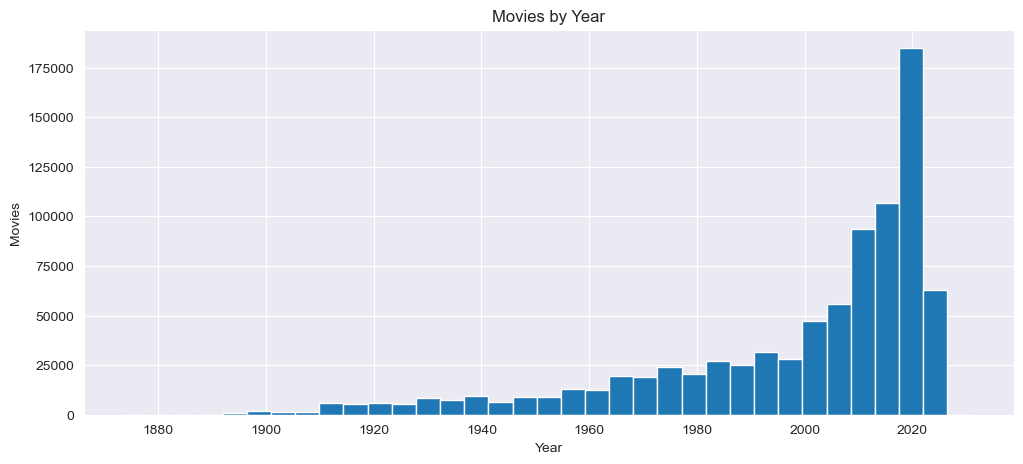

In [398]:
ax = movies_df['date'].plot(kind = 'hist', bins = 35, title = "Movies by Year", figsize = (12,5))
ax.set_xlabel('Year')
ax.set_ylabel('Movies')
plt.show()

In [399]:
movies_df.groupby('date').size().tail(10)

date
2022.0    40304
2023.0    43414
2024.0    18979
2025.0      341
2026.0       51
2027.0       12
2028.0        4
2029.0        3
2030.0        3
2031.0        1
dtype: int64

We can see that the productions are increasing from the beginning to the present day, with the exception of 2024 (the year of production of the dataset) and future years where some expected productions are inserted.

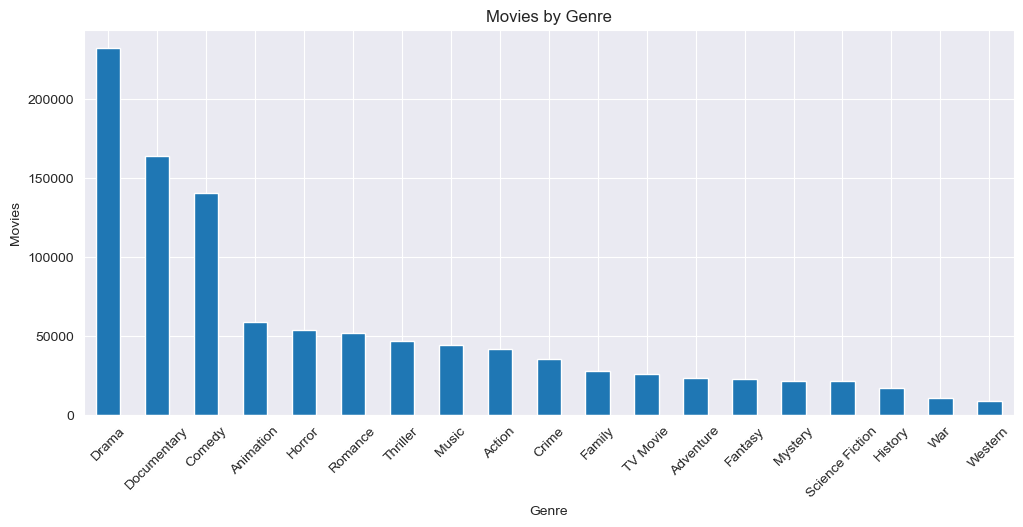

In [400]:
ax = genres_df['genre'].value_counts() \
    .plot(kind = 'bar', title = 'Movies by Genre', figsize = (12,5))
ax.set_xlabel('Genre')
ax.set_ylabel('Movies')
plt.xticks(rotation=45)
plt.show()

The most produced genres are "Drama", "Documentary" and "Comedy", followed by "Animation" and "Horror" movies.

Let's base our analysis on a path of evolution of cinema in its history. Historically, the birth of narrative cinema is attributed to the film "Le Voyage dans la Lune" (1904) by Georges Méliès. This is because, before that date, the movies produced are just shots of daily life. We decided to remove them from our analysis to focus on the history of Cinema that we see today.

Let's divide the story with a statistical perspective into 6 macro-groups:
- Birth of Cinema (1900-1920)
- Early Cinema (1920-1939)
- War Cinema (1939-1945)
- Postwar Cinema (1945-1960)
- Modern Cinema (1960-1990)
- Contemporary Cinema (1990-Today)

## Birth of Cinema (1900-1920)

Following the groundbreaking debut of narrative film with Le Voyage dans la Lune (1904), the first two decades of the 20th century marked the formative years of cinema as an expressive medium. During this period, filmmakers began to explore storytelling conventions, develop editing techniques, and establish genres that would later define the industry. Although production was still limited and silent films dominated the scene, the foundations of cinematic grammar were being laid. This era saw cinema gradually evolve from novelty to narrative, setting the stage for the artistic and industrial expansion that would follow.

In [401]:
birth_df = movies_df.loc[(movies_df['date'] >= 1900) & (movies_df['date'] < 1920)]
birth_df.head(10)

id              movie_title    date  \
604   1940963        Abseits vom Glück  1916.0   
866   1940964          The Spendthrift  1915.0   
867   1940965          Das achte Gebot  1915.0   
868   1940966  De lefvande dödas klubb  1914.0   
869   1940967       A Nursery In Paris  1909.0   
870   1940968   I klädloge och på scen  1908.0   
871   1940969        Danse fantaisiste  1902.0   
872   1940970                 La Gigue  1902.0   
873   1940971         Serpentine Dance  1902.0   
2629  1001121       A Trip to the Moon  1902.0   

                                                tagline  \
604                                                None   
866   A remarkable six-part adaptation of a sensatio...   
867                                                None   
868                                                None   
869                                                None   
870                                                None   
871                                                None   
872                                                None   
873                                                None   
2629                                               None   

                                            description  minute  rating  
604                                                None    68.0     NaN  
866   A remarkable six-part adaptation of a sensatio...    66.0     NaN  
867                                                None    31.0     NaN  
868   The suicidal gambler Tom Haget receives an inv...    53.0     NaN  
869                       Short film showing a nursery.     2.0     NaN  
870   Miss Inga Berentz dresses up for the entrance....     7.0     NaN  
871   "Danse fantaisiste" (Gaumont #589) is part of ...     NaN     NaN  
872   "La Gigue" (Gaumont #590) is part of the "Miss...     NaN     NaN  
873   "Danse serpentine" (Gaumont #588) is part of t...     2.0     NaN  
2629  Professor Barbenfouillis and five of his colle...    15.0    3.99

In [402]:
birth_df.count()

id             15815
movie_title    15815
date           15815
tagline          535
description    13829
minute         11026
rating           784
dtype: int64

In [403]:
birth_df['minute'].describe()

count    11026.000000
mean        23.557591
std         36.242672
min          1.000000
25%          5.000000
50%         11.000000
75%         35.000000
max        999.000000
Name: minute, dtype: float64

In [404]:
birth_df.loc[birth_df['minute'] > 60].count()

id             873
movie_title    873
date           873
tagline        118
description    800
minute         873
rating         103
dtype: int64

There are 15815 movies in this period, and only 873 are longer than 60 minutes. This could be caused by technical reasons, since film was measured in meters and not all cameras could exceed a certain amount. However, there are many movies that made the story of Cinema.

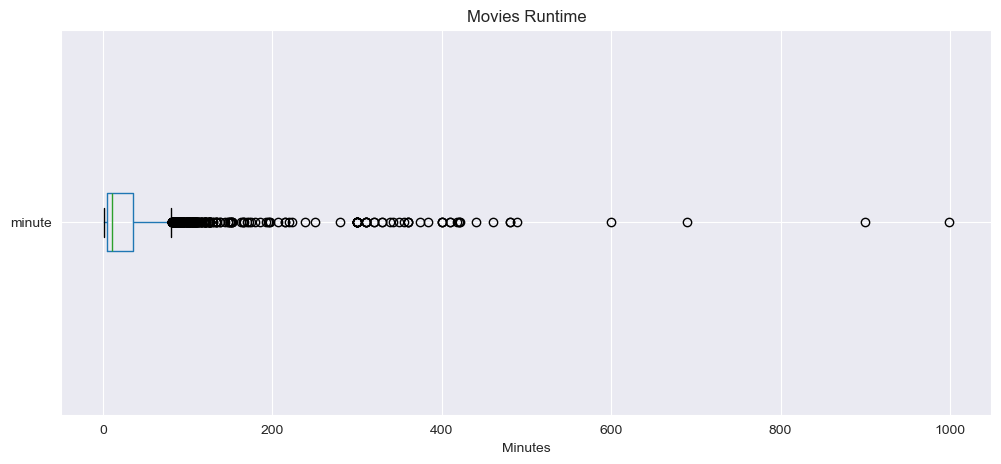

In [405]:
ax = birth_df.boxplot(column = 'minute', vert = False, figsize = (12,5))
ax.set_title("Movies Runtime")
ax.set_xlabel('Minutes')
plt.show()

In [406]:
outliers = birth_df.loc[(birth_df['minute'] > 240)]
outliers

id                                   movie_title    date  \
7855    1006302  The Vampires or, The Arch Criminals of Paris  1915.0   
22499   1020884                                      Fantômas  1913.0   
27116   1025501                                         Judex  1916.0   
34468   1032840                                      Tih Minh  1918.0   
52760   1051167                         The Perils of Pauline  1914.0   
56712   1055130                                      Barrabas  1919.0   
82739   1081239                        The Exploits of Elaine  1914.0   
96216   1094635                         The Mysteries of Myra  1916.0   
109140  1107541                                    Homunculus  1916.0   
133978  1132387                                 The Grey Rats  1918.0   
143378  1141801                   The Photo-Drama of Creation  1914.0   
163174  1161658                             The House of Hate  1918.0   
164027  1162511                      The Trail of the Octopus  1919.0   
164432  1162917                      The New Mission of Judex  1917.0   
165972  1164463                     The Crimson Stain Mystery  1916.0   
177573  1176020                     The Adventures of Kathlyn  1913.0   
199014  1197448                    The Million Dollar Mystery  1914.0   
215213  1213577             Lucille Love: The Girl of Mystery  1914.0   
222852  1221228                               The Broken Coin  1915.0   
224255  1222636                                 The Iron Claw  1916.0   
226484  1224862                                       Liberty  1916.0   
231137  1229515                                        Zudora  1914.0   
235549  1233958                         Sonka the Golden Hand  1914.0   
239820  1238248                          The Hazards of Helen  1917.0   
240309  1238763             The Adventures of Peg o' the Ring  1916.0   
256746  1255230                              Beatrice Fairfax  1916.0   
260435  1258930                             Pearl of the Army  1916.0   
262363  1260861                     A Lass of the Lumberlands  1916.0   
270892  1269321                               Lightning Bryce  1919.0   
276066  1274474                                        Patria  1917.0   
286109  1284494                               Satan's Protégé  1917.0   
297607  1295963                             The Cloth Peddler  1917.0   
316790  1315157                                     Who Pays?  1915.0   
319714  1318082                        The Adventures of Ruth  1919.0   
323009  1321379                              Wolves of Kultur  1918.0   
327383  1325763                                       Mefisto  1917.0   
363432  1361903                   The Secret of the Submarine  1915.0   
365799  1364263                                      Hands Up  1918.0   
376543  1374959                              The Masked Rider  1919.0   
447211  1445669               The Mystery of the Double Cross  1917.0   
448368  1446836                                The Master Key  1914.0   
454353  1452834                               The Carter Case  1919.0   
462958  1461448                      The Diamond from the Sky  1915.0   
472323  1470746                               The Eagle's Eye  1918.0   
479380  1477745                             The Tiger's Trail  1919.0   
486741  1485059                               The Purple Mask  1916.0   
573425  1571914                              The Great Gamble  1919.0   
600871  1599185                             The Yellow Menace  1916.0   
609800  1608087                                     Stingaree  1915.0   
684950  1683378                     The Adventures of Kathlyn  1916.0   

                                                  tagline  \
7855    Every second exciting — every second thrilling...   
22499                                                None   
27116                        A serial in twelve episodes.   
34468                                        

We have little documentation on some of these 56 titles, but it seems that most of them are serial titles, so they will be removed from our analysis.
There are only 50 titles longer than 240 minutes, and we have little documentation about them. Moreover, it seems that they are serial titles joined together, so we remove them from our analysis of the Movies Runtime.


In [407]:
runtime = birth_df.loc[(birth_df['minute'] <= 240)]

Let's see the distribution of the duration of those movies.

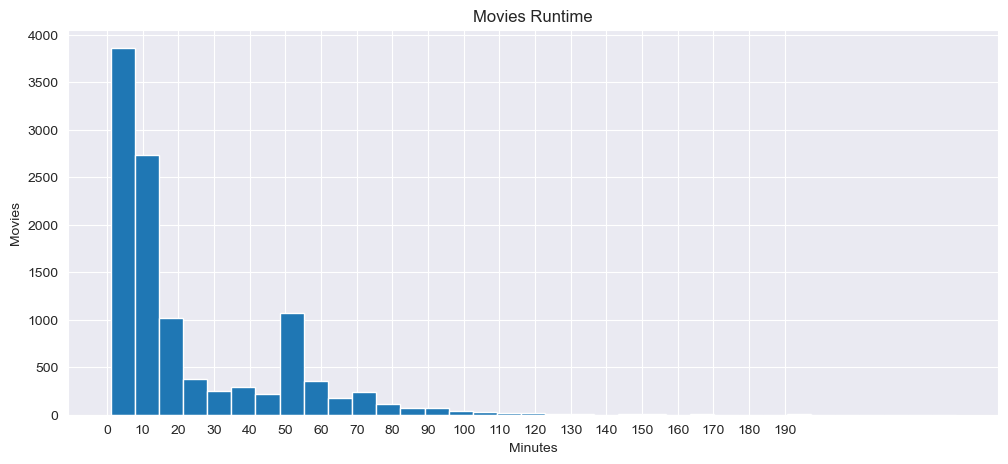

In [408]:
ax = runtime['minute'].plot(kind = 'hist', bins = 35, title = "Movies Runtime", figsize = (12,5))
ax.set_xlabel('Minutes')
ax.set_ylabel('Movies')
plt.xticks(np.arange(0, 200, 10))
plt.show()

In [409]:
runtime['minute'].describe()

count    10976.000000
mean        21.893586
std         24.869562
min          1.000000
25%          5.000000
50%         11.000000
75%         34.000000
max        238.000000
Name: minute, dtype: float64

The average, as expected, is about 22 minutes. Despite this, there is a considerable number of films that are close to the length we are used to with modern productions.

Let's see the ratings of those films.

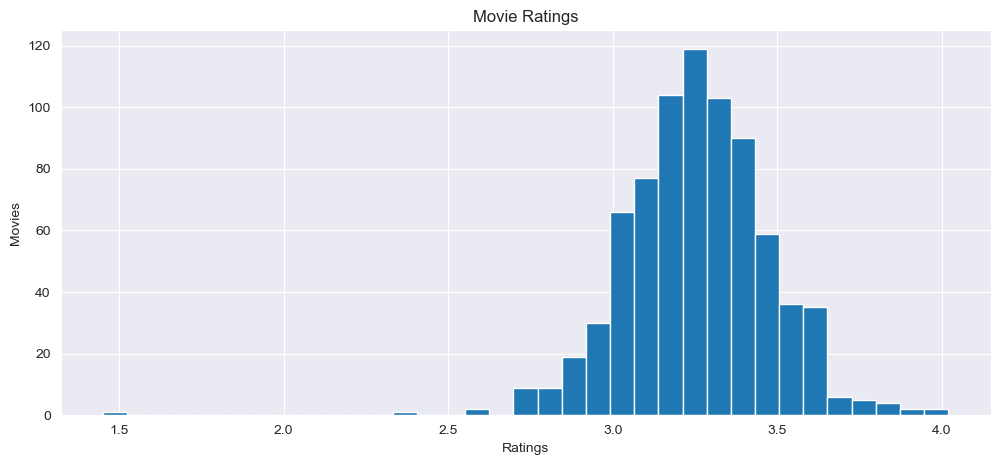

In [410]:
ax = runtime['rating'].plot(kind = 'hist', bins = 35, title = "Movie Ratings", figsize = (12,5))
ax.set_xlabel('Ratings')
ax.set_ylabel('Movies')
plt.show()

In [411]:
runtime['rating'].describe()

count    779.000000
mean       3.255263
std        0.220728
min        1.450000
25%        3.120000
50%        3.260000
75%        3.390000
max        4.020000
Name: rating, dtype: float64

The average rating is considerably high, this is because many of the films that constitute this phase of the history of Cinema are considered very important for its evolution.

Let's compare them with the ratings of Rotten Tomatoes.

In [412]:
rotten_rev = pd.merge(birth_df, review_df, on='movie_title', how='left')
rotten_rev

id                  movie_title    date  \
0      1940963            Abseits vom Glück  1916.0   
1      1940964              The Spendthrift  1915.0   
2      1940965              Das achte Gebot  1915.0   
3      1940966      De lefvande dödas klubb  1914.0   
4      1940967           A Nursery In Paris  1909.0   
...        ...                          ...     ...   
37127  1904088         Das Tagebuch Collins  1915.0   
37128  1904089   The Fair God of Sun Island  1915.0   
37129  1904090       Problematische Naturen  1913.0   
37130  1923642                Arthur Imhoff  1916.0   
37131  1932856  The Little Spreewald Maiden  1910.0   

                                                 tagline  \
0                                                   None   
1      A remarkable six-part adaptation of a sensatio...   
2                                                   None   
3                                                   None   
4                                                   None   
...                                                  ...   
37127                                               None   
37128                                               None   
37129                                               None   
37130                                               None   
37131                                               None   

                                             description  minute  rating  _id  \
0                                                   None    68.0     NaN  NaN   
1      A remarkable six-part adaptation of a sensatio...    66.0     NaN  NaN   
2                                                   None    31.0     NaN  NaN   
3      The suicidal gambler Tom Haget receives an inv...    53.0     NaN  NaN   
4                          Short film showing a nursery.     2.0     NaN  NaN   
...                                                  ...     ...     ...  ...   
37127                                               None     NaN     NaN  NaN   
37128  Captain Harding, grown rich by illegally colle...    30.0     NaN  NaN   
37129                                               None     NaN     NaN  NaN   
37130                                               None    60.0     NaN  NaN   
37131  Two American ladies touring through Germany ha...     NaN     NaN  NaN   

      rotten_tomatoes_link critic_name top_critic publisher_name review_type  \
0                      NaN         NaN        NaN            NaN         NaN   
1                      NaN         NaN        NaN            NaN         NaN   
2                      NaN         NaN        NaN            NaN         NaN   
3                      NaN         NaN        NaN            NaN         NaN   
4                      NaN         NaN        NaN            NaN         NaN   
...                    ...         ...        ...            ...         ...   
37127                  NaN         NaN        NaN            NaN         NaN   
37128                  NaN         NaN        NaN            NaN         NaN   
37129                  NaN         NaN        NaN            NaN         NaN   
37130                  NaN         NaN        NaN            NaN         NaN   
37131                  NaN         NaN        NaN            NaN         NaN   

      review_score review_date review_content  Updated_Score  
0              NaN         NaT            NaN            NaN  
1              NaN         NaT            NaN            NaN  
2              NaN         NaT            NaN            NaN  
3              NaN         NaT            NaN            NaN  
4              NaN         NaT            NaN            NaN  
...            ...         ...            ...            ...  
37127          NaN         NaT            NaN            NaN  
37128          NaN         NaT            NaN            NaN  
37129          NaN         NaT            NaN            NaN  
37130          NaN         NaT            NaN            NaN  
371

In [413]:
rotten_rev['Updated_Score'].describe()

count    21661.000000
mean         3.168686
std          1.025382
min          0.000000
25%          2.500000
50%          3.125000
75%          4.000000
max          5.000000
Name: Updated_Score, dtype: float64

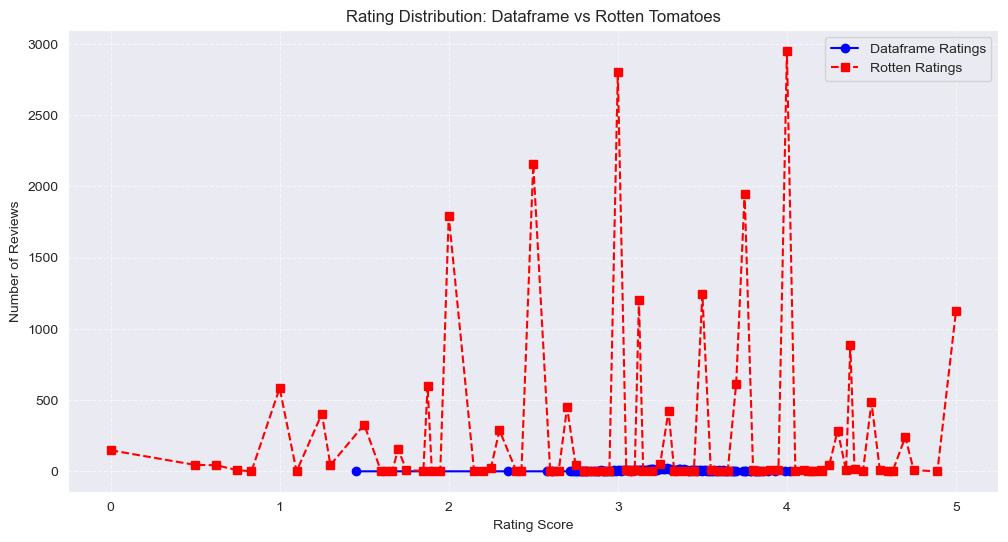

In [414]:
review_counter = birth_df['rating'].value_counts().sort_index()
rotten_counter = rotten_rev['Updated_Score'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.plot(review_counter.index, review_counter.values, marker='o', linestyle='-', label='Dataframe Ratings', color='blue')
plt.plot(rotten_counter.index, rotten_counter.values, marker='s', linestyle='--', label='Rotten Ratings', color='red')
plt.title("Rating Distribution: Dataframe vs Rotten Tomatoes")
plt.xlabel("Rating Score")
plt.ylabel("Number of Reviews")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

We can observe a significant discrepancy between the Rotten Tomatoes reviews and those in the dataframe, the latter being so few in number that their graph appears almost flat.

Let's now see an analysis of the predominant genres.

In [415]:
birth_genres = pd.merge(birth_df, genres_df, on='id', how='left')
birth_genres.head(10)

id              movie_title    date  \
0  1940963        Abseits vom Glück  1916.0   
1  1940964          The Spendthrift  1915.0   
2  1940965          Das achte Gebot  1915.0   
3  1940966  De lefvande dödas klubb  1914.0   
4  1940967       A Nursery In Paris  1909.0   
5  1940968   I klädloge och på scen  1908.0   
6  1940969        Danse fantaisiste  1902.0   
7  1940970                 La Gigue  1902.0   
8  1940971         Serpentine Dance  1902.0   
9  1001121       A Trip to the Moon  1902.0   

                                             tagline  \
0                                               None   
1  A remarkable six-part adaptation of a sensatio...   
2                                               None   
3                                               None   
4                                               None   
5                                               None   
6                                               None   
7                                               None   
8                                               None   
9                                               None   

                                         description  minute  rating  \
0                                               None    68.0     NaN   
1  A remarkable six-part adaptation of a sensatio...    66.0     NaN   
2                                               None    31.0     NaN   
3  The suicidal gambler Tom Haget receives an inv...    53.0     NaN   
4                      Short film showing a nursery.     2.0     NaN   
5  Miss Inga Berentz dresses up for the entrance....     7.0     NaN   
6  "Danse fantaisiste" (Gaumont #589) is part of ...     NaN     NaN   
7  "La Gigue" (Gaumont #590) is part of the "Miss...     NaN     NaN   
8  "Danse serpentine" (Gaumont #588) is part of t...     2.0     NaN   
9  Professor Barbenfouillis and five of his colle...    15.0    3.99   

             genre   genre_id  
0            Drama  1046493.0  
1            Drama  1046494.0  
2            Drama  1046495.0  
3            Drama  1046496.0  
4              NaN        NaN  
5           Comedy  1046497.0  
6            Music  1046498.0  
7            Music  1046499.0  
8            Music  1046500.0  
9  Science Fiction     3009.0

In [416]:
birth_genres['genre'].value_counts()

genre
Drama              4466
Comedy             3363
Documentary        1450
Western            1090
Romance             701
Crime               445
Fantasy             424
Animation           345
Adventure           335
Horror              321
War                 295
History             263
Thriller            222
Action              180
Mystery             156
Science Fiction      87
Music                51
Family               44
Name: count, dtype: int64

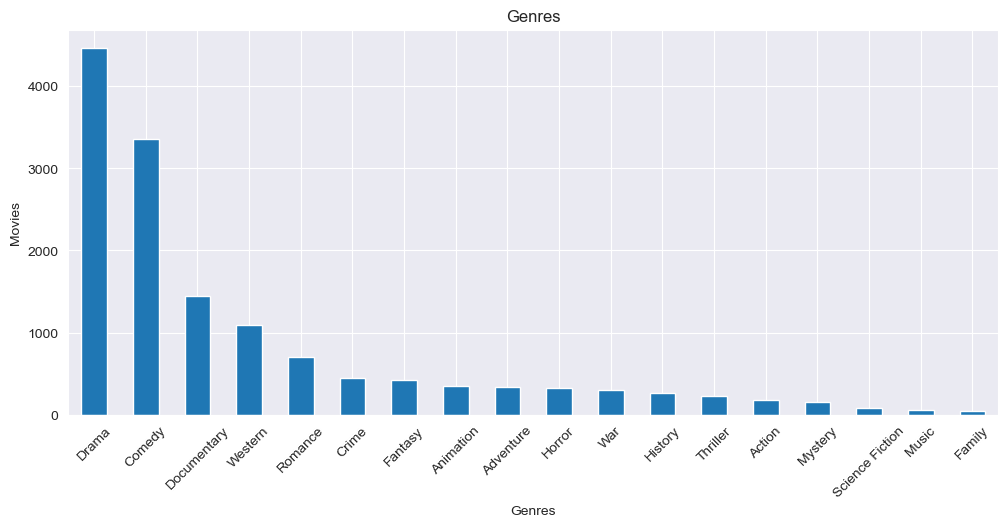

In [417]:
ax = birth_genres['genre'].value_counts() \
    .plot(kind = 'bar', title = "Genres", figsize = (12,5))
ax.set_xlabel('Genres')
ax.set_ylabel('Movies')
plt.xticks(rotation=45)
plt.show()

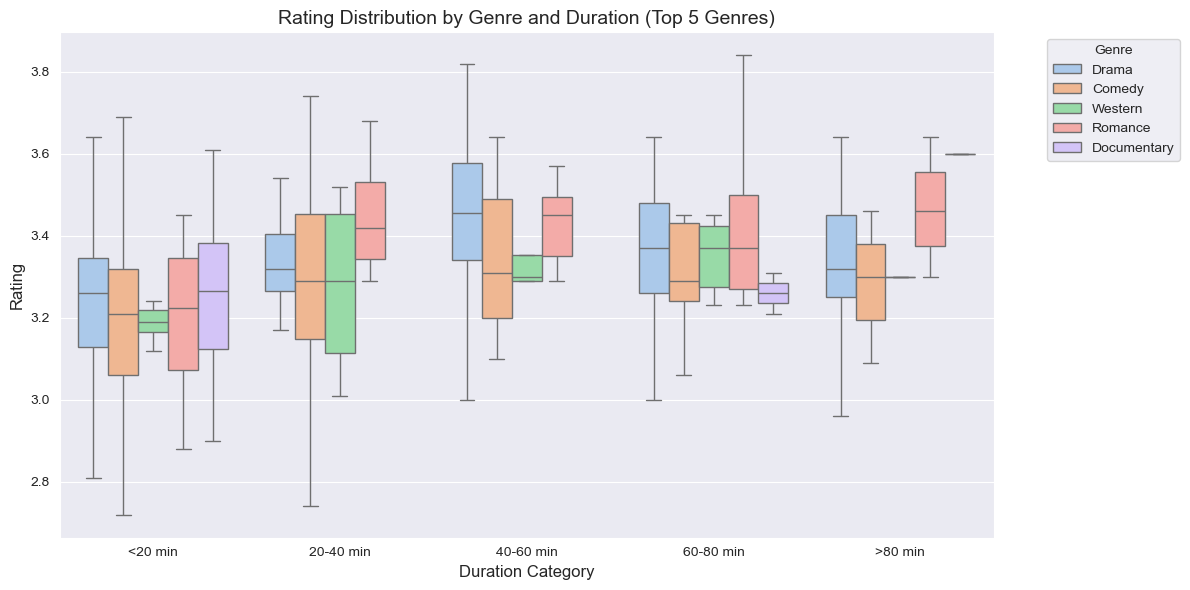

In [418]:
# Create columns by duration
birth_genres['minute'] = pd.cut(
    birth_genres['minute'], bins=[0, 20, 40, 60, 80, 100],
    labels=['<20 min', '20-40 min', '40-60 min', '60-80 min', '>80 min']
)

# Let's pick the 5 most common genres
top_genres = birth_genres['genre'].value_counts().head(5).index
filtered_data = birth_genres[birth_genres['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='minute', y='rating', hue='genre', data=filtered_data,
    palette='pastel', showfliers=False  # Lighter palette and removal of the outsider
)

plt.title("Rating Distribution by Genre and Duration (Top 5 Genres)", fontsize=14)
plt.xlabel("Duration Category", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

The predominant genres are Drama, Comedy and Documentary. We can note a prominence for the Western and Fantasy genres, and a notable number of animated films.

Let's now see which Countries stand out and which Studios are part of this period

In [419]:
birth_countries = pd.merge(birth_df, countries_df, on='id', how='left')
birth_countries.head(10)

id              movie_title    date  \
0  1940963        Abseits vom Glück  1916.0   
1  1940964          The Spendthrift  1915.0   
2  1940965          Das achte Gebot  1915.0   
3  1940966  De lefvande dödas klubb  1914.0   
4  1940967       A Nursery In Paris  1909.0   
5  1940968   I klädloge och på scen  1908.0   
6  1940969        Danse fantaisiste  1902.0   
7  1940970                 La Gigue  1902.0   
8  1940971         Serpentine Dance  1902.0   
9  1001121       A Trip to the Moon  1902.0   

                                             tagline  \
0                                               None   
1  A remarkable six-part adaptation of a sensatio...   
2                                               None   
3                                               None   
4                                               None   
5                                               None   
6                                               None   
7                                               None   
8                                               None   
9                                               None   

                                         description  minute  rating  country  \
0                                               None    68.0     NaN  Germany   
1  A remarkable six-part adaptation of a sensatio...    66.0     NaN      USA   
2                                               None    31.0     NaN  Germany   
3  The suicidal gambler Tom Haget receives an inv...    53.0     NaN   Sweden   
4                      Short film showing a nursery.     2.0     NaN      USA   
5  Miss Inga Berentz dresses up for the entrance....     7.0     NaN   Sweden   
6  "Danse fantaisiste" (Gaumont #589) is part of ...     NaN     NaN   France   
7  "La Gigue" (Gaumont #590) is part of the "Miss...     NaN     NaN   France   
8  "Danse serpentine" (Gaumont #588) is part of t...     2.0     NaN   France   
9  Professor Barbenfouillis and five of his colle...    15.0    3.99   France   

   country_id  
0    692823.0  
1    692824.0  
2    692825.0  
3    692826.0  
4    692827.0  
5    692828.0  
6    692829.0  
7    692830.0  
8    692831.0  
9      1590.0

In [420]:
birth_countries['country'].value_counts()

country
USA           6735
France        1723
Germany        830
UK             776
Italy          413
              ... 
Taiwan           1
Ethiopia         1
Montenegro       1
Israel           1
Indonesia        1
Name: count, Length: 62, dtype: int64

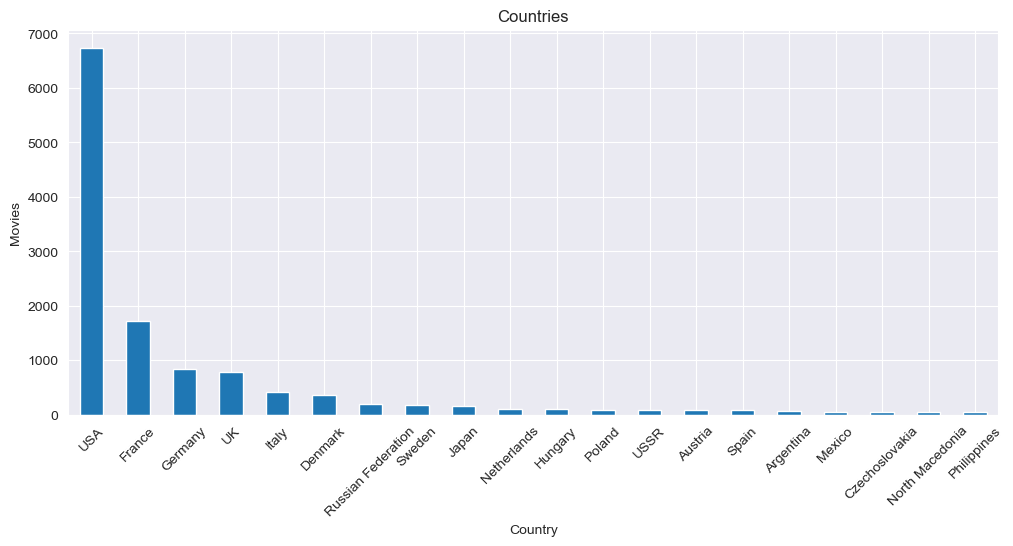

In [421]:
ax = birth_countries['country'].value_counts().head(20) \
    .plot(kind = 'bar', title = "Countries", figsize = (12,5))
ax.set_xlabel('Country')
ax.set_ylabel('Movies')
plt.xticks(rotation=45)
plt.show()

Let's see a geolocalized graph

In [422]:
import geopandas as gpd

In [423]:
shapefile_path = 'data/geodata/ne_110m_admin_0_countries.shp'
countries_gdf = gpd.read_file(shapefile_path)
countries_gdf

featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0    Admin-0 country          1          6                         Fiji   
1    Admin-0 country          1          3  United Republic of Tanzania   
2    Admin-0 country          1          7               Western Sahara   
3    Admin-0 country          1          2                       Canada   
4    Admin-0 country          1          2     United States of America   
..               ...        ...        ...                          ...   
172  Admin-0 country          1          5           Republic of Serbia   
173  Admin-0 country          1          6                   Montenegro   
174  Admin-0 country          1          6                       Kosovo   
175  Admin-0 country          1          5          Trinidad and Tobago   
176  Admin-0 country          1          3                  South Sudan   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0      FJI         0      2  Sovereign country   1   
1      TZA         0      2  Sovereign country   1   
2      SAH         0      2      Indeterminate   1   
3      CAN         0      2  Sovereign country   1   
4      US1         1      2            Country   1   
..     ...       ...    ...                ...  ..   
172    SRB         0      2  Sovereign country   1   
173    MNE         0      2  Sovereign country   1   
174    KOS         0      2           Disputed   1   
175    TTO         0      2  Sovereign country   1   
176    SDS         0      2  Sovereign country   1   

                           ADMIN  ...        FCLASS_TR     FCLASS_ID  \
0                           Fiji  ...             None          None   
1    United Republic of Tanzania  ...             None          None   
2                 Western Sahara  ...     Unrecognized  Unrecognized   
3                         Canada  ...             None          None   
4       United States of America  ...             None          None   
..                           ...  ...              ...           ...   
172           Republic of Serbia  ...             None          None   
173                   Montenegro  ...             None          None   
174                       Kosovo  ...  Admin-0 country  Unrecognized   
175          Trinidad and Tobago  ...             None          None   
176                  South Sudan  ...             None          None   

           FCLASS_PL     FCLASS_GR        FCLASS_IT        FCLASS_NL  \
0               None          None             None             None   
1               None          None             None             None   
2       Unrecognized          None             None     Unrecognized   
3               None          None             None             None   
4               None          None             None             None   
..               ...           ...              ...              ...   
172             None          None             None             None   
173             None          None             None             None   
174  Admin-0 country  Unrecognized  Admin-0 country  Admin-0 country   
175             None          None             None             None   
176             None          None             None             None   

           FCLASS_SE        FCLASS_BD     FCLASS_UA  \
0               None             None          None   
1               None             None          None   
2               None             None          None   
3               None             None          None   
4               None             None          None   
..               ...              ...           ...   
172             None             None          None   
173             None             None          None   
174  Admin-0 country  Admin-0 country  Unrecognized   
175             None             None          None   
176             None             None          None   

                                              geometry  
0    MULTIPO

USA? 1
UK? 1


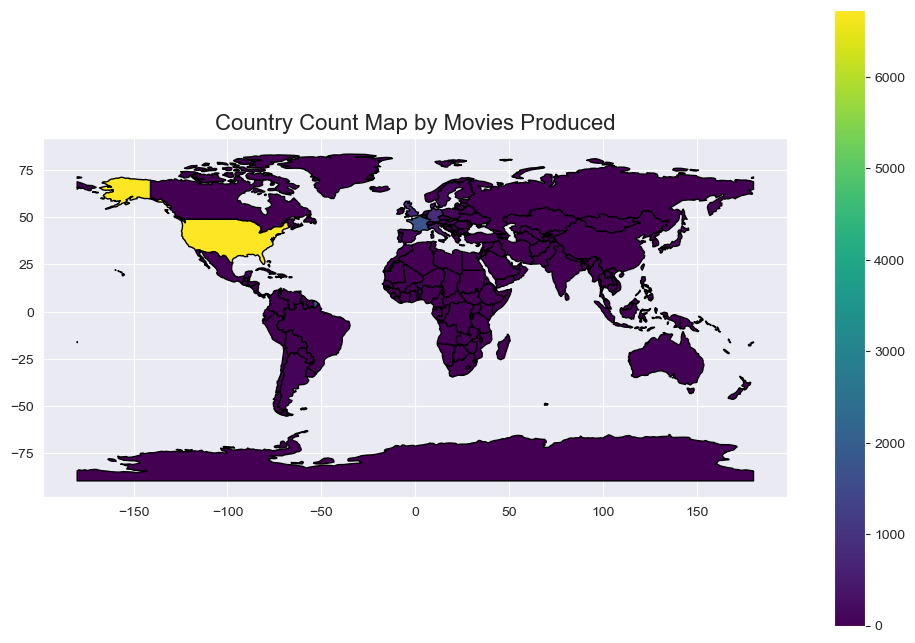

In [424]:
# Replace "United States of America" with "USA" and "United Kingdom" with "UK"
print("USA?", countries_gdf['ADMIN'].str.contains("United States of America", na=False).sum())
print("UK?", countries_gdf['ADMIN'].str.contains("United Kingdom", na=False).sum())
countries_gdf['ADMIN'].replace('United States of America', 'USA', inplace=True)
countries_gdf['ADMIN'].replace('United Kingdom', 'UK', inplace=True)

# Aggregate the count of occurrences for each country
country_counts = birth_countries['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Merge the dataframes
world_data = countries_gdf.merge(country_counts, left_on='ADMIN', right_on='country', how='left')
world_data['count'] = world_data['count'].fillna(0)

# Plot the map with a color gradient based on the 'count' column
world_data.plot(column='count', cmap='viridis', legend=True, figsize=(12, 8), edgecolor='black')

# Add a title and display the map
plt.title('Country Count Map by Movies Produced', fontsize=16)
plt.show()

This map clearly highlights the early dominance of the United States in global film production, reflecting its rapid industrialization of cinema in the first decades of the 20th century. Hollywood, already emerging as the epicenter of the motion picture industry, far outpaces other nations in terms of volume. France, with its pioneering role in cinematic innovation thanks to figures like the Lumière brothers and Georges Méliès, holds a solid second place. Germany also begins to appear on the map, hinting at its later influence during the Weimar era. The visual disparity underscores how early cinema was largely concentrated in a few Western countries, setting the stage for their cultural and economic influence in the decades to follow.

## Early Cinema (1920-1939)

The roaring twenties and the tumultuous thirties were a pivotal period for cinema, marked by wars, economic crashes, and massive social shifts. This era witnessed a profound transformation in filmmaking with the advent of sound in 1930. Movies became a powerful means of escape from the harsh realities of life, offering a window into other worlds and allowing audiences to vicariously experience different emotions. Simultaneously, cinema served as a mirror reflecting the anxieties and aspirations of a society grappling with unprecedented change. Movie theaters transcended their role as mere entertainment venues, evolving into community hubs where people could connect, share their feelings, and discuss the pressing issues of the day. Cinema, with its newfound ability to convey dialogue and music, emerged as a potent cultural force, shaping the way we think, feel, and experience the world.

In [425]:
begin_df = movies_df.loc[(movies_df['date'] > 1920) & (movies_df['date'] < 1939)]
begin_df

id                   movie_title    date tagline  \
330     1940958                        Pianot  1927.0    None   
368     1940959                Der Abtrünnige  1927.0    None   
451     1940960     Das Abenteuer von Sagossa  1923.0    None   
452     1940961          Die Maske der Schuld  1922.0    None   
862     1940952                  Horror Night  1938.0    None   
...         ...                           ...     ...     ...   
938874  1937379                 What a Knight  1932.0    None   
938875  1937380                The River Dart  1931.0    None   
938876  1937381           The Revue of Sports  1925.0    None   
938877  1937382  ... Als het Verleden Spreekt  1921.0    None   
940725  1940957                  The Junk Man  1927.0    None   

                                              description  minute  rating  
330     Pictures from the history of the piano and abo...    33.0     NaN  
368                                                  None     NaN     NaN  
451                                                  None    92.0     NaN  
452                                                  None     NaN     NaN  
862                       Chinese horror movie from 1938.     NaN     NaN  
...                                                   ...     ...     ...  
938874  Krazy Kat goes to the dentist and is put under...     7.0     NaN  
938875  Tracing the course of the river Dart, from its...    16.0     NaN  
938876  (Winter) sports news with items including gymn...    12.0     NaN  
938877                                               None    14.0     NaN  
940725  Farmer Alfalfa is a junkman and get’s into a f...     6.0     NaN  

[29237 rows x 7 columns]

Let's see how the average movie runtime has evolved.

In [426]:
begin_df['minute'].describe()

count    22652.000000
mean        54.458061
std         39.324844
min          1.000000
25%         16.000000
50%         61.000000
75%         80.000000
max        999.000000
Name: minute, dtype: float64

During the early years of cinema, a remarkable shift in storytelling emerged: the average runtime of films more than doubled, growing from 23 to 54 minutes. This transition marks a clear departure from short experimental clips toward more structured, narrative-driven productions—laying the foundation for what we now recognize as feature-length cinema.

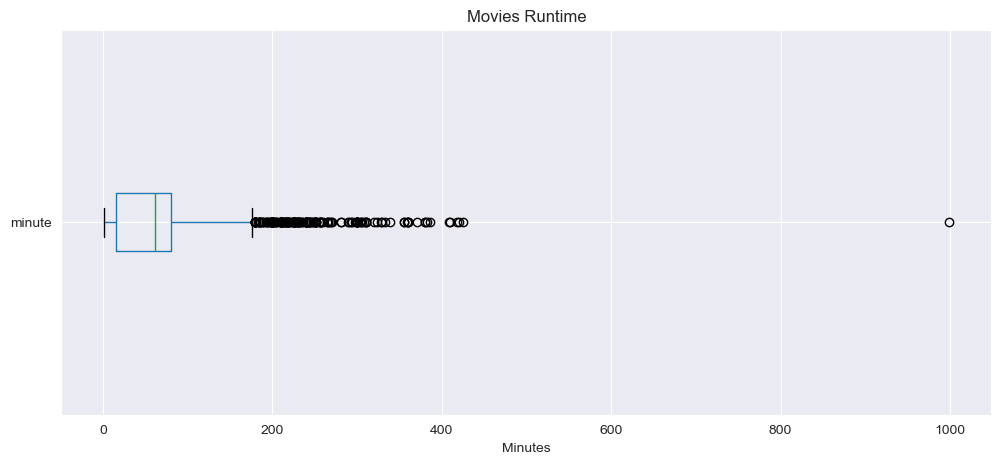

In [427]:
ax = begin_df.boxplot(column = 'minute', vert = False, figsize = (12,5))
ax.set_title("Movies Runtime")
ax.set_xlabel('Minutes')
plt.show()

In [428]:
outliers = begin_df.loc[(begin_df['minute'] > 240)]
outliers

id                    movie_title    date  \
3479    1060278   The IX Olympiad in Amsterdam  1928.0   
5849    1004308                       Napoleon  1927.0   
8378    1006816        Dr. Mabuse, the Gambler  1922.0   
11815   1010238                        La Roue  1923.0   
22178   1020562                 Les Misérables  1934.0   
...         ...                            ...     ...   
465516  1464020              The Mystery Rider  1928.0   
502587  1500894           Il ponte dei sospiri  1921.0   
509359  1507683            Spell of the Circus  1930.0   
512826  1511149  The Adventures of Japhet I-IV  1922.0   
693453  1691934           Kopf kalt, Füße warm  1928.0   

                                                  tagline  \
3479                                                 None   
5849                                                 None   
8378                                                 None   
11815                                                None   
22178                                                None   
...                                                   ...   
465516                                               None   
502587                                               None   
509359  This way to the big top thriller! A circus bro...   
512826                                               None   
693453                                               None   

                                              description  minute  rating  
3479    A documentary on the 1928 Olympic Games in Ams...   251.0     NaN  
5849    A biopic of Napoleon Bonaparte, tracing the Co...   333.0    4.23  
8378    Dr. Mabuse and his organization of criminals a...   271.0    3.96  
11815   Sisif, a railwayman, saves a young girl named ...   418.0    3.93  
22178   In 19th century France, Jean Valjean, a man im...   281.0    3.97  
...                                                   ...     ...     ...  
465516                      Silent cowboy Western serial.   380.0     NaN  
502587                                               None   252.0     NaN  
509359  The manager of The Big Circus plots to marry t...   360.0     NaN  
512826  The infant Japhet Newman is left on the steps ...   242.0     NaN  
693453                                               None   999.0     NaN  

[73 rows x 7 columns]

In this case too, we have many serial titles that have been included together, resulting in very long overall runtimes. For statistical purposes, we prefer to remove all titles with a duration exceeding 240 minutes, acknowledging that some of these (e.g., 'La Roue, 1923') are single films.

In [429]:
begin_df = begin_df.loc[(begin_df['minute'] <= 240)]

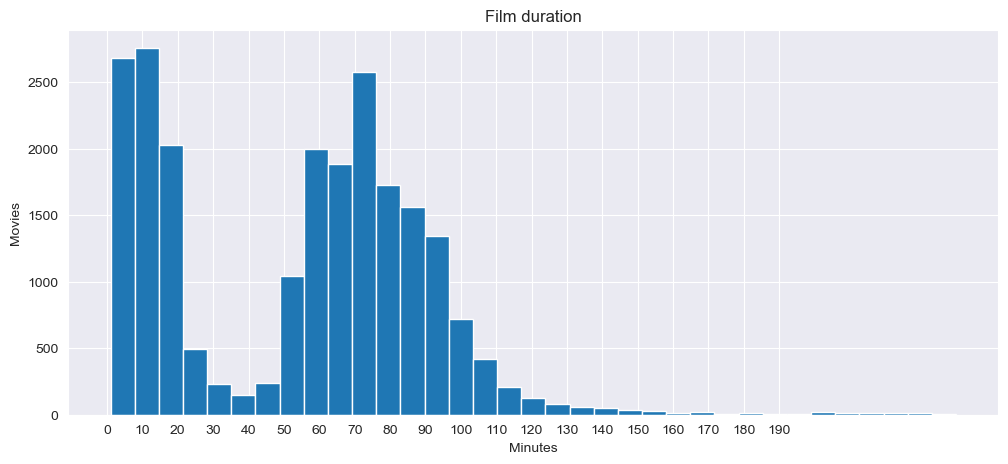

In [430]:
ax = begin_df['minute'].plot(kind = 'hist', bins = 35, title = "Film duration", figsize = (12,5))
ax.set_xlabel('Minutes')
ax.set_ylabel('Movies')
plt.xticks(np.arange(0, 200, 10))
plt.show()

In [431]:
short_movies = begin_df.loc[(begin_df['minute'] <= 30)]
short_movies['date'].describe()

count    8060.000000
mean     1930.651489
std         4.842757
min      1921.000000
25%      1927.000000
50%      1931.000000
75%      1935.000000
max      1938.000000
Name: date, dtype: float64

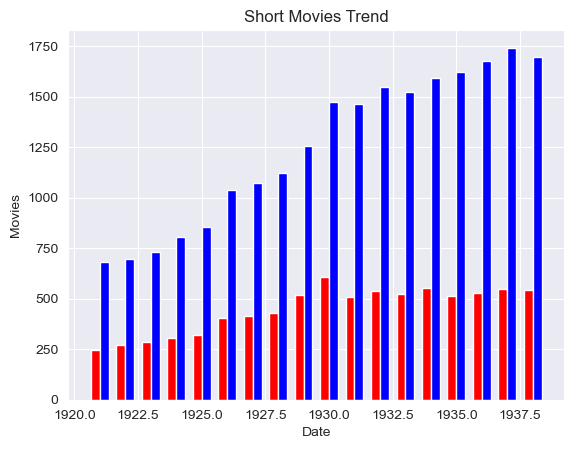

<Figure size 1200x600 with 0 Axes>

In [432]:
short_counters = short_movies.groupby('date').size()
counters = begin_df.groupby('date').size()
bar_width = 0.35
# Short Movies Position
bar_positions_1 = np.array(short_counters.index) - bar_width / 2
# All Movies Position
bar_positions_2 = np.array(counters.index) + bar_width / 2

plt.bar(bar_positions_1, short_counters.values, width=bar_width, label='Short Movies', color='red')
plt.bar(bar_positions_2, counters.values, width=bar_width, label='All Movies', color='blue')
plt.title("Short Movies Trend")
plt.xlabel("Date")
plt.ylabel("Movies")
plt.figure(figsize=(12,6))
plt.show()

The early part of the graph (1920-1925) continues the trend of producing numerous short films, a trend that begins to wane towards the mid-1920s. Interestingly, this period coincides with the establishment of the Walt Disney Company in 1923 and the subsequent rise of Mickey Mouse in 1928. The surge in short film production between 1928 and 1930 may reflect the growing popularity of animated shorts, particularly those featuring the iconic mouse.

Let's dive into the world of Disney films.

In [433]:
begin_studios = pd.merge(begin_df, studios_df, on='id', how='left')
disney_movies = begin_studios.loc[begin_studios['studio'].apply(lambda x: is_Disney(x))]
disney_movies

id                      movie_title    date  \
5      1000929  Snow White and the Seven Dwarfs  1937.0   
66     1005195                 Steamboat Willie  1928.0   
89     1005898               The Skeleton Dance  1929.0   
209    1011292                Three Little Pigs  1933.0   
258    1012913                Flowers and Trees  1932.0   
...        ...                              ...     ...   
6505   1179950          Alice's Monkey Business  1926.0   
6507   1180038            Alice's Medicine Show  1927.0   
6528   1180571             Alice's Channel Swim  1927.0   
18175  1492653        L'Heure joyeuse de Mickey  1934.0   
23879  1824513              The Dwarfs' Dilemma  1937.0   

                                                 tagline  \
5      The Happiest, Dopiest, Grumpiest, Sneeziest mo...   
66                                                  None   
89     The greatest talking picture novelty ever scre...   
209                    Who's afraid of the BIG BAD WOLF?   
258    It's spring, and the flowers, mushrooms, and t...   
...                                                  ...   
6505                                                None   
6507                                                None   
6528                                                None   
18175                                               None   
23879                                               None   

                                             description  minute  rating  \
5      A beautiful girl, Snow White, takes refuge in ...    83.0    3.43   
66     Mickey Mouse, piloting a steamboat, delights h...     8.0    3.65   
89     The clock strikes midnight, the bats fly from ...     5.0    3.92   
209    The two pigs building houses of hay and sticks...     8.0    3.53   
258    A jealous stump threatens two trees that are i...     8.0    3.53   
...                                                  ...     ...     ...   
6505   Alice and Julius, while out hunting big game, ...     7.0     NaN   
6507   Alice and Julius are in a traveling medicine s...     7.0     NaN   
6528   Julius and Pete have a contest to swim across ...     7.0     NaN   
18175                    An full hour of Disney cartoons    60.0     NaN   
23879        Snow white and the seven dwarves short film     2.0     NaN   

                        studio  studios_id  
5      Walt Disney Productions      3076.0  
66          Walt Disney Studio     17346.0  
89     Walt Disney Productions     19501.0  
209    Walt Disney Productions     35545.0  
258    Walt Disney Productions     39953.0  
...                        ...         ...  
6505   Walt Disney Productions    279369.0  
6507   Walt Disney Productions    279447.0  
6528   Walt Disney Productions    279990.0  
18175  Walt Disney Productions    496915.0  
23879  Walt Disney Productions    643148.0  

[257 rows x 9 columns]

In [434]:
disney_movies['minute'].describe()

count    257.000000
mean       8.097276
std        7.218836
min        1.000000
25%        7.000000
50%        7.000000
75%        8.000000
max       83.000000
Name: minute, dtype: float64

Given the remarkably low average runtime of just over 8 minutes, it becomes clear that we're primarily dealing with short films. Therefore, our analysis will now focus specifically on Disney's short film productions.

In [435]:
disney_shorts = disney_movies.loc[disney_movies['minute'] < 30]
disney_shorts

id              movie_title    date  \
66     1005195         Steamboat Willie  1928.0   
89     1005898       The Skeleton Dance  1929.0   
209    1011292        Three Little Pigs  1933.0   
258    1012913        Flowers and Trees  1932.0   
301    1014783             The Old Mill  1937.0   
...        ...                      ...     ...   
6491   1179616           Alice's Picnic  1927.0   
6505   1179950  Alice's Monkey Business  1926.0   
6507   1180038    Alice's Medicine Show  1927.0   
6528   1180571     Alice's Channel Swim  1927.0   
23879  1824513      The Dwarfs' Dilemma  1937.0   

                                                 tagline  \
66                                                  None   
89     The greatest talking picture novelty ever scre...   
209                    Who's afraid of the BIG BAD WOLF?   
258    It's spring, and the flowers, mushrooms, and t...   
301     Animals try to stay safe and dry in an old mill.   
...                                                  ...   
6491                                                None   
6505                                                None   
6507                                                None   
6528                                                None   
23879                                               None   

                                             description  minute  rating  \
66     Mickey Mouse, piloting a steamboat, delights h...     8.0    3.65   
89     The clock strikes midnight, the bats fly from ...     5.0    3.92   
209    The two pigs building houses of hay and sticks...     8.0    3.53   
258    A jealous stump threatens two trees that are i...     8.0    3.53   
301    Night in an old mill is dramatically depicted ...     9.0    3.85   
...                                                  ...     ...     ...   
6491   Alice and her friends decide to go to the park...     7.0     NaN   
6505   Alice and Julius, while out hunting big game, ...     7.0     NaN   
6507   Alice and Julius are in a traveling medicine s...     7.0     NaN   
6528   Julius and Pete have a contest to swim across ...     7.0     NaN   
23879        Snow white and the seven dwarves short film     2.0     NaN   

                        studio  studios_id  
66          Walt Disney Studio     17346.0  
89     Walt Disney Productions     19501.0  
209    Walt Disney Productions     35545.0  
258    Walt Disney Productions     39953.0  
301    Walt Disney Productions     44920.0  
...                        ...         ...  
6491   Walt Disney Productions    279007.0  
6505   Walt Disney Productions    279369.0  
6507   Walt Disney Productions    279447.0  
6528   Walt Disney Productions    279990.0  
23879  Walt Disney Productions    643148.0  

[254 rows x 9 columns]

For the sake of completeness, let’s also take a look at which and how many "long-duration" films Disney produced during that period.

In [436]:
disney_movies.loc[disney_movies['minute'] >= 30]

id                        movie_title    date  \
5      1000929    Snow White and the Seven Dwarfs  1937.0   
4048   1113359  Walt Disney's Academy Award Revue  1937.0   
18175  1492653          L'Heure joyeuse de Mickey  1934.0   

                                                 tagline  \
5      The Happiest, Dopiest, Grumpiest, Sneeziest mo...   
4048   It took 5 Academy Award Winners To Make This O...   
18175                                               None   

                                             description  minute  rating  \
5      A beautiful girl, Snow White, takes refuge in ...    83.0    3.43   
4048   A compilation of five Oscar-winning Disney sho...    75.0     NaN   
18175                    An full hour of Disney cartoons    60.0     NaN   

                        studio  studios_id  
5      Walt Disney Productions      3076.0  
4048   Walt Disney Productions    208227.0  
18175  Walt Disney Productions    496915.0

A surprising fact about early Disney is that only three of their productions clocked in at over 30 minutes. Among these, 'Snow White and the Seven Dwarfs' reigns supreme as the pioneering full-length animated film, forever changing the landscape of animation.

Let's see how many of these short films are Disney productions.

In [437]:
short_studios = begin_studios.loc[begin_studios['minute'] < 30].copy()
short_studios

id                                movie_title    date tagline  \
2      1940954                            Fox the Builder  1936.0    None   
3      1940955  Movie Making in Japan: A Screen Snap-shot  1935.0    None   
8      1044711                                   Oramunde  1933.0    None   
16     1001886                           Un Chien Andalou  1929.0    None   
66     1005195                           Steamboat Willie  1928.0    None   
...        ...                                        ...     ...     ...   
24589  1937379                              What a Knight  1932.0    None   
24590  1937380                             The River Dart  1931.0    None   
24591  1937381                        The Revue of Sports  1925.0    None   
24592  1937382               ... Als het Verleden Spreekt  1921.0    None   
24593  1940957                               The Junk Man  1927.0    None   

                                             description  minute  rating  \
2      The fox was assigned to build a chicken coop a...    10.0     NaN   
3      This fragmentary documentary was prepared at t...     8.0     NaN   
8      Early dance film filmed outdoors and directed ...    13.0    3.55   
16     Un Chien Andalou is a classic European avant-g...    21.0    3.87   
66     Mickey Mouse, piloting a steamboat, delights h...     8.0    3.65   
...                                                  ...     ...     ...   
24589  Krazy Kat goes to the dentist and is put under...     7.0     NaN   
24590  Tracing the course of the river Dart, from its...    16.0     NaN   
24591  (Winter) sports news with items including gymn...    12.0     NaN   
24592                                               None    14.0     NaN   
24593  Farmer Alfalfa is a junkman and get’s into a f...     6.0     NaN   

                                  studio  studios_id  
2                          Soyuzmultfilm    678833.0  
3                            J.O. Studio    678834.0  
8                                    NaN         NaN  
16                   Billancourt Studios      6337.0  
66                    Walt Disney Studio     17346.0  
...                                  ...         ...  
24589                                NaN         NaN  
24590                                NaN         NaN  
24591                                NaN         NaN  
24592  Nationale Filmfabriek Bloemendaal    678003.0  
24593                                NaN         NaN  

[8703 rows x 9 columns]

In [438]:
short_studios.loc[:, 'Disney'] = short_studios['studio'] == 'Walt Disney Productions'
short_studios

id                                movie_title    date tagline  \
2      1940954                            Fox the Builder  1936.0    None   
3      1940955  Movie Making in Japan: A Screen Snap-shot  1935.0    None   
8      1044711                                   Oramunde  1933.0    None   
16     1001886                           Un Chien Andalou  1929.0    None   
66     1005195                           Steamboat Willie  1928.0    None   
...        ...                                        ...     ...     ...   
24589  1937379                              What a Knight  1932.0    None   
24590  1937380                             The River Dart  1931.0    None   
24591  1937381                        The Revue of Sports  1925.0    None   
24592  1937382               ... Als het Verleden Spreekt  1921.0    None   
24593  1940957                               The Junk Man  1927.0    None   

                                             description  minute  rating  \
2      The fox was assigned to build a chicken coop a...    10.0     NaN   
3      This fragmentary documentary was prepared at t...     8.0     NaN   
8      Early dance film filmed outdoors and directed ...    13.0    3.55   
16     Un Chien Andalou is a classic European avant-g...    21.0    3.87   
66     Mickey Mouse, piloting a steamboat, delights h...     8.0    3.65   
...                                                  ...     ...     ...   
24589  Krazy Kat goes to the dentist and is put under...     7.0     NaN   
24590  Tracing the course of the river Dart, from its...    16.0     NaN   
24591  (Winter) sports news with items including gymn...    12.0     NaN   
24592                                               None    14.0     NaN   
24593  Farmer Alfalfa is a junkman and get’s into a f...     6.0     NaN   

                                  studio  studios_id  Disney  
2                          Soyuzmultfilm    678833.0   False  
3                            J.O. Studio    678834.0   False  
8                                    NaN         NaN   False  
16                   Billancourt Studios      6337.0   False  
66                    Walt Disney Studio     17346.0   False  
...                                  ...         ...     ...  
24589                                NaN         NaN   False  
24590                                NaN         NaN   False  
24591                                NaN         NaN   False  
24592  Nationale Filmfabriek Bloemendaal    678003.0   False  
24593                                NaN         NaN   False  

[8703 rows x 10 columns]

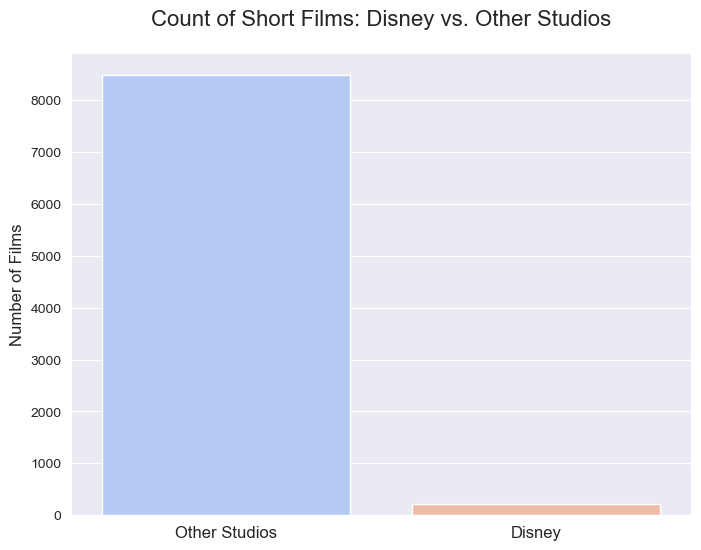

In [439]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Disney', data=short_studios, palette='coolwarm', order=[False, True], hue='Disney', legend=False)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Other Studios', 'Disney'])
ax.tick_params(axis='x', labelsize=12)
ax.set_title('Count of Short Films: Disney vs. Other Studios', fontsize=16, pad=20)
ax.set_xlabel('')
ax.set_ylabel('Number of Films', fontsize=12)
plt.show()

While Disney's films constitute only a small portion of all short movies from this period, a more insightful analysis would be to determine their market share specifically within the animation sector.

In [440]:
animation_shorts = pd.merge(short_studios, genres_df, on='id', how='left')
animation_shorts = animation_shorts.loc[animation_shorts['genre'] == 'Animation']
animation_shorts

id                                 movie_title    date  \
0      1940954                             Fox the Builder  1936.0   
6      1005195                            Steamboat Willie  1928.0   
7      1005898                          The Skeleton Dance  1929.0   
19     1011132  Popeye the Sailor Meets Sindbad the Sailor  1936.0   
22     1011292                           Three Little Pigs  1933.0   
...        ...                                         ...     ...   
10546  1865275                                Animals Fair  1924.0   
10580  1871348                        Der verliebte Sultan  1922.0   
10627  1881159                       Der Retter in der Not  1922.0   
10749  1923557                              Uncalled Guest  1937.0   
10834  1940957                                The Junk Man  1927.0   

                                                 tagline  \
0                                                   None   
6                                                   None   
7      The greatest talking picture novelty ever scre...   
19                                                  None   
22                     Who's afraid of the BIG BAD WOLF?   
...                                                  ...   
10546                                               None   
10580                                               None   
10627                                               None   
10749                                               None   
10834                                               None   

                                             description  minute  rating  \
0      The fox was assigned to build a chicken coop a...    10.0     NaN   
6      Mickey Mouse, piloting a steamboat, delights h...     8.0    3.65   
7      The clock strikes midnight, the bats fly from ...     5.0    3.92   
19     Two sailors Sindbad and Popeye decide to test ...    16.0    3.69   
22     The two pigs building houses of hay and sticks...     8.0    3.53   
...                                                  ...     ...     ...   
10546                         An Aesop Fables animation.     6.0     NaN   
10580                                Animated short film     8.0     NaN   
10627                                Short animated film     3.0     NaN   
10749  Brave Rooster fools a mischievous Fox who has ...     7.0     NaN   
10834  Farmer Alfalfa is a junkman and get’s into a f...     6.0     NaN   

                                                  studio  studios_id  Disney  \
0                                          Soyuzmultfilm    678833.0   False   
6                                     Walt Disney Studio     17346.0   False   
7                                Walt Disney Productions     19501.0    True   
19                                     Fleischer Studios     35110.0   False   
22                               Walt Disney Productions     35545.0    True   
...                                                  ...         ...     ...   
10546                                                NaN         NaN   False   
10580                                     Plastrick Film    659715.0   False   
10627  Deutsche Werbefilm-Gesellschaft Fengler & Dein...    663214.0   False   
10749                                      Soyuzmultfilm    675079.0   False   
10834                                                NaN         NaN   False   

           genre   genre_id  
0      Animation  1046486.0  
6      Animation    13256.0  
7      Animation    15019.0  
19     Animation    27497.0  
22     Animation    27845.0  
...          ...        ...  
10546  Animation  1007203.0  
10580  Animation  1010982.0  
10627  Animation  1017349.0  
10749  Animation  1039267.0  
10834  Animation  1046489.0  

[2844 rows x 12 columns]

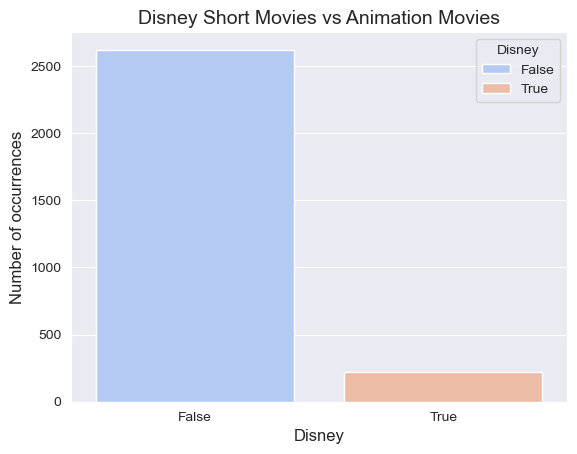

<Figure size 1200x800 with 0 Axes>

In [441]:
sns.countplot(x='Disney', data=animation_shorts, hue='Disney', palette='coolwarm')

plt.title('Disney Short Movies vs Animation Movies', fontsize=14)
plt.xlabel('Disney', fontsize=12)
plt.ylabel('Number of occurrences', fontsize=12)
plt.figure(figsize=(12, 8))
plt.show()

Disney's initial contributions to animated shorts were notable, though they didn't drastically alter the landscape of short film production.

Having explored the realm of animated films, let's delve into the other cinematic trends that captivated audiences during that period.

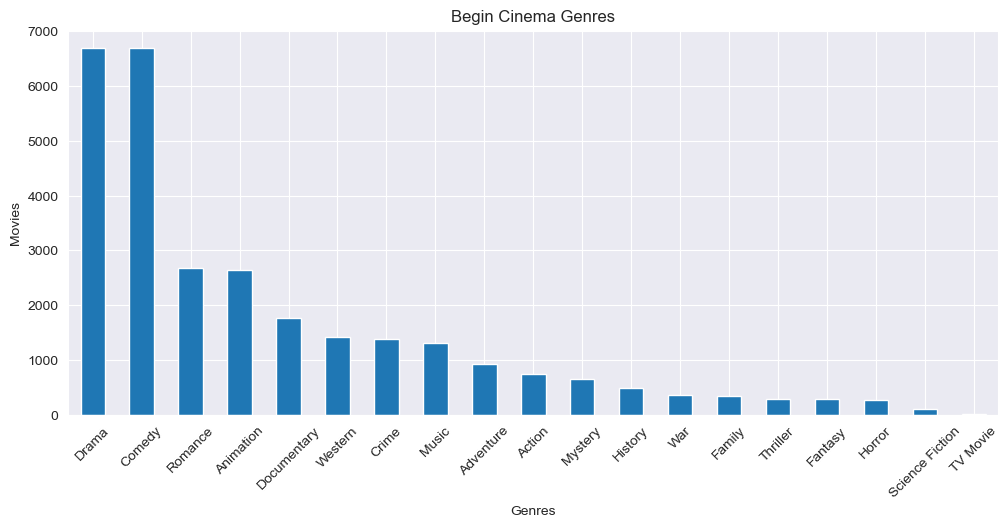

In [442]:
begin_genre = pd.merge(begin_df, genres_df, on='id', how='left')

ax = begin_genre['genre'].value_counts() \
    .plot(kind = 'bar', title = "Begin Cinema Genres", figsize = (12,5))
ax.set_xlabel('Genres')
ax.set_ylabel('Movies')
plt.xticks(rotation=45)
plt.show()

The graph illustrates the distribution of films across various genres, clearly highlighting those that have had the most significant impact on cinematic production. Drama and Comedy emerge as the dominant genres, with a substantially higher number of films compared to the others, followed by Romance and Animation.
An intriguing finding pertains to the Animation genre, which, despite its notable presence, does not dominate the cinematic landscape. This outcome may reflect the fact that animated films, while widely appreciated by audiences, tend to have more targeted production and generally higher costs compared to genres such as Drama and Comedy, which can encompass a broader range of stories and audience demographics.

Let us now focus our attention on the Italian situation, which was under the Fascist regime, and examine how this regime influenced, or did not influence, cinematic productions.

In [443]:
begin_countries = pd.merge(begin_genre, countries_df, on='id', how='left')
begin_countries

id                                movie_title    date  \
0      1940958                                     Pianot  1927.0   
1      1940960                  Das Abenteuer von Sagossa  1923.0   
2      1940954                            Fox the Builder  1936.0   
3      1940955  Movie Making in Japan: A Screen Snap-shot  1935.0   
4      1000871                                 Metropolis  1927.0   
...        ...                                        ...     ...   
33096  1937379                              What a Knight  1932.0   
33097  1937380                             The River Dart  1931.0   
33098  1937381                        The Revue of Sports  1925.0   
33099  1937382               ... Als het Verleden Spreekt  1921.0   
33100  1940957                               The Junk Man  1927.0   

                                                 tagline  \
0                                                   None   
1                                                   None   
2                                                   None   
3                                                   None   
4      There can be no understanding between the hand...   
...                                                  ...   
33096                                               None   
33097                                               None   
33098                                               None   
33099                                               None   
33100                                               None   

                                             description  minute  rating  \
0      Pictures from the history of the piano and abo...    33.0     NaN   
1                                                   None    92.0     NaN   
2      The fox was assigned to build a chicken coop a...    10.0     NaN   
3      This fragmentary documentary was prepared at t...     8.0     NaN   
4      In a futuristic city sharply divided between t...   153.0    4.26   
...                                                  ...     ...     ...   
33096  Krazy Kat goes to the dentist and is put under...     7.0     NaN   
33097  Tracing the course of the river Dart, from its...    16.0     NaN   
33098  (Winter) sports news with items including gymn...    12.0     NaN   
33099                                               None    14.0     NaN   
33100  Farmer Alfalfa is a junkman and get’s into a f...     6.0     NaN   

             genre   genre_id      country  country_id  
0      Documentary  1046490.0       Sweden    692818.0  
1           Comedy  1046492.0      Germany    692820.0  
2        Animation  1046486.0         USSR    692814.0  
3      Documentary  1046487.0        Japan    692815.0  
4            Drama     2345.0      Germany      1232.0  
...            ...        ...          ...         ...  
33096          NaN        NaN          NaN         NaN  
33097          NaN        NaN          NaN         NaN  
33098          NaN        NaN           UK    691119.0  
33099  Documentary  1044533.0  Netherlands    691120.0  
33100    Animation  1046489.0          USA    692817.0  

[33101 rows x 11 columns]

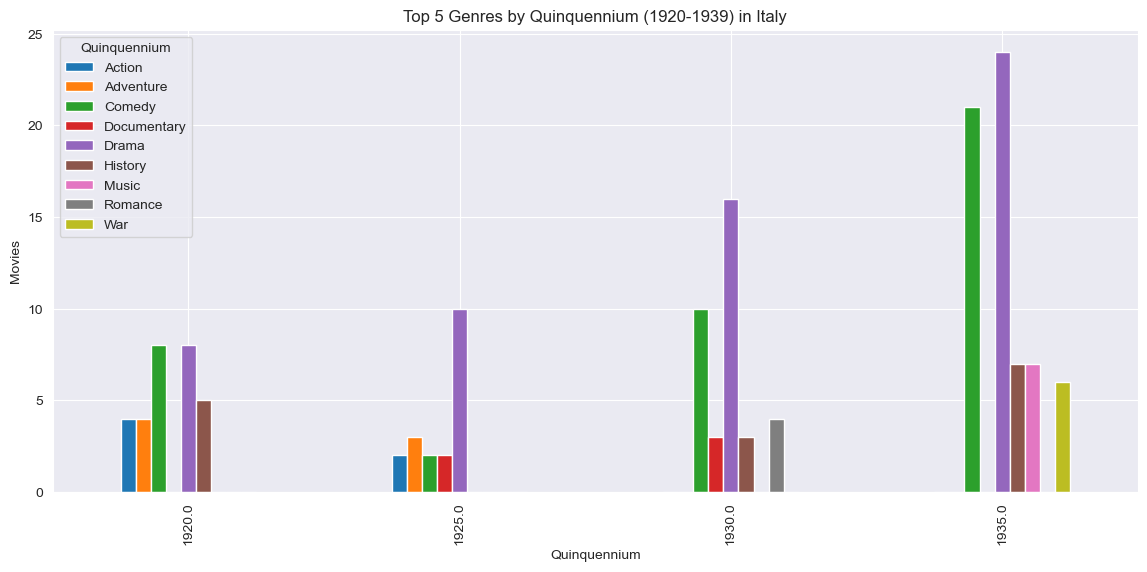

In [444]:
italybegin_data = begin_countries[begin_countries['country'] == 'Italy'].copy()
italybegin_data['quinquennium'] = (italybegin_data['date'] // 5) * 5

italybegin_genre_counts = italybegin_data.groupby(['quinquennium', 'genre']).size().reset_index(name='count')

top_italybegin_genres = italybegin_genre_counts.groupby('quinquennium').apply(lambda x: x.nlargest(5, 'count'), include_groups=False).reset_index()
italybegin_pivot_table = top_italybegin_genres.pivot(index='quinquennium', columns='genre', values='count').fillna(0)

italybegin_pivot_table.plot(kind='bar', figsize=(14, 6))
plt.title('Top 5 Genres by Quinquennium (1920-1939) in Italy')
plt.xlabel('Quinquennium')
plt.ylabel('Movies')
plt.legend(title='Quinquennium')
plt.show()

It can be observed that in the last five years leading up to World War II, the war genre emerged in the Italian cinematic landscape. As expected, however, dramas and comedies continued to dominate all other genres.

In [445]:
begin_warmovies_italy = italybegin_data[italybegin_data['genre'].str.contains('war', case=False, na=False)]
begin_warmovies_italy

id                               movie_title    date  \
4556   1080558  Scipio Africanus: The Defeat of Hannibal  1937.0   
5872   1098732                        Cyrano de Bergerac  1925.0   
6657   1110656                      Luciano Serra, Pilot  1938.0   
6863   1114031                            White Squadron  1936.0   
9483   1161253            Giovanni de Medici: The Leader  1937.0   
14333  1250977                         Il grande appello  1936.0   
21289  1388912    There Is No Resurrection Without Death  1922.0   
23687  1441211                              Pietro Micca  1938.0   
31228  1705342                         The Blue Squadron  1934.0   

                                    tagline  \
4556   Facist Italy's 1937 Spectacular Epic   
5872                                   None   
6657                                   None   
6863                                   None   
9483                                   None   
14333                                  None   
21289                                  None   
23687                                  None   
31228                                  None   

                                             description  minute  rating  \
4556   A story of the Second Punic Wars, beginning wi...    83.0     NaN   
5872   Cyrano de Begerac is joyous, witty, a poet, a ...   113.0     NaN   
6657   Successful WWI pilot Luciano Serra has problem...   102.0     NaN   
6863   Lieutenant Mario Ludovici, an army officer, ge...    95.0     NaN   
9483   Returned from exile where he accompanied his m...    88.0     NaN   
14333  An Italian proprietor of a squalid Djibouti ba...    80.0     NaN   
21289  Produced by Elena Sangro and funded by the Com...   103.0     NaN   
23687  An 1938 Italian historical war film that portr...    90.0     NaN   
31228            Anglo Italian aviation drama. Now lost.    96.0     NaN   

      genre  genre_id country  country_id  quinquennium  
4556    War  163527.0   Italy    102609.0        1935.0  
5872    War  195017.0   Italy    122666.0        1925.0  
6657    War  214823.0   Italy    135351.0        1935.0  
6863    War  220318.0   Italy    138790.0        1935.0  
9483    War  294096.0   Italy    186194.0        1935.0  
14333   War  419410.0   Italy    266501.0        1935.0  
21289   War  584429.0   Italy    373880.0        1920.0  
23687   War  641501.0   Italy    411448.0        1935.0  
31228   War  886621.0   Italy    578048.0        1930.0

The Fascist imprint on these productions is clearly evident. Interestingly, these war films did not address the contemporary conflicts of the time, but rather focused on historical wars and past events—often drawing on ancient Roman or earlier military exploits. This approach allowed filmmakers to indirectly glorify nationalism and militarism while avoiding direct references to the ongoing geopolitical tensions of the 1930s, subtly echoing the regime’s ideological goals.

## War Cinema (1939-1945)

The years between 1939 and 1945 witnessed cinema evolve into a powerful medium for narrating, documenting, and confronting the harrowing realities of World War II. This analysis aims to delve into the multifaceted ways in which films of that era served as both mirrors and weapons, reflecting the hopes, fears, and struggles of societies caught in the maelstrom of war.

In [446]:
war_df = movies_df.loc[(movies_df['date'] > 1939) & (movies_df['date'] <= 1945)]
war_df

id                  movie_title    date  \
860     1940950             Mass Radiography  1943.0   
861     1940951                      A Ghost  1940.0   
1859    1000361                   Casablanca  1942.0   
1881    1000382                 Citizen Kane  1941.0   
2112    1033295                     Cornered  1945.0   
...         ...                          ...     ...   
938858  1937363                NOI – ROMÂNII  1942.0   
938859  1937364          Defenders of Tobruk  1941.0   
938860  1937365               The Blacksmith  1941.0   
938861  1937366           Le Secours d'Hiver  1941.0   
938862  1937367  Getting Down to Earth Again  1940.0   

                                                  tagline  \
860                                                  None   
861                                                  None   
1859             They had a date with fate in Casablanca!   
1881    Some called him a hero...others called him a h...   
2112                                                 None   
...                                                   ...   
938858                                               None   
938859  Australian newsreel about the siege of Tobruk ...   
938860                                               None   
938861                                               None   
938862                                               None   

                                              description  minute  rating  
860     Encouraging tens of thousands of people to str...    10.0     NaN  
861                       Chinese horror movie from 1940.     NaN     NaN  
1859    In Casablanca, Morocco in December 1941, a cyn...   102.0    4.27  
1881    Newspaper magnate Charles Foster Kane is taken...   119.0    4.21  
2112    A World War II veteran hunts down the Nazi col...   102.0    3.35  
...                                                   ...     ...     ...  
938858  Documentary propaganda film presenting the his...    25.0     NaN  
938859  Australian newsreel, telling of the besieged A...     8.0     NaN  
938860  Time-honoured craftsmanship at Corfe, near Tau...     5.0     NaN  
938861  Presentation of the activities of Secours d'Hi...    11.0     NaN  
938862  Getting Down to Earth Again, is a black and wh...    28.0     NaN  

[10122 rows x 7 columns]

In [447]:
war_df['minute'].describe()

count    8986.000000
mean       57.477409
std        42.788124
min         1.000000
25%        12.000000
50%        64.000000
75%        88.000000
max       999.000000
Name: minute, dtype: float64

The average film length remained relatively unchanged compared to the previous period.

Next, we will analyze whether the war led to a decrease in the number of films produced.

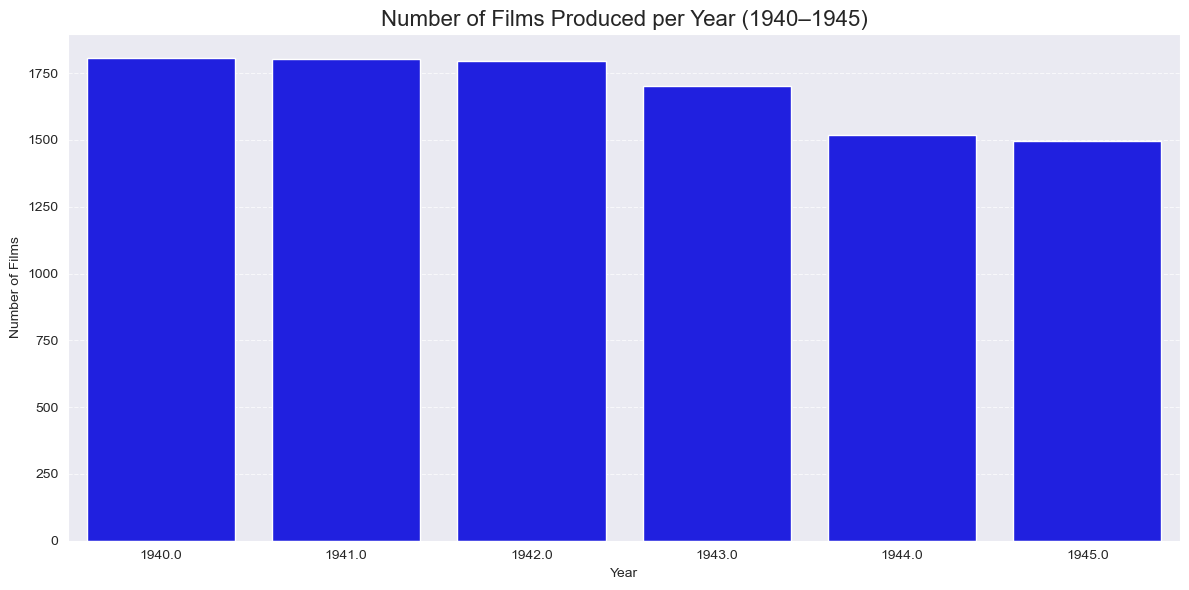

In [448]:
war_films_per_year = war_df.groupby('date').size().reset_index(name='film_count')
plt.figure(figsize=(12, 6))
sns.barplot(data=war_films_per_year, x='date', y='film_count', color='blue')
plt.title('Number of Films Produced per Year (1940–1945)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

While film production remained relatively steady throughout the war years, a slight but noticeable decline can be observed, reaching its lowest point in 1945. This trend likely reflects the increasing impact of wartime constraints such as resource limitations, censorship, and shifting national priorities.

Despite the ongoing conflict, the global film industry continued to operate, albeit with growing challenges as the war progressed.

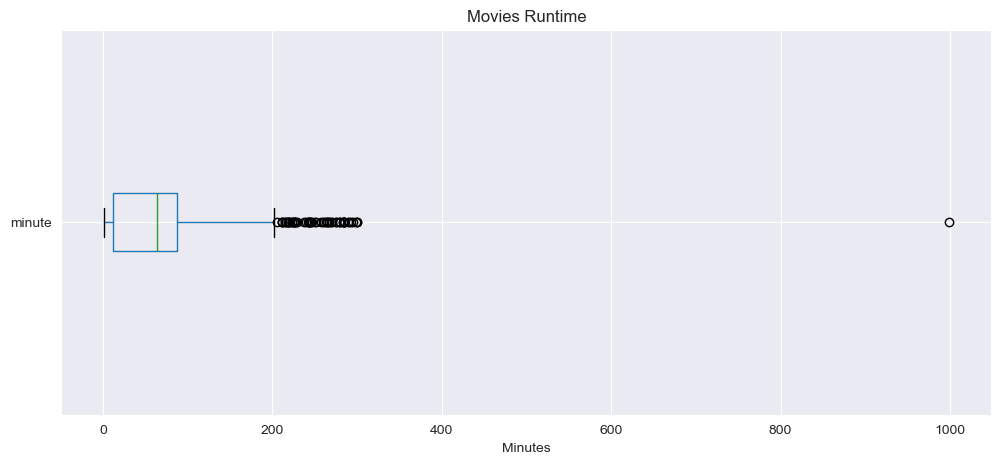

In [449]:
ax = war_df.boxplot(column = 'minute', vert = False, figsize = (12,5))
ax.set_title("Movies Runtime")
ax.set_xlabel('Minutes')
plt.show()

In [450]:
outliers = war_df.loc[(war_df['minute'] > 270)]
outliers

id                      movie_title    date  \
99593   1098007                       The Shadow  1940.0   
115905  1114317                      The Phantom  1943.0   
117305  1115713  The Green Hornet Strikes Again!  1940.0   
149089  1147525          The Monster and the Ape  1945.0   
201902  1200295                 The Green Archer  1940.0   
205857  1204241            Terry and the Pirates  1940.0   
227054  1225430                  The Secret Code  1942.0   
245439  1243890               The Spider Returns  1941.0   
248351  1246811                      White Eagle  1941.0   
249973  1248438                    The Iron Claw  1941.0   
254512  1252983           Riders of Death Valley  1941.0   
254716  1253187                   Jungle Raiders  1945.0   
267476  1265950                    Deadwood Dick  1940.0   
277486  1275888                    Overland Mail  1942.0   
283029  1281413       Holt Of The Secret Service  1941.0   
322173  1320545      The Valley of Vanishing Men  1942.0   
353127  1351605      Perils of the Royal Mounted  1942.0   
398161  1396544                  The Desert Hawk  1944.0   
399759  1398143           Canadian Army Newsreel  1941.0   

                                                  tagline  \
99593            WRAPPED IN MYSTERY! LOADED WITH THRILLS!   
115905  The most fantastic...most exciting serial ever...   
117305  A thousand thrills...ALL NEW...with the master...   
149089  A THRILLING 15 CHAPTER SERIAL OF A MECHANICAL ...   
201902  HITS THE BULL'S- EYE FOR THRILL LOVERS! (origi...   
205857  Based upon the famous Milton Caniff cartoon st...   
227054            GREATEST SPY ACTION SERIAL OF ALL TIME!   
245439  THE FAMOUS CRIME SMASHER OF "THE SPIDER" MAGAZ...   
248351  RIDE WITH BUCK...BACK TO THE DANGER-JAMMED DAY...   
249973  With flailing fists and blazing bullets, one m...   
254512  A MILLION-DOLLAR SUPER SERIAL! With a thousand...   
254716                                               None   
267476  The old West's hero of heroes...in the most bl...   
277486                 15 chapters of thundering thrills!   
283029  The Hero Of 10,000 Adventures Tops 'Em All In ...   
322173  BREATH-TAKING THRILLS THUNDERING TO SIDE-SPLIT...   
353127                                               None   
398161  GASP as the Hawk uncovers buried treasure! THR...   
399759                                               None   

                                              description  minute  rating  
99593   The Shadow battles a villain known as The Blac...   285.0     NaN  
115905  Two expeditions are trying to reach the Lost C...   299.0     NaN  
117305  Second serial featuring The Green Hornet and K...   293.0     NaN  
149089  A famous scientist invents a humanoid robot (t...   295.0     NaN  
201902  The struggle over the Bellamy estate ends with...   285.0     NaN  
205857  Dr. Herbert Lee, an archaeologist seeking to d...   300.0     NaN  
227054  A superhero known as The Black Commando battle...   275.0     NaN  
245439  The evil and masked "Gargoyle" is sabotaging a...   300.0     NaN  
248351  Serials usually spawned feature film versions,...   290.0     NaN  
249973  The heirs of Anton Benson are searching Benson...   289.0     NaN  
254512  The Saturday matinee crowd got two cowboy star...   283.0     NaN  
254716  Greedy traders have kidnapped a researcher, ho...   284.0     NaN  
267476  Columbia's 11th serial and the first western s...   285.0     NaN  
277486  Two investigators for a stagecoach company are...   279.0     NaN  
283029  A murderous gang of counterfeiters has kidnapp...   280.0     NaN  
322173  Prospector Henry Tolliver disappears and his s...   280.0     NaN  
353127  Sergeant MacLane of the Mounties investigates ...   275.0     NaN  
398161  Evil Hassan slips back into his native land of...   285.0     NaN  
399759  The Canadian Army Newsreels hold an important ...   999.0     NaN

In [451]:
war_df = war_df.loc[(war_df['minute'] <= 270)]

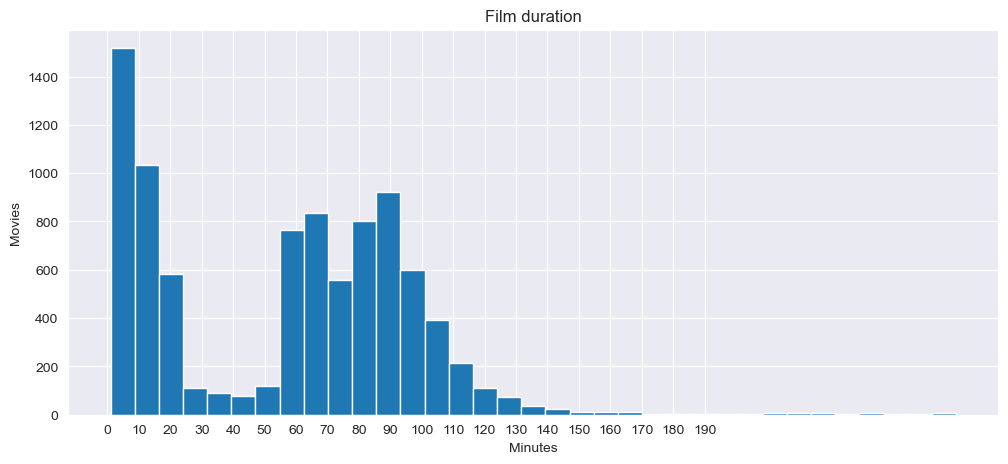

In [452]:
ax = war_df['minute'].plot(kind = 'hist', bins = 35, title = "Film duration", figsize = (12,5))
ax.set_xlabel('Minutes')
ax.set_ylabel('Movies')
plt.xticks(np.arange(0, 200, 10))
plt.show()

It's clear that a significant number of these films were rather short, clocking in at under 30 minutes. Let's delve into what exactly these shorter films were about.

In [453]:
shortwar_movies = war_df.loc[(war_df['minute'] <= 30)]
shortwar_movies

id                  movie_title    date  \
860     1940950             Mass Radiography  1943.0   
3968    1002442      Meshes of the Afternoon  1943.0   
5860    1034625                  How to Swim  1942.0   
7796    1040693          Electric Earthquake  1942.0   
9894    1008324                      At Land  1944.0   
...         ...                          ...     ...   
938858  1937363                NOI – ROMÂNII  1942.0   
938859  1937364          Defenders of Tobruk  1941.0   
938860  1937365               The Blacksmith  1941.0   
938861  1937366           Le Secours d'Hiver  1941.0   
938862  1937367  Getting Down to Earth Again  1940.0   

                                                  tagline  \
860                                                  None   
3968                                                 None   
5860                      Goofy demonstrates how to swim.   
7796                                                 None   
9894                                                 None   
...                                                   ...   
938858                                               None   
938859  Australian newsreel about the siege of Tobruk ...   
938860                                               None   
938861                                               None   
938862                                               None   

                                              description  minute  rating  
860     Encouraging tens of thousands of people to str...    10.0     NaN  
3968    A woman returning home falls asleep and has vi...    14.0    4.26  
5860    Goofy's plans to give a swimming lesson and en...     8.0    3.44  
7796    A scientist uses an earthquake machine to thre...     9.0    3.33  
9894    A woman lies on the sand, left there by the ti...    15.0    3.99  
...                                                   ...     ...     ...  
938858  Documentary propaganda film presenting the his...    25.0     NaN  
938859  Australian newsreel, telling of the besieged A...     8.0     NaN  
938860  Time-honoured craftsmanship at Corfe, near Tau...     5.0     NaN  
938861  Presentation of the activities of Secours d'Hi...    11.0     NaN  
938862  Getting Down to Earth Again, is a black and wh...    28.0     NaN  

[3239 rows x 7 columns]

In [454]:
shortwar_genre = pd.merge(shortwar_movies, genres_df, on='id', how='left')
shortwar_genre

id                  movie_title    date  \
0     1940950             Mass Radiography  1943.0   
1     1002442      Meshes of the Afternoon  1943.0   
2     1002442      Meshes of the Afternoon  1943.0   
3     1034625                  How to Swim  1942.0   
4     1040693          Electric Earthquake  1942.0   
...       ...                          ...     ...   
4186  1937364          Defenders of Tobruk  1941.0   
4187  1937364          Defenders of Tobruk  1941.0   
4188  1937365               The Blacksmith  1941.0   
4189  1937366           Le Secours d'Hiver  1941.0   
4190  1937367  Getting Down to Earth Again  1940.0   

                                                tagline  \
0                                                  None   
1                                                  None   
2                                                  None   
3                       Goofy demonstrates how to swim.   
4                                                  None   
...                                                 ...   
4186  Australian newsreel about the siege of Tobruk ...   
4187  Australian newsreel about the siege of Tobruk ...   
4188                                               None   
4189                                               None   
4190                                               None   

                                            description  minute  rating  \
0     Encouraging tens of thousands of people to str...    10.0     NaN   
1     A woman returning home falls asleep and has vi...    14.0    4.26   
2     A woman returning home falls asleep and has vi...    14.0    4.26   
3     Goofy's plans to give a swimming lesson and en...     8.0    3.44   
4     A scientist uses an earthquake machine to thre...     9.0    3.33   
...                                                 ...     ...     ...   
4186  Australian newsreel, telling of the besieged A...     8.0     NaN   
4187  Australian newsreel, telling of the besieged A...     8.0     NaN   
4188  Time-honoured craftsmanship at Corfe, near Tau...     5.0     NaN   
4189  Presentation of the activities of Secours d'Hi...    11.0     NaN   
4190  Getting Down to Earth Again, is a black and wh...    28.0     NaN   

            genre   genre_id  
0     Documentary  1046482.0  
1         Fantasy     6403.0  
2         Mystery     6404.0  
3       Animation    77691.0  
4       Animation    89693.0  
...           ...        ...  
4186  Documentary  1044521.0  
4187          War  1044522.0  
4188  Documentary  1044523.0  
4189          NaN        NaN  
4190  Documentary  1044524.0  

[4191 rows x 9 columns]

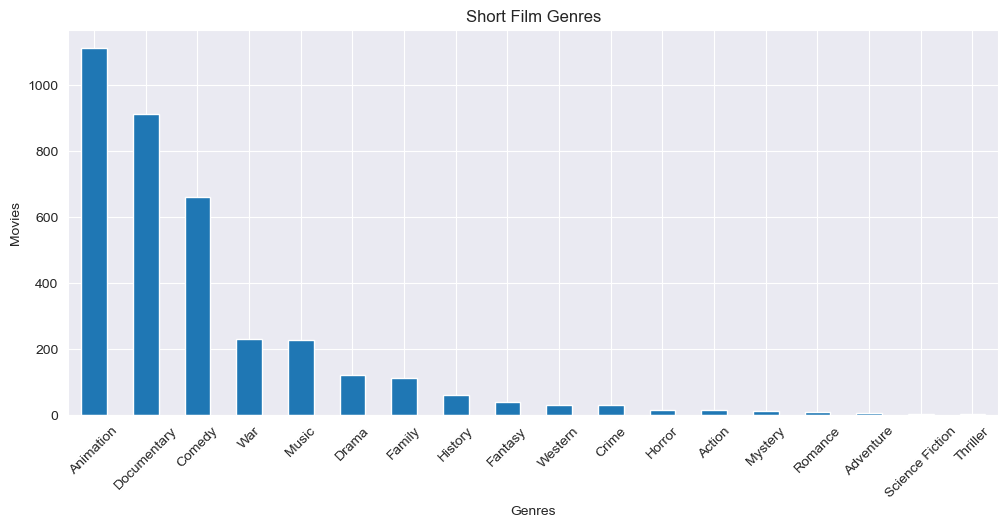

In [455]:
ax = shortwar_genre['genre'].value_counts() \
    .plot(kind = 'bar', title = "Short Film Genres", figsize = (12,5))
ax.set_xlabel('Genres')
ax.set_ylabel('Movies')
plt.xticks(rotation=45)
plt.show()

While documentaries and comedies strive to keep up, animation reigns supreme in the realm of short films. This numerical disparity highlights animation as the preferred choice for shorter productions.

We shall now analyze the overall market dominance of each genre during that period to determine whether animation maintained its prevalent position.

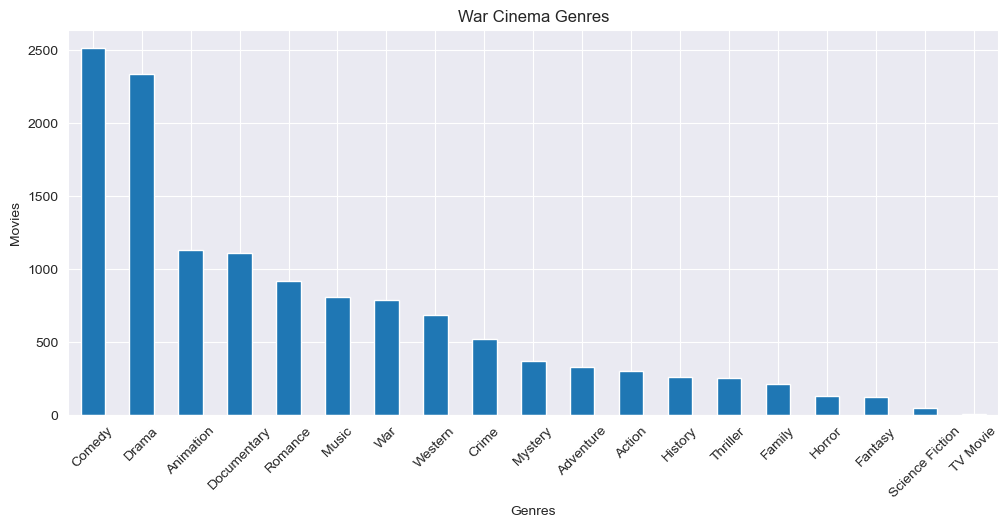

In [456]:
war_genre = pd.merge(war_df, genres_df, on='id', how='left')

ax = war_genre['genre'].value_counts() \
    .plot(kind = 'bar', title = "War Cinema Genres", figsize = (12,5))
ax.set_xlabel('Genres')
ax.set_ylabel('Movies')
plt.xticks(rotation=45)
plt.show()

The graph clearly indicates that comedies and dramas were the most prevalent genres, offering a much-needed escape from the challenging realities of the time. Notably, war films also held a significant position in the ranking with around 800 titles. This substantial number of war-related productions likely reflects both the influence of the historical context and potential propagandistic intentions of the era, utilizing cinema as a tool to shape public opinion and reinforce specific political and ideological messages. Animation, while ranking third, primarily consisted of short films when compared to the previous graph. Documentaries and romance films follow. At the bottom of the ranking are TV movies, a still minor category but one that would become increasingly significant in subsequent years, thanks to technological advancements, eventually competing directly with cinemas and theaters.

Let's see if the countries involved in the conflict are the ones producing the most war films.

In [457]:
war_countries = pd.merge(war_genre, countries_df, on='id', how='left')
war_countries

id                  movie_title    date  \
0      1940950             Mass Radiography  1943.0   
1      1000361                   Casablanca  1942.0   
2      1000361                   Casablanca  1942.0   
3      1000382                 Citizen Kane  1941.0   
4      1000382                 Citizen Kane  1941.0   
...        ...                          ...     ...   
14151  1937364          Defenders of Tobruk  1941.0   
14152  1937364          Defenders of Tobruk  1941.0   
14153  1937365               The Blacksmith  1941.0   
14154  1937366           Le Secours d'Hiver  1941.0   
14155  1937367  Getting Down to Earth Again  1940.0   

                                                 tagline  \
0                                                   None   
1               They had a date with fate in Casablanca!   
2               They had a date with fate in Casablanca!   
3      Some called him a hero...others called him a h...   
4      Some called him a hero...others called him a h...   
...                                                  ...   
14151  Australian newsreel about the siege of Tobruk ...   
14152  Australian newsreel about the siege of Tobruk ...   
14153                                               None   
14154                                               None   
14155                                               None   

                                             description  minute  rating  \
0      Encouraging tens of thousands of people to str...    10.0     NaN   
1      In Casablanca, Morocco in December 1941, a cyn...   102.0    4.27   
2      In Casablanca, Morocco in December 1941, a cyn...   102.0    4.27   
3      Newspaper magnate Charles Foster Kane is taken...   119.0    4.21   
4      Newspaper magnate Charles Foster Kane is taken...   119.0    4.21   
...                                                  ...     ...     ...   
14151  Australian newsreel, telling of the besieged A...     8.0     NaN   
14152  Australian newsreel, telling of the besieged A...     8.0     NaN   
14153  Time-honoured craftsmanship at Corfe, near Tau...     5.0     NaN   
14154  Presentation of the activities of Secours d'Hi...    11.0     NaN   
14155  Getting Down to Earth Again, is a black and wh...    28.0     NaN   

             genre   genre_id    country  country_id  
0      Documentary  1046482.0         UK    692810.0  
1            Drama      976.0        USA       504.0  
2          Romance      977.0        USA       504.0  
3            Drama     1033.0        USA       529.0  
4          Mystery     1034.0        USA       529.0  
...            ...        ...        ...         ...  
14151  Documentary  1044521.0  Australia    691109.0  
14152          War  1044522.0  Australia    691109.0  
14153  Documentary  1044523.0         UK    691110.0  
14154          NaN        NaN        NaN         NaN  
14155  Documentary  1044524.0        USA    691111.0  

[14156 rows x 11 columns]

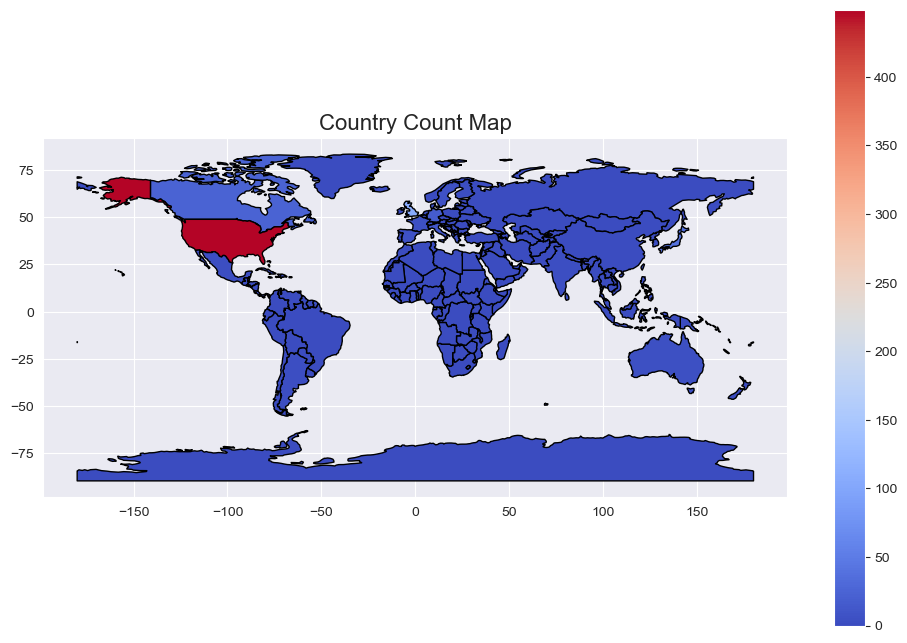

In [458]:
war_war = war_countries[war_countries['genre'].str.contains('war', case=False, na=False)]

warfilmcountry_counts = war_war['country'].value_counts().reset_index()
warfilmcountry_counts.columns = ['country', 'count']

world_data = countries_gdf.merge(warfilmcountry_counts, left_on='ADMIN', right_on='country', how='left')
world_data['count'] = world_data['count'].fillna(0)

world_data.plot(column='count', cmap='coolwarm', legend=True, figsize=(12, 8), edgecolor='black')

# Aggiunge un titolo e mostra la mappa
plt.title('Country Count Map', fontsize=16)
plt.show()

As expected, the United States dominated global film production. However, our hypothesis is not entirely supported by the data, as Germany, Great Britain, the Soviet Union, France, Italy, and Japan – all involved in the conflict – produced relatively few war films. This suggests a more limited or even negligible use of film for propaganda purposes in these countries.

We'll now explore the most popular film genres in our country during this time and assess the impact of the fall of fascism and the rise of the Resistance.

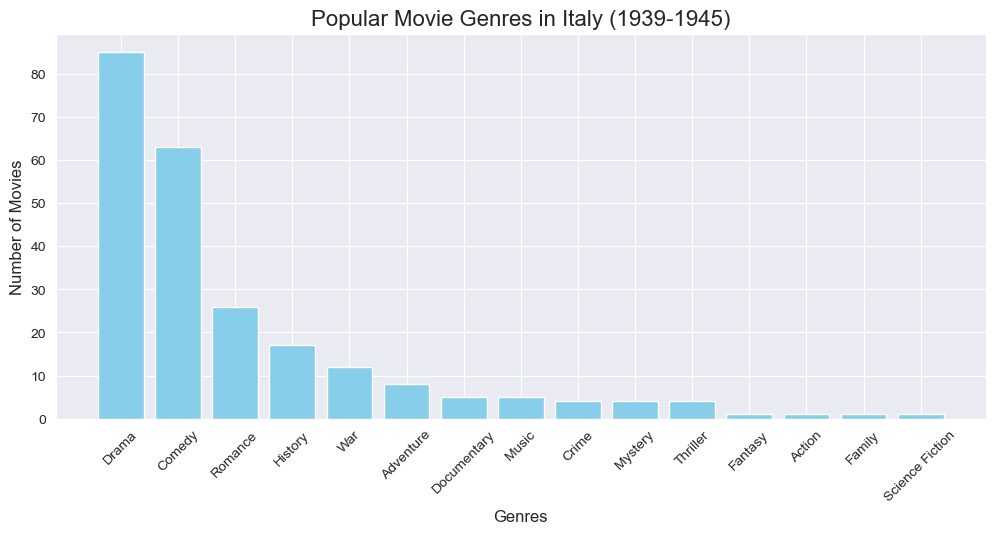

In [459]:
waritaly_movies = war_countries[war_countries['country'] == 'Italy']

waritalygenre_counts = waritaly_movies['genre'].value_counts().reset_index()
waritalygenre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(12, 5))
plt.bar(waritalygenre_counts['Genre'], waritalygenre_counts['Count'], color='skyblue')
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Popular Movie Genres in Italy (1939-1945)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

As anticipated based on the previous global production graph, drama and comedy also dominated the Italian market. There seems to be no significant political or propagandistic influence on film production, although the war genre ranks fifth in popularity during this period. Interestingly, the history genre also ranks quite high. Let's see what these films were actually about.

In [460]:
history_waritaly_movies = waritaly_movies.loc[(waritaly_movies['genre'] == 'History')]
history_waritaly_movies

id                                        movie_title    date  \
48     1003001                                    Rome, Open City  1945.0   
3966   1122008                               Piccolo mondo antico  1941.0   
4366   1137083                                      The Betrothed  1941.0   
5588   1185167  The Count of Monte Cristo Part 1 - The Prisone...  1943.0   
6055   1205365  The Count of Monte Cristo Part 2 - The Retalia...  1943.0   
6723   1231700                                     Beatrice Cenci  1941.0   
8318   1305267                                       Fra' Diavolo  1942.0   
9013   1337414                                       Fear No Evil  1945.0   
9367   1355475                   Caravaggio, il pittore maledetto  1941.0   
9759   1372917                                       La fornarina  1944.0   
10109  1388882                                    Pia de' Tolomei  1941.0   
10157  1391169                          Sant'Elena, piccola isola  1943.0   
10734  1423584                                     Rita da Cascia  1943.0   
11140  1443414                                   Le vie del cuore  1942.0   
11460  1463960                              L'abito nero da sposa  1945.0   
12828  1614070                                      Addio, amore!  1943.0   
13698  1783465                               La regina di Navarra  1942.0   

                            tagline  \
48     Our battle has barely begun.   
3966                           None   
4366                           None   
5588                           None   
6055                           None   
6723                           None   
8318                           None   
9013                           None   
9367                           None   
9759                           None   
10109                          None   
10157                          None   
10734                          None   
11140                          None   
11460                          None   
12828                          None   
13698                          None   

                                             description  minute  rating  \
48     During the Nazi occupation of Rome in 1944, th...   103.0    4.15   
3966   Franco, a young man of noble descent, marries ...   106.0     NaN   
4366   Renzo and Lucia's love story is jeopardized by...   112.0     NaN   
5588   Edmond Dantes is falsely accused by those jeal...    90.0     NaN   
6055   Having found the fabulous treasure of which Ab...    90.0     NaN   
6723   Italian historical drama portraying the story ...    80.0     NaN   
8318   The leader of a band of mountain bandits defen...    82.0     NaN   
9013   The life of Saint Benedict, the founder of Wes...    91.0     NaN   
9367   Caravaggio, il pittore maledetto is a 1941 Ita...   108.0     NaN   
9759   During Italian renaissance, young painter Raff...    96.0     NaN   
10109                                               None    78.0     NaN   
10157  The last days of Napoleon on the island of Sai...    90.0     NaN   
10734  Biographical film about Saint Rita da Cascia, ...    83.0     NaN   
11140  1875. After completing her studies in boarding...    83.0     NaN   
11460                                               None    88.0     NaN   
12828  Naples, 1880. Two young sisters from a noble f...    88.0     NaN   
13698                                               None    86.0     NaN   

         genre  genre_id country  country_id  
48     History    7789.0   Italy      4462.0  
3966   History  233261.0   Italy    147114.0  
4366   History  257195.0   Italy    162398.0  
5588   History  329343.0   Italy    208748.0  
6055   History  357952.0   Italy    227073.0  
6723   History  393986.0   Italy    250057.0  
8318   History  486838.0   Italy    310535.0  
9013   History  524755.0   Italy    335203.0  
9367   History  546101.0   Italy    348921.0  
9759   History  566397.0   Italy    362061.0  
10109  History  584399.0   Italy    

This confirms our earlier hypothesis that fascism (and the subsequent anti-fascist struggle) did not have a significant impact on these productions.

Let's take a look at which film genres won the most Oscars during that period.

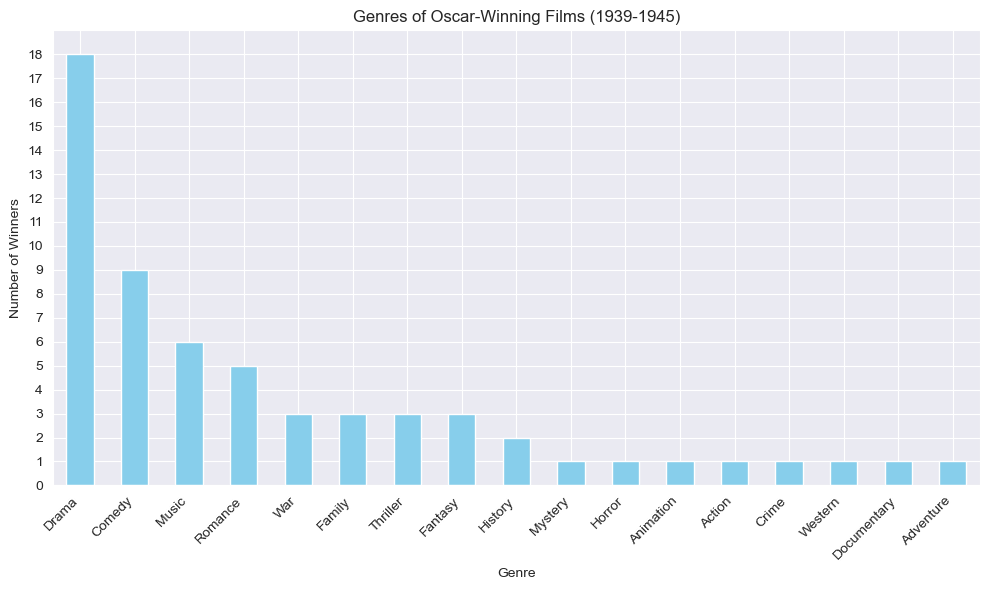

In [461]:
war_oscars = pd.merge(war_genre, oscars_df, on=['movie_title'], how='inner')
war_oscars = war_oscars.loc[((war_oscars['date'] > 1939) & (war_oscars['date'] <= 1945) & (war_oscars['year_film'] >= 1945) & (war_oscars['year_film'] <= 1961))]

war_oscar_winners = war_oscars[war_oscars['winner'] == True]

war_genre_counts = war_oscar_winners['genre'].value_counts()

plt.figure(figsize=(10,6))
war_genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genres of Oscar-Winning Films (1939-1945)')
plt.xlabel('Genre')
plt.ylabel('Number of Winners')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(war_genre_counts) + 1)
plt.yticks(range(0, max(war_genre_counts) + 1))
plt.tight_layout()
plt.show()

No surprises here, everything is proportional to the number of films produced in each genre, so it was expected that drama and comedy would be the most awarded genres.

## Post-war Cinema (1945-1960)

The aftermath of World War II ushered in a period of intense cultural and social transformation, which profoundly influenced global cinema. Filmmaking became a vehicle for processing collective trauma, questioning authority, and redefining identity in a world reshaped by conflict and reconstruction. This era witnessed the emergence of influential cinematic movements—such as Italian Neorealism and the French New Wave—that broke away from traditional narratives and aesthetics, favoring realism, location shooting, and stories centered on ordinary people. Postwar cinema laid the groundwork for a more critical, human-centered approach to storytelling, marking a pivotal shift in both form and content.

In [462]:
postwar_df = movies_df.loc[(movies_df['date'] > 1945) & (movies_df['date'] <= 1960)]
postwar_df.head(10)

id           movie_title    date tagline  \
844  1940934      Popeye's Travels  1960.0    None   
845  1940935          Tiger Burger  1960.0    None   
846  1940936      Die Insel Gottes  1960.0    None   
847  1940937      Scherzo wiosenne  1960.0    None   
848  1940938        Belo Horizonte  1958.0    None   
849  1940939     The Phoenix Tower  1957.0    None   
850  1940940  Kawulke contra Meyer  1956.0    None   
851  1940941       Lacrime d'amore  1954.0    None   
852  1940942        The Bottle Imp  1952.0    None   
853  1940943             حكم القوي  1951.0    None   

                                           description  minute  rating  
844  Popeye's journey in this short is based upon t...     7.0     NaN  
845  Popeye and Wimpy are in India where the native...     5.0     NaN  
846                                               None     NaN     NaN  
847                       a Krzysztof Debowski cartoon     7.0     NaN  
848  A panel of the capital of Minas Gerais at the ...    18.0     NaN  
849  A short documentary charting the construction ...    39.0     NaN  
850                                               None     NaN     NaN  
851                                               None   107.0     NaN  
852  Story loosely based on Robert Louis Stevenson'...    62.0     NaN  
853  Medhat and Kassem are partners who find themse...     NaN     NaN

Let's start, as usual, with the analysis of the Movies Runtime, to see its evolution

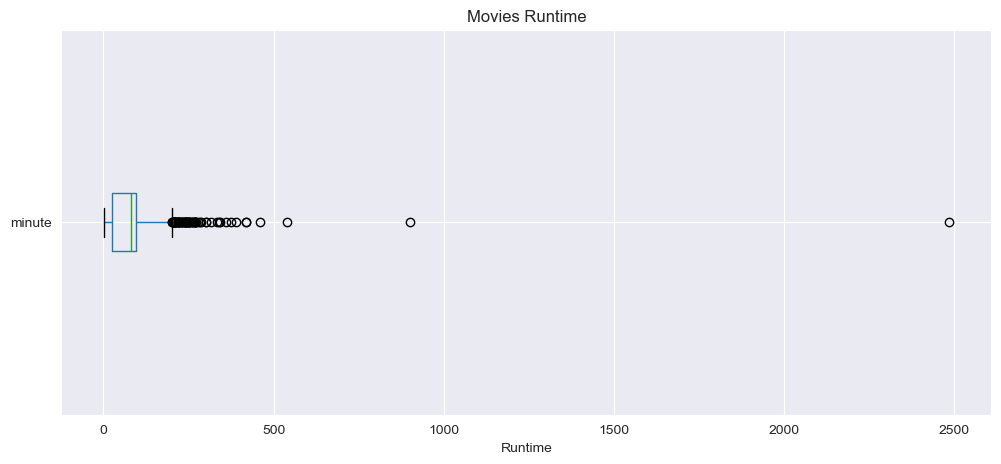

In [463]:
ax = postwar_df.boxplot(column='minute', vert=False, figsize=(12, 5))
ax.set_title('Movies Runtime')
ax.set_xlabel('Runtime')
plt.show()

For the period under analysis, it is reasonable to assume that films longer than 270 minutes are outliers.

In [464]:
outliers = postwar_df.loc[postwar_df['minute'] > 270]
outliers

id                                 movie_title    date  \
57201   1055618                         Quiet Flows the Don  1957.0   
95433   1095062    The Vigilante: Fighting Hero of the West  1947.0   
124776  1123178         George Stevens World War II Footage  1946.0   
145255  1143691                             An Age of Kings  1960.0   
151453  1149901   Captain Video, Master of the Stratosphere  1951.0   
200398  1198794  Commando Cody: Sky Marshal of the Universe  1953.0   
212704  1212450                                    The Veil  1958.0   
276645  1275045                         The Crimson Peacock  1954.0   
298594  1296951                               Dr. Fu Manchu  1956.0   
309048  1307398                           The Living Christ  1951.0   
362226  1360716                        Virgin Soil Upturned  1959.0   
369459  1367890                                   The Idiot  1959.0   
395049  1393431                    The Saga of Andy Burnett  1957.0   
400567  1398952                Gunfighters of the Northwest  1954.0   
418641  1417011                  Am grünen Strand der Spree  1960.0   
420484  1418855                               Barnaby Rudge  1960.0   
632012  1630253                              The Front Page  1950.0   
645816  1644069                            The Living Bible  1952.0   
905238  1903676                           Astronomy for You  1959.0   

                                                  tagline  \
57201   The epic film based on Mikhail Sholokhov's cla...   
95433                                                None   
124776                                               None   
145255                                               None   
151453  HERE AT LAST! THE CONQUEROR OF SPACE IN THE AL...   
200398                                               None   
212704                                               None   
276645                                               None   
298594                                               None   
309048                                               None   
362226                                               None   
369459                                               None   
395049                                               None   
400567                    LAST OF THE WHITE HORSE REBELS!   
418641                                               None   
420484                                               None   
632012                                               None   
645816                                               None   
905238                                               None   

                                              description  minute  rating  
57201   Based on the novel of the same name by Mikhail...   340.0    3.54  
95433   Columbia's 33rd serial (made between "Jack Arm...   285.0     NaN  
124776  Raw footage filmed by George Stevens during Wo...   460.0     NaN  
145255  A linking together of Shakespeare's history pl...   900.0     NaN  
151453  Space hero Captain Video battles the evil Vult...   287.0     NaN  
200398  Dangerous climate changes are ravaging Earth a...   300.0     NaN  
212704  The legendary actor Boris Karloff presents a c...   300.0     NaN  
276645  One of the greatest film serials ever to come ...   271.0     NaN  
298594  The Adventures of Dr. Fu Manchu is a syndicate...   420.0     NaN  
309048  The first ever made for TV miniseries document...   344.0     NaN  
362226  The movie is based on the the same name novel ...   278.0     NaN  
369459  Italian televison adaptation of Fyodor Dostoev...   420.0     NaN  
395049                                         TV series.   360.0     NaN  
400567  Constable Ward is assigned to track down a mys...   315.0     NaN  
418641  Am grünen Strand der Spree was a five-part Ger...  2485.0     NaN  
420484  Barnaby Rudge is a British drama television se...   390.0     NaN  
632012  Newspaper comedy based loosely on the 1928 sta...   540.0     NaN  
645

As expected, films with a running time longer than 270 minutes are serial titles, with the exception of Alexander Ivanov's "Virgin Soil Upturned" (1959).

In [465]:
vsu = postwar_df.loc[postwar_df['movie_title'] == 'Virgin Soil Upturned']
vsu

id           movie_title    date tagline  \
362226  1360716  Virgin Soil Upturned  1959.0    None   

                                              description  minute  rating  
362226  The movie is based on the the same name novel ...   278.0     NaN

In [466]:
postwar_df = postwar_df.loc[postwar_df['minute'] <= 270]

In [467]:
postwar_df = pd.concat([postwar_df, vsu], axis=0, ignore_index=True)
postwar_df.tail()

id                  movie_title    date tagline  \
28266  1937356              Wife Tames Wolf  1947.0    None   
28267  1937358            La Ceinture Dorée  1947.0    None   
28268  1937359            After Sixty Years  1946.0    None   
28269  1937360  Des hommes comme les autres  1946.0    None   
28270  1360716         Virgin Soil Upturned  1959.0    None   

                                             description  minute  rating  
28266  Caught philandering (for the 1867th time, give...    17.0     NaN  
28267  La Ceinture Dorée is an institutional document...    16.0     NaN  
28268  The Johannesburg City Council presents “After ...    29.0     NaN  
28269  Presents the work of the provincial insitution...    26.0     NaN  
28270  The movie is based on the the same name novel ...   278.0     NaN

Let's see a graphic on Movies Runtime

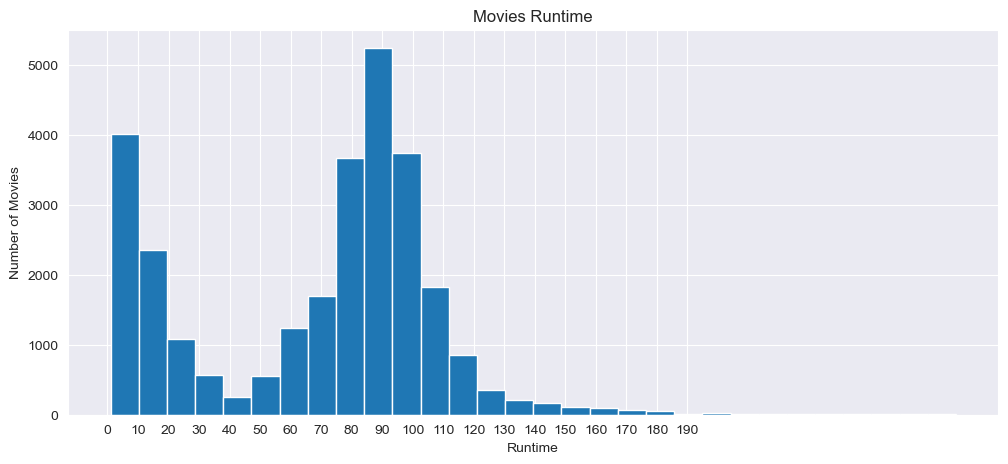

In [468]:
ax = postwar_df['minute'].plot(kind='hist', bins=30, title='Movies Runtime', figsize=(12, 5))
ax.set_xlabel('Runtime')
ax.set_ylabel('Number of Movies')
plt.xticks(np.arange(0, 200, 10))
plt.show()

This chart illustrates the distribution of movie runtimes in the post-WWII era. Notably, there's a strong peak around 90 minutes, indicating that productions with runtimes similar to what we consider standard today became increasingly prevalent during this period.

In [469]:
postwar_df['minute'].describe()

count    28271.000000
mean        68.238124
std         39.403406
min          1.000000
25%         24.000000
50%         81.000000
75%         95.000000
max        278.000000
Name: minute, dtype: float64

In [470]:
short_movies = postwar_df.loc[postwar_df['minute'] <= 52]
short_movies.count()

id             8488
movie_title    8488
date           8488
tagline         289
description    7967
minute         8488
rating          924
dtype: int64

The average for the period is 68 minutes, with a considerable number of short films (8488).

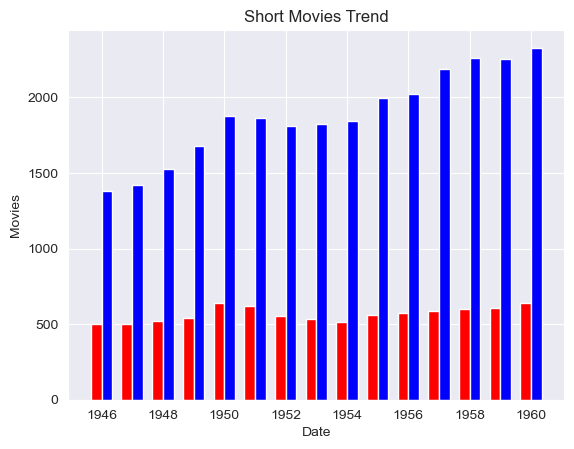

<Figure size 1200x600 with 0 Axes>

In [471]:
short_counters = short_movies.groupby('date').size()
counters = postwar_df.groupby('date').size()
bar_width = 0.35
# Short Movies Position
bar_positions_1 = np.array(short_counters.index) - bar_width / 2
# All Movies Position
bar_positions_2 = np.array(counters.index) + bar_width / 2

plt.bar(bar_positions_1, short_counters.values, width=bar_width, label='Short Movies', color='red')
plt.bar(bar_positions_2, counters.values, width=bar_width, label='All Movies', color='blue')
plt.title("Short Movies Trend")
plt.xlabel("Date")
plt.ylabel("Movies")
plt.figure(figsize=(12,6))
plt.show()

In [472]:
prop = len(short_movies)/len(postwar_df)
prop

0.3002369919705706

We note that short film productions have increased in number (8488), but have decreased in proportion to the amount of films produced (30% of total productions).

Let's see how the Walt Disney Company has evolved.

In [473]:
pw_studios = pd.merge(postwar_df, studios_df, on='id', how='left')
disney_movies = pw_studios.loc[pw_studios['studio'].apply(lambda x: is_Disney(x))]
disney_movies

id                                    movie_title    date  \
33     1000946                            Alice in Wonderland  1951.0   
45     1001226                                     Cinderella  1950.0   
48     1001296                                Sleeping Beauty  1959.0   
56     1001373                                      Peter Pan  1953.0   
58     1001442                             Lady and the Tramp  1955.0   
...        ...                                            ...     ...   
22046  1417971                                A World Is Born  1955.0   
22265  1422570                              The Crisler Story  1957.0   
23738  1457558                          The Horse of the West  1957.0   
24847  1481961                         Wild Burro of the West  1960.0   
26450  1525661  The Hardy Boys: The Mystery of the Ghost Farm  1957.0   

                                                 tagline  \
33               A world of wonders in One Great Picture   
45                    The greatest love story ever told.   
48                         Awaken to a World of Wonders!   
56                   It will live in your heart forever!   
58     She's from the leash and license set... he's f...   
...                                                  ...   
22046                                               None   
22265                                               None   
23738                                               None   
24847                                   Yee-Haw Burrito!   
26450                                               None   

                                             description  minute  rating  \
33     On a golden afternoon, young Alice follows a W...    75.0    3.74   
45     Cinderella has faith her dreams of a better li...    74.0    3.49   
48     A beautiful princess born in a faraway kingdom...    75.0    3.49   
56     Leaving the safety of their nursery behind, We...    77.0    3.51   
58     Lady, a golden cocker spaniel, meets up with a...    76.0    3.52   
...                                                  ...     ...     ...   
22046  Using the segment "Rite of Spring" from Fantas...    20.0     NaN   
22265  A look at the people that shot the footage for...    19.0     NaN   
23738  The story of The Bay Lady, a quarter horse bor...    46.0     NaN   
24847  Dusty is a small burro living a quiet life wit...    47.0     NaN   
26450  A 15 episode serial in which boy detectives Fr...   150.0     NaN   

                        studio  studios_id  
33     Walt Disney Productions      3142.0  
45     Walt Disney Productions      4130.0  
48     Walt Disney Productions      4379.0  
56     Walt Disney Productions      4617.0  
58     Walt Disney Productions      4866.0  
...                        ...         ...  
22046  Walt Disney Productions    454201.0  
22265  Walt Disney Productions    457132.0  
23738  Walt Disney Productions    477497.0  
24847  Walt Disney Productions    491137.0  
26450  Walt Disney Productions    514151.0  

[309 rows x 9 columns]

In [474]:
disney_movies['minute'].describe()

count    309.000000
mean      28.171521
std       33.372256
min        1.000000
25%        7.000000
50%        8.000000
75%       45.000000
max      222.000000
Name: minute, dtype: float64

We can observe how the average runtime of Disney films more than tripled during this period compared to their early productions, highlighting the continuous advancement of technologies that made such productions less restrictive.

In [475]:
disney_shorts = disney_movies.loc[disney_movies['minute'] <= 52]
disney_shorts

id                  movie_title    date  \
723    1012170  The Legend of Sleepy Hollow  1949.0   
730    1012275               Trick or Treat  1952.0   
1061   1016842       Pluto's Christmas Tree  1952.0   
1393   1021643     Mickey and the Beanstalk  1947.0   
1506   1023566     Donald in Mathmagic Land  1959.0   
...        ...                          ...     ...   
21848  1413383          The Peter Pan Story  1952.0   
22046  1417971              A World Is Born  1955.0   
22265  1422570            The Crisler Story  1957.0   
23738  1457558        The Horse of the West  1957.0   
24847  1481961       Wild Burro of the West  1960.0   

                                                 tagline  \
723    Bing and Walt ride herd on The Headless Horseman!   
730    Donald plays a trick on his nephews, but a wit...   
1061   Pluto and Mickey bring home a special Christma...   
1393                                                None   
1506                                                None   
...                                                  ...   
21848                                               None   
22046                                               None   
22265                                               None   
23738                                               None   
24847                                   Yee-Haw Burrito!   

                                             description  minute  rating  \
723    Washington Irving's tale of Ichabod Crane and ...    37.0    3.65   
730    When the nephews come to Donald's house in the...     8.0    3.72   
1061   Pluto comes bounding outside to help Mickey ge...     7.0    3.57   
1393   A mysterious thief has stolen the prosperous H...    29.0    3.48   
1506   Disney used animation here to explain through ...    27.0    3.77   
...                                                  ...     ...     ...   
21848  Made in the early days of television, this pro...    12.0     NaN   
22046  Using the segment "Rite of Spring" from Fantas...    20.0     NaN   
22265  A look at the people that shot the footage for...    19.0     NaN   
23738  The story of The Bay Lady, a quarter horse bor...    46.0     NaN   
24847  Dusty is a small burro living a quiet life wit...    47.0     NaN   

                        studio  studios_id  
723    Walt Disney Productions     37972.0  
730    Walt Disney Productions     38289.0  
1061   Walt Disney Productions     50465.0  
1393   Walt Disney Productions     62004.0  
1506   Walt Disney Productions     66464.0  
...                        ...         ...  
21848      Walt Disney Studios    451507.0  
22046  Walt Disney Productions    454201.0  
22265  Walt Disney Productions    457132.0  
23738  Walt Disney Productions    477497.0  
24847  Walt Disney Productions    491137.0  

[246 rows x 9 columns]

In [476]:
disney_movies.loc[disney_movies['minute'] > 52]

id                                    movie_title    date  \
33     1000946                            Alice in Wonderland  1951.0   
45     1001226                                     Cinderella  1950.0   
48     1001296                                Sleeping Beauty  1959.0   
56     1001373                                      Peter Pan  1953.0   
58     1001442                             Lady and the Tramp  1955.0   
...        ...                                            ...     ...   
16499  1296952                                A Story of Dogs  1954.0   
17385  1315966                            Christmas Jollities  1953.0   
19852  1369104                            Gundown at Sandoval  1959.0   
20856  1391856       Texas John Slaughter: Geronimo's Revenge  1960.0   
26450  1525661  The Hardy Boys: The Mystery of the Ghost Farm  1957.0   

                                                 tagline  \
33               A world of wonders in One Great Picture   
45                    The greatest love story ever told.   
48                         Awaken to a World of Wonders!   
56                   It will live in your heart forever!   
58     She's from the leash and license set... he's f...   
...                                                  ...   
16499                                               None   
17385                                               None   
19852                                               None   
20856                                               None   
26450                                               None   

                                             description  minute  rating  \
33     On a golden afternoon, young Alice follows a W...    75.0    3.74   
45     Cinderella has faith her dreams of a better li...    74.0    3.49   
48     A beautiful princess born in a faraway kingdom...    75.0    3.49   
56     Leaving the safety of their nursery behind, We...    77.0    3.51   
58     Lady, a golden cocker spaniel, meets up with a...    76.0    3.52   
...                                                  ...     ...     ...   
16499                                               None    60.0     NaN   
17385                    A Walt Disney cartoon anthology    60.0     NaN   
19852  In this exciting western, cowpoke Texas John S...    72.0     NaN   
20856  Texas John Slaughter is a peace-loving family ...    77.0     NaN   
26450  A 15 episode serial in which boy detectives Fr...   150.0     NaN   

                        studio  studios_id  
33     Walt Disney Productions      3142.0  
45     Walt Disney Productions      4130.0  
48     Walt Disney Productions      4379.0  
56     Walt Disney Productions      4617.0  
58     Walt Disney Productions      4866.0  
...                        ...         ...  
16499  Walt Disney Productions    374768.0  
17385  Walt Disney Productions    388081.0  
19852  Walt Disney Productions    423847.0  
20856  Walt Disney Productions    438345.0  
26450  Walt Disney Productions    514151.0  

[63 rows x 9 columns]

Disney's feature film production has grown significantly, with 62 films (excluding the film serial "The Hardy Boys: The Mystery of the Ghost Farm")

Let's see a comparison between Disney's Short Movies and the others

In [477]:
short_studios = pw_studios.loc[pw_studios['minute'] <= 52]
short_studios

id                  movie_title    date tagline  \
0      1940934             Popeye's Travels  1960.0    None   
1      1940935                 Tiger Burger  1960.0    None   
2      1940937             Scherzo wiosenne  1960.0    None   
3      1940938               Belo Horizonte  1958.0    None   
4      1940939            The Phoenix Tower  1957.0    None   
...        ...                          ...     ...     ...   
33218  1937355                     Le Socle  1948.0    None   
33219  1937356              Wife Tames Wolf  1947.0    None   
33220  1937358            La Ceinture Dorée  1947.0    None   
33221  1937359            After Sixty Years  1946.0    None   
33222  1937360  Des hommes comme les autres  1946.0    None   

                                             description  minute  rating  \
0      Popeye's journey in this short is based upon t...     7.0     NaN   
1      Popeye and Wimpy are in India where the native...     5.0     NaN   
2                           a Krzysztof Debowski cartoon     7.0     NaN   
3      A panel of the capital of Minas Gerais at the ...    18.0     NaN   
4      A short documentary charting the construction ...    39.0     NaN   
...                                                  ...     ...     ...   
33218  The bases, under the occupation, lost their st...    16.0     NaN   
33219  Caught philandering (for the 1867th time, give...    17.0     NaN   
33220  La Ceinture Dorée is an institutional document...    16.0     NaN   
33221  The Johannesburg City Council presents “After ...    29.0     NaN   
33222  Presents the work of the provincial insitution...    26.0     NaN   

                                              studio  studios_id  
0                          Paramount Cartoon Studios    678826.0  
1                            King Features Syndicate    678827.0  
2                          Studio Miniatur Filmowych    678828.0  
3      INCE - Instituto Nacional de Cinema Educativo    678829.0  
4                                                NaN         NaN  
...                                              ...         ...  
33218                                            NaN         NaN  
33219                             RKO Radio Pictures    677991.0  
33220         Equipes Artisanales Cinématographiques    677992.0  
33221                   African Film Productions Ltd    677993.0  
33222                                            NaN         NaN  

[9550 rows x 9 columns]

In [616]:
short_studios.loc[:, 'Disney'] = short_studios['studio'].apply(lambda x: is_Disney(x))
short_studios

id                      movie_title    date tagline  \
0       1940794                         Ninja Ko  1990.0    None   
7       1940800           The Charming Traveller  1989.0    None   
9       1940802             Mikko, Pavlova's Son  1989.0    None   
14      1940806                    Space Fantasy  1989.0    None   
17      1940809                          Ledvina  1988.0    None   
...         ...                              ...     ...     ...   
176401  1937294                 The Great Kurobe  1961.0    None   
176402  1937295                         Mexico 1  1961.0    None   
176403  1937296                         Mexico 2  1961.0    None   
176404  1937297  Mexico: The Land and the People  1961.0    None   
176405  1937298             Werbung im Fernsehen  1961.0    None   

                                              description  minute  rating  \
0       Ninja Ko runs into trouble somewhere in the tr...     4.0     NaN   
7                                        Animation short.     8.0     NaN   
9       Dolphines Tristan and Pavlova adopt a boy, Mik...    10.0     NaN   
14      Dedicated to the future joint flight of Soviet...    10.0     NaN   
17                                                   None    41.0     NaN   
...                                                   ...     ...     ...   
176401                                               None    41.0     NaN   
176402  Soundtrack:  Carlos Chávez's XOCHIPILLI, AN IM...    20.0     NaN   
176403  Soundtrack:  Manuel de Falla's HOMENAJE, POUR ...    13.0     NaN   
176404  This film portrays the changes that are taking...    20.0     NaN   
176405  Short educational film about advertising, show...     9.0     NaN   

                                                   studio  studios_id  Disney  
0                                                     NaN         NaN   False  
7                                               Floricica    678759.0   False  
9                                           Soyuzmultfilm    678761.0   False  
14                                              Floricica    678766.0   False  
17                          Československá televize Praha    678767.0   False  
...                                                   ...         ...     ...  
176401                                                NaN         NaN   False  
176402                                                NaN         NaN   False  
176403                                                NaN         NaN   False  
176404                      Encyclopedia Brittanica Films    677960.0   False  
176405  Institut für Film und Bild in Wissenschaft und...    677961.0   False  

[43168 rows x 10 columns]

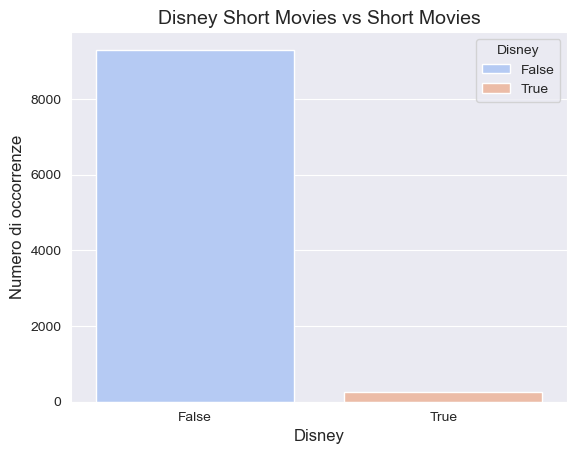

<Figure size 1200x800 with 0 Axes>

In [479]:
sns.countplot(x='Disney', data=short_studios, hue='Disney', palette='coolwarm')

plt.title('Disney Short Movies vs Short Movies', fontsize=14)
plt.xlabel('Disney', fontsize=12)
plt.ylabel('Numero di occorrenze', fontsize=12)
plt.figure(figsize=(12, 8))
plt.show()

Let's see the comparison between Disney's Animated Movies and the others

In [480]:
animation_studios = pd.merge(pw_studios, genres_df, on='id', how='left')
animation_studios = animation_studios.loc[animation_studios['genre'] == 'Animation']

In [481]:
animation_studios.loc[:, 'Disney'] = animation_studios['studio'].apply(lambda x: is_Disney(x))
animation_studios

id                       movie_title    date tagline  \
0      1940934                  Popeye's Travels  1960.0    None   
1      1940935                      Tiger Burger  1960.0    None   
2      1940937                  Scherzo wiosenne  1960.0    None   
7      1940942                    The Bottle Imp  1952.0    None   
10     1940947                      The Big City  1946.0    None   
...        ...                               ...     ...     ...   
50357  1898035           Ein verbotener Ausflug!  1952.0    None   
50359  1898035           Ein verbotener Ausflug!  1952.0    None   
50579  1923322                 The World of Sine  1960.0    None   
50749  1923470  Men of Merit (a Lantern Lecture)  1948.0    None   
50773  1923490               Σιγά τους Κεραυνούς  1946.0    None   

                                             description  minute  rating  \
0      Popeye's journey in this short is based upon t...     7.0     NaN   
1      Popeye and Wimpy are in India where the native...     5.0     NaN   
2                           a Krzysztof Debowski cartoon     7.0     NaN   
7      Story loosely based on Robert Louis Stevenson'...    62.0     NaN   
10     Bubble, a cockney cab driver, and Squeek, his ...     7.0     NaN   
...                                                  ...     ...     ...   
50357           Zoo animals embark on a journey by train    10.0     NaN   
50359           Zoo animals embark on a journey by train    10.0     NaN   
50579          An early, experimental Jules Engel short.     6.0     NaN   
50749  “Vibrant, progressive animation contrasts with...     5.0     NaN   
50773                                               None     5.0     NaN   

                             studio  studios_id      genre   genre_id  Disney  
0         Paramount Cartoon Studios    678826.0  Animation  1046468.0   False  
1           King Features Syndicate    678827.0  Animation  1046469.0   False  
2         Studio Miniatur Filmowych    678828.0  Animation  1046471.0   False  
7                               NaN         NaN  Animation  1046476.0   False  
10     British Animated Productions    678830.0  Animation  1046479.0   False  
...                             ...         ...        ...        ...     ...  
50357           Deutsche Bundesbahn    668043.0  Animation  1026487.0   False  
50359                      EOS-Film    668044.0  Animation  1026487.0   False  
50579                           NaN         NaN  Animation  1039040.0   False  
50749           W.M. Larkins Studio    675023.0  Animation  1039179.0   False  
50773                           NaN         NaN  Animation  1039201.0   False  

[3184 rows x 12 columns]

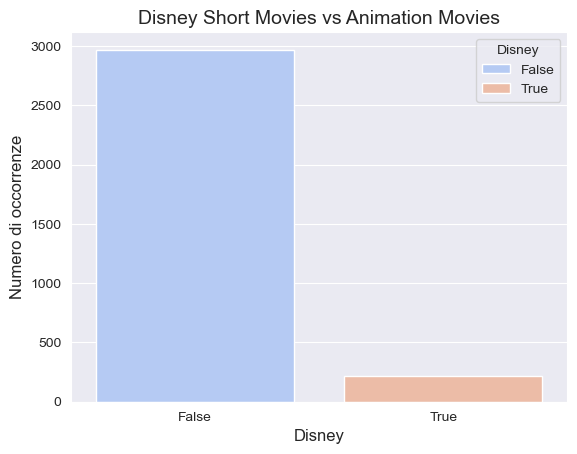

<Figure size 1200x800 with 0 Axes>

In [482]:
sns.countplot(x='Disney', data=animation_studios, hue='Disney', palette='coolwarm')

plt.title('Disney Short Movies vs Animation Movies', fontsize=14)
plt.xlabel('Disney', fontsize=12)
plt.ylabel('Numero di occorrenze', fontsize=12)
plt.figure(figsize=(12, 8))
plt.show()

The proportion between Disney's Animation Movies and the others remained similar.

Let's focus on the Ratings

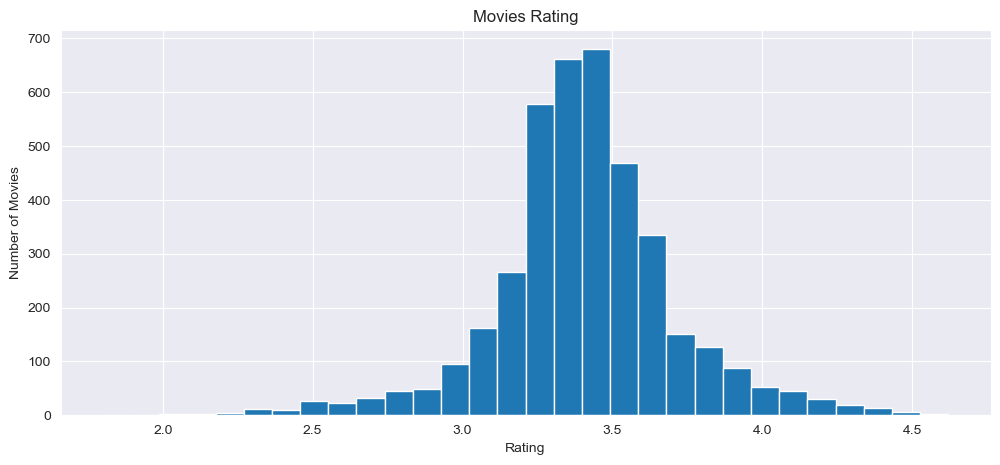

In [483]:
ax = postwar_df['rating'].plot(kind='hist', bins=30, title='Movies Rating', figsize=(12, 5))
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
plt.show()

In [484]:
postwar_df['rating'].describe()

count    3990.000000
mean        3.404381
std         0.307267
min         1.800000
25%         3.250000
50%         3.400000
75%         3.550000
max         4.620000
Name: rating, dtype: float64

In [485]:
postwar_df.loc[postwar_df['rating'] == 4.62]

id   movie_title    date  \
13  1000239  12 Angry Men  1957.0   

                                             tagline  \
13  Life is in their hands. Death is on their minds.   

                                          description  minute  rating  
13  The defense and the prosecution have rested an...    97.0    4.62

The average for ratings is around 3.4, and the most rated movie is Sidney Lumet's "12 Angry Men" (1957).

Let's take a look at the Ratings in Rotten Tomatoes

In [486]:
rotten_rev = postwar_df[['id', 'movie_title', 'date', 'minute']]
rotten_rev = pd.merge(rotten_rev, review_df, on='movie_title', how='left')
rotten_rev.head(10)

id        movie_title    date  minute  _id rotten_tomatoes_link  \
0  1940934   Popeye's Travels  1960.0     7.0  NaN                  NaN   
1  1940935       Tiger Burger  1960.0     5.0  NaN                  NaN   
2  1940937   Scherzo wiosenne  1960.0     7.0  NaN                  NaN   
3  1940938     Belo Horizonte  1958.0    18.0  NaN                  NaN   
4  1940939  The Phoenix Tower  1957.0    39.0  NaN                  NaN   
5  1940941    Lacrime d'amore  1954.0   107.0  NaN                  NaN   
6  1940942     The Bottle Imp  1952.0    62.0  NaN                  NaN   
7  1940944  Un homme est mort  1951.0    12.0  NaN                  NaN   
8  1940945          ペ子ちゃんとデン助  1950.0    79.0  NaN                  NaN   
9  1940947       The Big City  1946.0     7.0  NaN                  NaN   

  critic_name top_critic publisher_name review_type review_score review_date  \
0         NaN        NaN            NaN         NaN          NaN         NaT   
1         NaN        NaN            NaN         NaN          NaN         NaT   
2         NaN        NaN            NaN         NaN          NaN         NaT   
3         NaN        NaN            NaN         NaN          NaN         NaT   
4         NaN        NaN            NaN         NaN          NaN         NaT   
5         NaN        NaN            NaN         NaN          NaN         NaT   
6         NaN        NaN            NaN         NaN          NaN         NaT   
7         NaN        NaN            NaN         NaN          NaN         NaT   
8         NaN        NaN            NaN         NaN          NaN         NaT   
9         NaN        NaN            NaN         NaN          NaN         NaT   

  review_content  Updated_Score  
0            NaN            NaN  
1            NaN            NaN  
2            NaN            NaN  
3            NaN            NaN  
4            NaN            NaN  
5            NaN            NaN  
6            NaN            NaN  
7            NaN            NaN  
8            NaN            NaN  
9            NaN            NaN

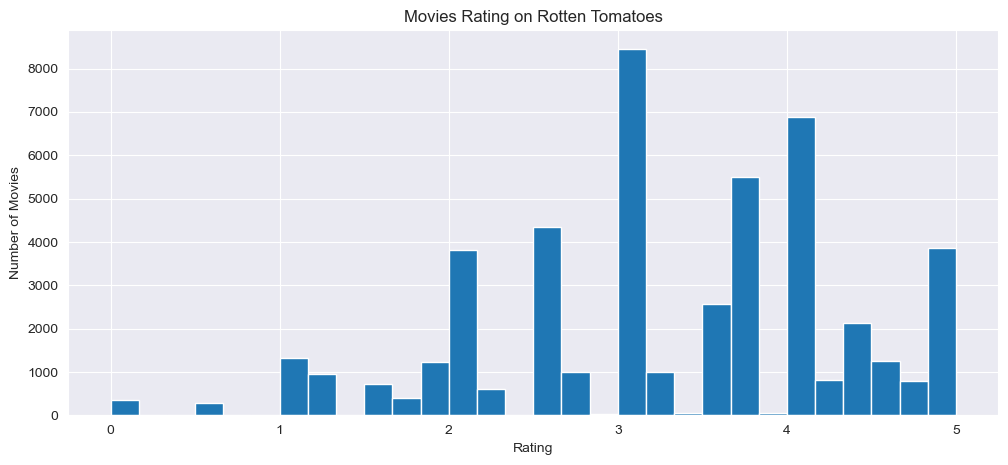

In [487]:
ax = rotten_rev['Updated_Score'].plot(kind='hist', bins=30, title='Movies Rating on Rotten Tomatoes', figsize=(12, 5))
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
plt.show()

Notably, in contrast to the other available ratings, the scores from Rotten Tomatoes are significantly less uniform and show no discernible trend.

In [488]:
rotten_rev['Updated_Score'].describe()

count    48481.000000
mean         3.246231
std          1.076550
min          0.000000
25%          2.500000
50%          3.300000
75%          4.000000
max          5.000000
Name: Updated_Score, dtype: float64

In [489]:
grouped_df = rotten_rev.groupby('movie_title', as_index=False)['Updated_Score'].mean()
grouped_df.sort_values(by='Updated_Score', ascending=False, inplace=True)
grouped_df.head(10)

movie_title  Updated_Score
24775            Tom Thumb       5.000000
12334                    M       4.900000
23715        The Third Man       4.894898
19066     Sunset Boulevard       4.848485
17956  Singin' in the Rain       4.843590
16440          Rear Window       4.817262
19432          Taxi Driver       4.765972
10768        La Dolce Vita       4.747619
1166         All About Eve       4.744048
25807              Vertigo       4.739535

In [490]:
rotten_rev.loc[rotten_rev['movie_title'] == 'Taxi Driver']

id  movie_title    date  minute                       _id  \
24651  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c939a   
24652  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c939b   
24653  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c939c   
24654  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c939d   
24655  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c939e   
24656  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c939f   
24657  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93a0   
24658  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93a1   
24659  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93a2   
24660  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93a3   
24661  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93a4   
24662  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93a5   
24663  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93a6   
24664  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93a7   
24665  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93a8   
24666  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93a9   
24667  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93aa   
24668  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93ab   
24669  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93ac   
24670  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93ad   
24671  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93ae   
24672  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93af   
24673  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93b0   
24674  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93b1   
24675  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93b2   
24676  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93b3   
24677  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93b4   
24678  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93b5   
24679  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93b6   
24680  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93b7   
24681  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93b8   
24682  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93b9   
24683  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93ba   
24684  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93bb   
24685  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93bc   
24686  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93bd   
24687  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93be   
24688  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93bf   
24689  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93c0   
24690  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93c1   
24691  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93c2   
24692  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93c3   
24693  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93c4   
24694  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93c5   
24695  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93c6   
24696  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93c7   
24697  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93c8   
24698  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93c9   
24699  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93ca   
24700  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93cb   
24701  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93cc   
24702  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93cd   
24703  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93ce   
24704  1084648  Taxi Driver  1954.0   133.0  67de8c88c8c9f9b21d2c93cf 

In [491]:
taxi = rotten_rev.loc[rotten_rev['movie_title'] == 'Taxi Driver']
scorsese = taxi['review_content'].tolist()
scorsese = list(filter(lambda x: "Scorsese" in x, scorsese))
scorsese

['Perhaps the most formally ravishing-as well as the most morally and ideologically problematic-film ever directed by Martin Scorsese, the 1976 Taxi Driver remains a disturbing landmark for the kind of voluptuous doublethink it helped ratify.',
 "The thing I'm never sure about is whether Travis is actually psychotic, and Paul Schrader's script, Scorsese's direction, and De Niro's performance don't give us any easy answers.",
 'The symbolism used by Scorsese, the extremely effective acting by Robert DeNiro, and the superb writing by Paul Schrader, turn this movie into a cinematic adventure of many layers.',
 "There have been few films that have created and sustained the sense of constant, underlying dread that pervades every frame of Martin Scorsese's scorching urban masterpiece",
 "Director Martin Scorsese's nightmare vision of Manhattan is important, impulsive work.",
 "The blend of Schrader's script, Scorsese's direction and De Niro's performance is both riveting and unnerving. A fil

Those are the most rated movies at the time for Rotten Tomatoes. It is clear that the dataset contains errors, as many reviews for Taxi Driver (1954) refer to Martin Scorsese's 1976 masterpiece.

Let's now compare the ratings of films that have won at least one Oscar and other titles

In [492]:
oscars = pd.merge(postwar_df, oscars_df, on='movie_title', how='left')
oscars = oscars.loc[((oscars['date'] > 1945) & (oscars['date'] <= 1960) & (oscars['year_film'] >= 1945) & (oscars['year_film'] <= 1961))]
postwar_df.loc[:, 'oscar_winner'] = oscars['winner'] == True

In [493]:
oscar_winners = postwar_df.loc[postwar_df['oscar_winner'] == True]
oscar_winners

id            movie_title    date  \
38     1001356  Rebel Without a Cause  1955.0   
40     1001367          La Dolce Vita  1960.0   
41     1001373              Peter Pan  1953.0   
42     1001432      Wild Strawberries  1957.0   
44     1001452          The Third Man  1949.0   
...        ...                    ...     ...   
26970  1816998  Operation White Tower  1948.0   
27729  1880902      Wings to the Word  1951.0   
27731  1880904       Montované stavby  1950.0   
27732  1880905            The Sorcery  1950.0   
27735  1880908     Paradies auf Erden  1950.0   

                                          tagline  \
38                The bad boy from a good family.   
40     The world’s most talked about movie today!   
41            It will live in your heart forever!   
42                                           None   
44             Hunted by men ... Sought by WOMEN!   
...                                           ...   
26970                                        None   
27729                                        None   
27731                                        None   
27732                                        None   
27735                                        None   

                                             description  minute  rating  \
38     After moving to a new town, troublemaking teen...   111.0    3.83   
40     Journalist and man-about-town Marcello struggl...   176.0    4.28   
41     Leaving the safety of their nursery behind, We...    77.0    3.51   
42     Crotchety retired doctor Isak Borg travels fro...    91.0    4.33   
44     In postwar Vienna, Austria, Holly Martins, a w...   104.0    4.26   
...                                                  ...     ...     ...   
26970  Brad and Barbara Washburn were filmed by Natio...    18.0     NaN   
27729  The Reverend Rodger Perkins, a Presbyterian mi...    30.0     NaN   
27731  Documentary report about the construction of a...    12.0     NaN   
27732  Farmer Kang You's daughter-in-law gave birth t...    40.0     NaN   
27735  One of the first detailed photo reportages abo...    89.0     NaN   

      oscar_winner  
38            True  
40            True  
41            True  
42            True  
44            True  
...            ...  
26970         True  
27729         True  
27731         True  
27732         True  
27735         True  

[392 rows x 8 columns]

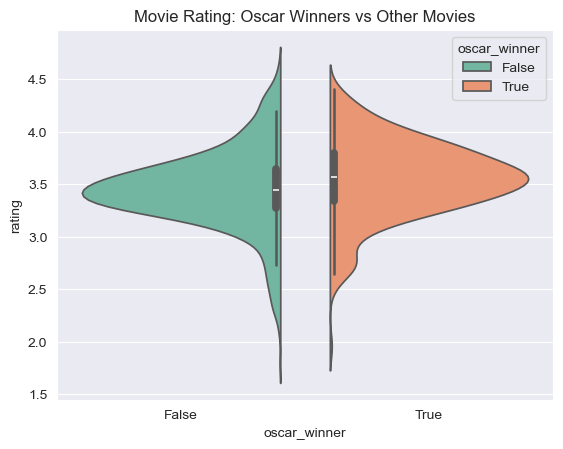

In [494]:
sns.violinplot(x='oscar_winner', y='rating', data=postwar_df, hue='oscar_winner', palette='Set2', split=True)
plt.title('Movie Rating: Oscar Winners vs Other Movies')
plt.show()

Let's see the same analysis with Rotten Tomatoes ratings

In [495]:
oscars_df

_id  year_film  year_ceremony  ceremony  \
0      67de8c8cc8c9f9b21d2ed932       1927           1928         1   
1      67de8c8cc8c9f9b21d2ed933       1927           1928         1   
2      67de8c8cc8c9f9b21d2ed934       1927           1928         1   
3      67de8c8cc8c9f9b21d2ed935       1927           1928         1   
4      67de8c8cc8c9f9b21d2ed936       1927           1928         1   
...                         ...        ...            ...       ...   
10877  67de8c8cc8c9f9b21d2f03af       2023           2024        96   
10878  67de8c8cc8c9f9b21d2f03b0       2023           2024        96   
10879  67de8c8cc8c9f9b21d2f03b1       2023           2024        96   
10880  67de8c8cc8c9f9b21d2f03b2       2023           2024        96   
10881  67de8c8cc8c9f9b21d2f03b3       2023           2024        96   

                               category  \
0                                 ACTOR   
1                                 ACTOR   
2                               ACTRESS   
3                               ACTRESS   
4                               ACTRESS   
...                                 ...   
10877     WRITING (Original Screenplay)   
10878  JEAN HERSHOLT HUMANITARIAN AWARD   
10879                    HONORARY AWARD   
10880                    HONORARY AWARD   
10881                    HONORARY AWARD   

                                                    name       movie_title  \
0                                    Richard Barthelmess         The Noose   
1                                          Emil Jannings  The Last Command   
2                                         Louise Dresser   A Ship Comes In   
3                                           Janet Gaynor        7th Heaven   
4                                         Gloria Swanson    Sadie Thompson   
...                                                  ...               ...   
10877                             Written by Celine Song        Past Lives   
10878                                                NaN               NaN   
10879  To Angela Bassett, who has inspired audiences ...               NaN   
10880  To Mel Brooks, for his comedic brilliance, pro...               NaN   
10881  To Carol Littleton, whose commitment to her cr...               NaN   

       winner  
0       False  
1        True  
2       False  
3        True  
4       False  
...       ...  
10877   False  
10878    True  
10879    True  
10880    True  
10881    True  

[10882 rows x 8 columns]

In [496]:
scoring = review_df[['movie_title', 'Updated_Score']]
oscars = pd.merge(postwar_df, scoring, on='movie_title', how='inner')
oscars

id    movie_title    date  \
0      1000174         Psycho  1960.0   
1      1000174         Psycho  1960.0   
2      1000174         Psycho  1960.0   
3      1000174         Psycho  1960.0   
4      1000174         Psycho  1960.0   
...        ...            ...     ...   
48583  1923414       Festival  1951.0   
48584  1923483  Amateur Night  1946.0   
48585  1923483  Amateur Night  1946.0   
48586  1923483  Amateur Night  1946.0   
48587  1923483  Amateur Night  1946.0   

                                                 tagline  \
0      The master of suspense moves his cameras into ...   
1      The master of suspense moves his cameras into ...   
2      The master of suspense moves his cameras into ...   
3      The master of suspense moves his cameras into ...   
4      The master of suspense moves his cameras into ...   
...                                                  ...   
48583                                               None   
48584                                               None   
48585                                               None   
48586                                               None   
48587                                               None   

                                             description  minute  rating  \
0      When larcenous real estate clerk Marion Crane ...   109.0    4.32   
1      When larcenous real estate clerk Marion Crane ...   109.0    4.32   
2      When larcenous real estate clerk Marion Crane ...   109.0    4.32   
3      When larcenous real estate clerk Marion Crane ...   109.0    4.32   
4      When larcenous real estate clerk Marion Crane ...   109.0    4.32   
...                                                  ...     ...     ...   
48583  Follows a young boy's adventures at the Festiv...    15.0     NaN   
48584  Vaudeville. A fog prevents a group of music-ha...    35.0     NaN   
48585  Vaudeville. A fog prevents a group of music-ha...    35.0     NaN   
48586  Vaudeville. A fog prevents a group of music-ha...    35.0     NaN   
48587  Vaudeville. A fog prevents a group of music-ha...    35.0     NaN   

      oscar_winner  Updated_Score  
0            False          3.750  
1            False          4.375  
2            False          2.500  
3            False          2.500  
4            False          1.000  
...            ...            ...  
48583          NaN          4.000  
48584          NaN          1.700  
48585          NaN          1.875  
48586          NaN          2.300  
48587          NaN          2.000  

[48588 rows x 9 columns]

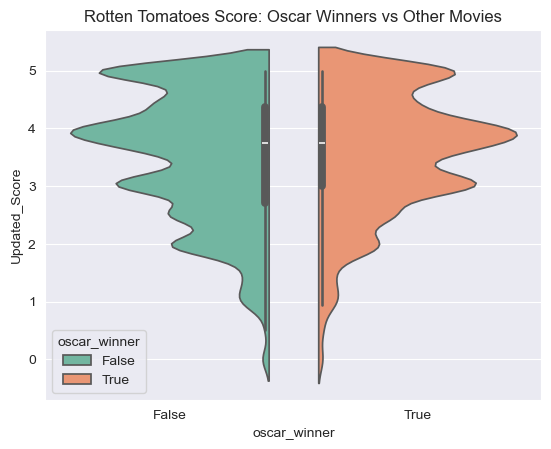

In [497]:
sns.violinplot(x='oscar_winner', y='Updated_Score', data=oscars, hue='oscar_winner', palette='Set2', split=True)
plt.title('Rotten Tomatoes Score: Oscar Winners vs Other Movies')
plt.show()

During this period, there appears to be a subtle difference in overall film ratings between Oscar-winning films and others, with Oscar winners perhaps scoring marginally higher. Additionally, Rotten Tomatoes ratings, in this context, seem to exhibit a slightly wider distribution compared to other rating systems.

### The Italian Neorealism

In [498]:
postwar_countries = pd.merge(postwar_df, countries_df, on='id', how='inner')

The years of Neorealism in Italy are often considered the golden years of Italian cinema. It's a period that not only redefined filmmaking but also powerfully reflected a nation in profound transformation. It's precisely this enduring legacy, this pivotal moment in cinematic history, that leads us to undertake a deeper analysis of the movement.

In [499]:
italian_movies = postwar_countries.loc[postwar_countries['country'] == 'Italy']
italian_movies

id                 movie_title    date  \
5      1940941             Lacrime d'amore  1954.0   
32     1001068             Bicycle Thieves  1948.0   
41     1001362         Eyes Without a Face  1960.0   
43     1001367               La Dolce Vita  1960.0   
70     1002401           Nights of Cabiria  1957.0   
...        ...                         ...     ...   
25863  1892582              La città rossa  1952.0   
25908  1903687  Valeria ragazza poco seria  1958.0   
25930  1903778        L'Incantevole nemica  1953.0   
26015  1923308    Cyril (una cosa urgente)  1960.0   
26081  1923390     Le notti del melodramma  1954.0   

                                                 tagline  \
5                                                   None   
32                The Prize Picture They Want to Censor!   
41     Beautiful women were the victims of his FIENDI...   
43            The world’s most talked about movie today!   
70     The story of a betrayed but unquenchable littl...   
...                                                  ...   
25863                                               None   
25908                                               None   
25930                                               None   
26015                                               None   
26081                                               None   

                                             description  minute  rating  \
5                                                   None   107.0     NaN   
32     Antonio, an unemployed man in the depressed po...    89.0    4.31   
41     Dr. Génessier is riddled with guilt after an a...    84.0    3.93   
43     Journalist and man-about-town Marcello struggl...   176.0    4.28   
70     Rome, 1957. A woman, Cabiria, is robbed and le...   110.0    4.37   
...                                                  ...     ...     ...   
25863  Filming of the exhibition celebrating the hist...    40.0     NaN   
25908  Two young men love the same girl and decide to...    84.0     NaN   
25930                                               None    89.0     NaN   
26015  Lost film. "I have absolutely no memory of wha...    20.0     NaN   
26081                                               None    23.0     NaN   

      oscar_winner country  country_id  
5              NaN   Italy      692801  
32           False   Italy        1515  
41           False   Italy        1969  
43            True   Italy        1976  
70            True   Italy        3581  
...            ...     ...         ...  
25863          NaN   Italy      674482  
25908          NaN   Italy      678685  
25930          NaN   Italy      678725  
26015          NaN   Italy      686150  
26081          NaN   Italy      686219  

[1346 rows x 10 columns]

There are co-productions with France in the DataFrame. Removing them would mean removing very important Italian films (e.g. "La Dolce Vita"), which is why we keep them

Neorealist Cinema in Italy represents a cross-section of the country after the war, showing stories of everyday life and ordinary people. So, let's take a look at the most produced genres

In [500]:
italian_gen = pd.merge(italian_movies, genres_df, on='id', how='inner')

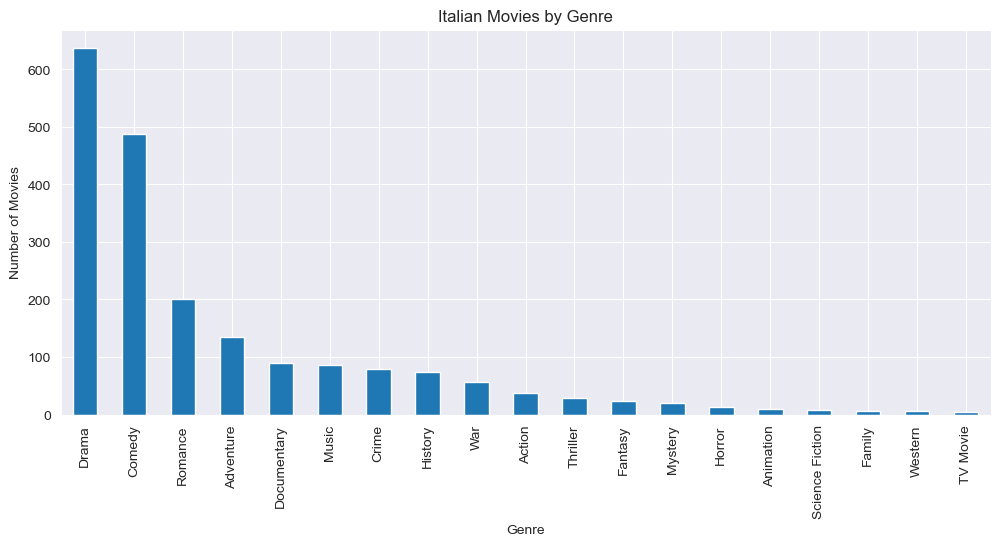

In [501]:
ax = italian_gen['genre'].value_counts() \
    .plot(kind='bar', title='Italian Movies by Genre', figsize=(12, 5))
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Movies')
plt.show()

The most popular genre is in fact Drama, but many films on the Comedy genre stand out. In these years, in fact, the genre of "Commedia all'italiana" originated, a genre that achieved great success both in Italy and abroad.

In [502]:
drama = italian_gen[italian_gen['genre'] == 'Drama']
drama

id          movie_title    date  \
2     1001068      Bicycle Thieves  1948.0   
3     1001362  Eyes Without a Face  1960.0   
6     1001367        La Dolce Vita  1960.0   
8     1002401    Nights of Cabiria  1957.0   
9     1002435          L'Avventura  1960.0   
...       ...                  ...     ...   
1987  1817002                Furia  1947.0   
1991  1839226     Ultima illusione  1955.0   
1994  1839262     L'amore di Norma  1951.0   
1996  1870645            El hereje  1958.0   
1998  1880785  Orizzonte infuocato  1957.0   

                                                tagline  \
2                The Prize Picture They Want to Censor!   
3     Beautiful women were the victims of his FIENDI...   
6            The world’s most talked about movie today!   
8     The story of a betrayed but unquenchable littl...   
9                      A new adventure in filmmaking...   
...                                                 ...   
1987                      The frankest story ever told!   
1991                                               None   
1994                                               None   
1996                                               None   
1998                                               None   

                                            description  minute  rating  \
2     Antonio, an unemployed man in the depressed po...    89.0    4.31   
3     Dr. Génessier is riddled with guilt after an a...    84.0    3.93   
6     Journalist and man-about-town Marcello struggl...   176.0    4.28   
8     Rome, 1957. A woman, Cabiria, is robbed and le...   110.0    4.37   
9     Claudia and Anna join Anna's lover, Sandro, on...   144.0    4.08   
...                                                 ...     ...     ...   
1987  Melodrama of sexual cravings: The bored wife o...    94.0     NaN   
1991  Retired social worker "Petrucci" goes to live ...    91.0     NaN   
1994                                               None    89.0     NaN   
1996       Spanish film with a score by Joaquín Rodrigo    89.0     NaN   
1998  Because of a drunken father, Manuela is threat...    86.0     NaN   

     oscar_winner country  country_id  genre  genre_id  
2           False   Italy        1515  Drama      2854  
3           False   Italy        1969  Drama      3658  
6            True   Italy        1976  Drama      3668  
8            True   Italy        3581  Drama      6305  
9           False   Italy        3627  Drama      6389  
...           ...     ...         ...    ...       ...  
1987          NaN   Italy      637811  Drama    973977  
1991          NaN   Italy      649031  Drama    989791  
1994          NaN   Italy      649065  Drama    989825  
1996          NaN   Italy      663928  Drama   1010433  
1998          NaN   Italy      669058  Drama   1017047  

[637 rows x 12 columns]

In [503]:
comedy = italian_gen.loc[italian_gen['genre'] == 'Comedy']
comedy

id                 movie_title    date  \
0     1940941             Lacrime d'amore  1954.0   
7     1001367               La Dolce Vita  1960.0   
18    1003449                   Mon Oncle  1958.0   
29    1004723                 I Vitelloni  1953.0   
41    1007590  Big Deal on Madonna Street  1958.0   
...       ...                         ...     ...   
1992  1839226            Ultima illusione  1955.0   
1995  1865210           Finalmente libero  1953.0   
1997  1870775    Io sono la Primula Rossa  1954.0   
2000  1903687  Valeria ragazza poco seria  1958.0   
2001  1903778        L'Incantevole nemica  1953.0   

                                                tagline  \
0                                                  None   
7            The world’s most talked about movie today!   
18    Mr Hulot takes a precious, playful ... and pur...   
29    We are the hollow men in this last of meeting ...   
41    The Story of a Perfect Crime ... Perfectly Hil...   
...                                                 ...   
1992                                               None   
1995                                               None   
1997                                               None   
2000                                               None   
2001                                               None   

                                            description  minute  rating  \
0                                                  None   107.0     NaN   
7     Journalist and man-about-town Marcello struggl...   176.0    4.28   
18    Genial, bumbling Monsieur Hulot loves his top-...   118.0    4.03   
29    Five young men dream of success as they drift ...   103.0    3.96   
41    Best friends Peppe and Mario are thieves, but ...   106.0    3.98   
...                                                 ...     ...     ...   
1992  Retired social worker "Petrucci" goes to live ...    91.0     NaN   
1995  Enrico Rossi is accused of polygamy for having...    90.0     NaN   
1997                          Comedy with Renato Rascel    90.0     NaN   
2000  Two young men love the same girl and decide to...    84.0     NaN   
2001                                               None    89.0     NaN   

     oscar_winner country  country_id   genre  genre_id  
0             NaN   Italy      692801  Comedy   1046474  
7            True   Italy        1976  Comedy      3669  
18           True   Italy        5153  Comedy      8911  
29           True   Italy        7154  Comedy     12108  
41          False   Italy       11388  Comedy     19154  
...           ...     ...         ...     ...       ...  
1992          NaN   Italy      649031  Comedy    989792  
1995          NaN   Italy      661518  Comedy   1007140  
1997          NaN   Italy      664026  Comedy   1010512  
2000          NaN   Italy      678685  Comedy   1030097  
2001          NaN   Italy      678725  Comedy   1030138  

[488 rows x 12 columns]

Let's remove some foreign productions co-produced by Italy to have a cleaner list

In [504]:
drama = drama[~(drama['movie_title'] == 'The Wages of Fear')]
drama = drama[~(drama['movie_title'] == 'The Earrings of Madame de...')]
drama = drama[~(drama['movie_title'] == 'Purple Noon')]
drama = drama[~(drama['movie_title'] == 'The Truth')]
drama = drama[~(drama['movie_title'] == 'Eyes Without a Face')]
drama = drama[~(drama['movie_title'] == 'French Cancan')]
drama = drama[~(drama['movie_title'] == 'Death of a Cyclist')]
drama = drama[~(drama['movie_title'] == 'Black Orpheus')]
drama = drama[~(drama['movie_title'] == 'Othello')]

In [505]:
comedy = comedy[~(comedy['movie_title'] == 'Mon Oncle')]
comedy = comedy[~(comedy['movie_title'] == 'French Cancan')]
comedy = comedy[~(comedy['movie_title'] == 'The Little World of Don Camillo')]
comedy = comedy[~(comedy['movie_title'] == 'The Golden Coach')]
comedy = comedy[~(comedy['movie_title'] == 'The Trip Across Paris')]
comedy = comedy[~(comedy['movie_title'] == 'The Gates of Paris')]
comedy = comedy[~(comedy['movie_title'] == 'The Return of Don Camillo')]
comedy = comedy[~(comedy['movie_title'] == 'The Cow and I')]
comedy = comedy[~(comedy['movie_title'] == 'Beauties of the Night')]
comedy = comedy[~(comedy['movie_title'] == 'Love and Larceny')]
comedy = comedy[~(comedy['movie_title'] == 'Fan-Fan the Tulip')]
comedy = comedy[~(comedy['movie_title'] == 'The Grand Manoeuvre')]
comedy = comedy[~(comedy['movie_title'] == 'Royal Affairs in Versailles')]
comedy = comedy[~(comedy['movie_title'] == 'What a Woman!')]
comedy = comedy[~(comedy['movie_title'] == 'The Magnificent Tramp')]
comedy = comedy[~(comedy['movie_title'] == 'Come Dance with Me!')]
comedy = comedy[~(comedy['movie_title'] == 'Elena and Her Men')]
comedy = comedy[~(comedy['movie_title'] == 'La Parisienne')]
comedy = comedy[~(comedy['movie_title'] == 'A Breath of Scandal')]
comedy = comedy[~(comedy['movie_title'] == 'Utopia')]

Let's take a look at the top 10 "Drama" movies most rated.

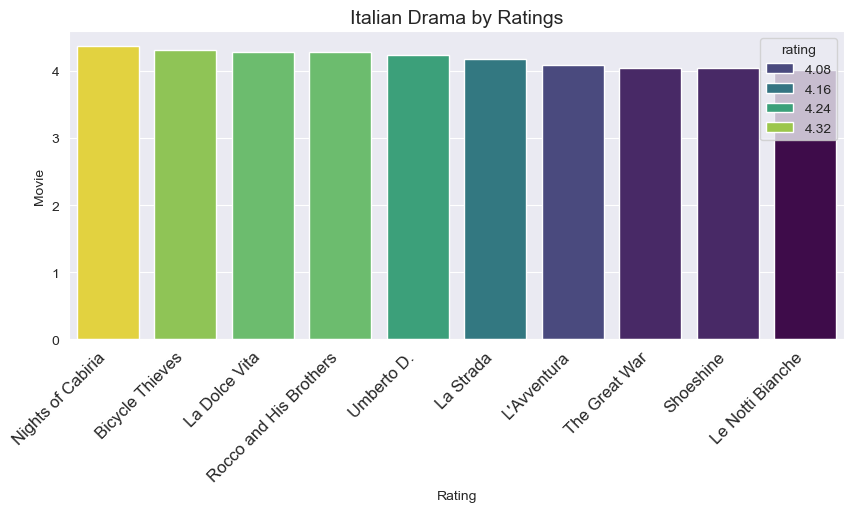

In [506]:
drama = drama.sort_values(by='rating', ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x='movie_title', y='rating', data=drama.head(10), hue='rating', palette='viridis')
plt.title('Italian Drama by Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

Let's take a look at the top 10 "Comedy" movies most rated

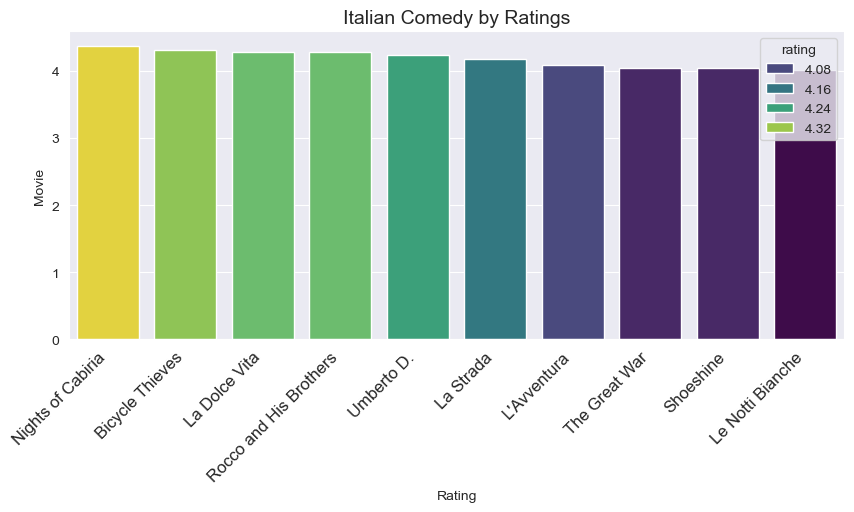

In [507]:
comedy = comedy.sort_values(by='rating', ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x='movie_title', y='rating', data=drama.head(10), hue='rating', palette='viridis')
plt.title('Italian Comedy by Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

Some of the titles appear in both Drama and Comedy. This is because the "Commedia all'italiana" is a very bitter genre of comedy, and is often classified as both a comedy and a dramatic film.

Let's see some of the italian directors of the period

In [508]:
directors = crews_df.loc[crews_df['role'] == 'Director']

In [509]:
italian_dir = pd.merge(italian_movies, directors, on='id', how='left')
italian_dir.drop('role', axis=1, inplace=True)
italian_dir.rename(columns={'name': 'director'}, inplace=True)
italian_dir

id                 movie_title    date  \
0     1940941             Lacrime d'amore  1954.0   
1     1001068             Bicycle Thieves  1948.0   
2     1001362         Eyes Without a Face  1960.0   
3     1001367               La Dolce Vita  1960.0   
4     1002401           Nights of Cabiria  1957.0   
...       ...                         ...     ...   
1473  1892582              La città rossa  1952.0   
1474  1903687  Valeria ragazza poco seria  1958.0   
1475  1903778        L'Incantevole nemica  1953.0   
1476  1923308    Cyril (una cosa urgente)  1960.0   
1477  1923390     Le notti del melodramma  1954.0   

                                                tagline  \
0                                                  None   
1                The Prize Picture They Want to Censor!   
2     Beautiful women were the victims of his FIENDI...   
3            The world’s most talked about movie today!   
4     The story of a betrayed but unquenchable littl...   
...                                                 ...   
1473                                               None   
1474                                               None   
1475                                               None   
1476                                               None   
1477                                               None   

                                            description  minute  rating  \
0                                                  None   107.0     NaN   
1     Antonio, an unemployed man in the depressed po...    89.0    4.31   
2     Dr. Génessier is riddled with guilt after an a...    84.0    3.93   
3     Journalist and man-about-town Marcello struggl...   176.0    4.28   
4     Rome, 1957. A woman, Cabiria, is robbed and le...   110.0    4.37   
...                                                 ...     ...     ...   
1473  Filming of the exhibition celebrating the hist...    40.0     NaN   
1474  Two young men love the same girl and decide to...    84.0     NaN   
1475                                               None    89.0     NaN   
1476  Lost film. "I have absolutely no memory of wha...    20.0     NaN   
1477                                               None    23.0     NaN   

     oscar_winner country  country_id          director    crew_id  
0             NaN   Italy      692801     Pino Mercanti  4717292.0  
1           False   Italy        1515  Vittorio De Sica    74904.0  
2           False   Italy        1969    Georges Franju    91932.0  
3            True   Italy        1976  Federico Fellini    92152.0  
4            True   Italy        3581  Federico Fellini   143050.0  
...           ...     ...         ...               ...        ...  
1473          NaN   Italy      674482    Enzo Marzadori  4633692.0  
1474          NaN   Italy      678685   Guido Malatesta  4654433.0  
1475          NaN   Italy      678725               NaN        NaN  
1476          NaN   Italy      686150     Alberto Grifi  4686764.0  
1477          NaN   Italy      686219       Renzo Renzi  4686904.0  

[1478 rows x 12 columns]

Let's remove some foreign directors with co-produced movies to have a cleaner list.

In [510]:
italian_dir = italian_dir[~(italian_dir['director'] == 'Jean Delannoy')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Christian-Jaque')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Claude Autant-Lara')]
italian_dir = italian_dir[~(italian_dir['director'] == 'André Cayatte')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Henri Verneuil')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Julien Duvivier')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Viktor Tourjansky')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Henri-Georges Clouzot')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Max Ophüls')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Jacques Tati')]
italian_dir = italian_dir[~(italian_dir['director'] == 'René Clément')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Georges Franju')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Jean Renoir')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Jacques Becker')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Juan Antonio Bardem')]

Let's see the directors with the most films made.

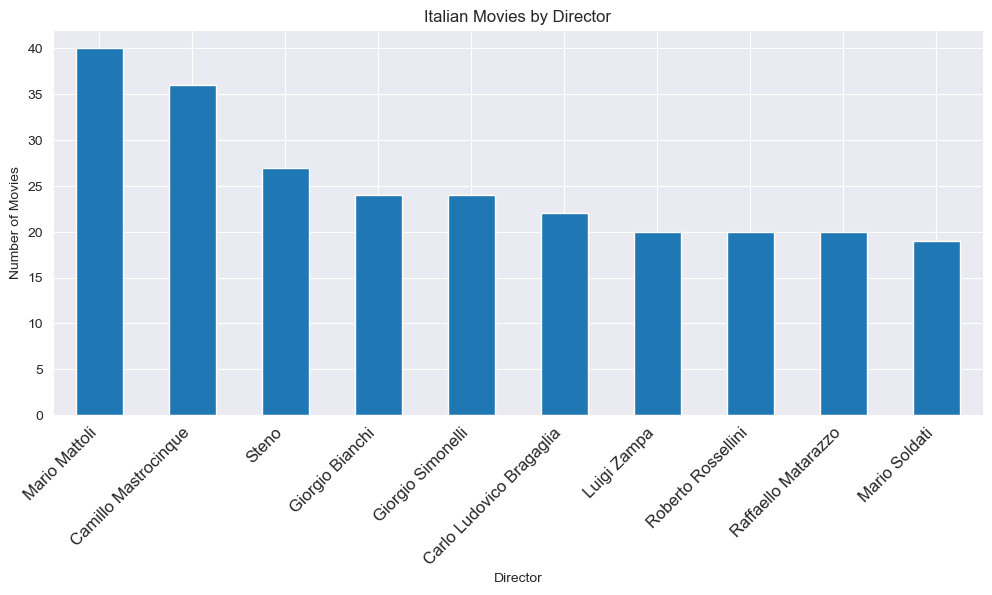

In [511]:
ax = italian_dir['director'].value_counts().head(10) \
    .plot(kind='bar', title='Italian Movies by Director', figsize=(12, 5))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()

Let's see the directors of the 10 most appreciated films of the period

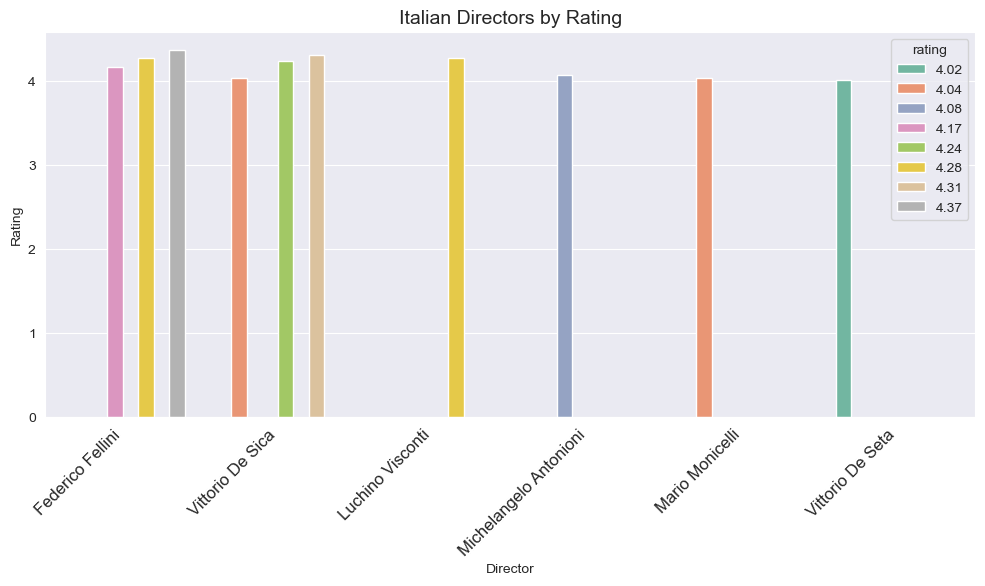

In [512]:
italian_dir = italian_dir.sort_values(by='rating', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='director', y='rating', data=italian_dir.head(10), hue='rating', palette='Set2')
plt.title('Italian Directors by Rating', fontsize=14)
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

From the graph, we can see the names of the most influential and successful directors of that era, not only in Italy but arguably on a global level as well.


Let's check if those movies won an Oscar.

In [513]:
top_italian_movies = italian_dir.head(10)
top_italian_movies

id             movie_title    date  \
4   1002401       Nights of Cabiria  1957.0   
1   1001068         Bicycle Thieves  1948.0   
3   1001367           La Dolce Vita  1960.0   
12  1003825  Rocco and His Brothers  1960.0   
10  1003675              Umberto D.  1952.0   
6   1002570               La Strada  1954.0   
5   1002435             L'Avventura  1960.0   
49  1015896           The Great War  1959.0   
29  1008712               Shoeshine  1946.0   
52  1016405         Islands of Fire  1955.0   

                                              tagline  \
4   The story of a betrayed but unquenchable littl...   
1              The Prize Picture They Want to Censor!   
3          The world’s most talked about movie today!   
12  DARING in its realism. STUNNING in its impact....   
10                                               None   
6                Filmed in Italy - where it happened!   
5                    A new adventure in filmmaking...   
49                                               None   
29                                               None   
52                                               None   

                                          description  minute  rating  \
4   Rome, 1957. A woman, Cabiria, is robbed and le...   110.0    4.37   
1   Antonio, an unemployed man in the depressed po...    89.0    4.31   
3   Journalist and man-about-town Marcello struggl...   176.0    4.28   
12  When a widow’s family moves to the big city, t...   178.0    4.28   
10  When elderly pensioner Umberto Domenico Ferrar...    91.0    4.24   
6   When Gelsomina, a naïve young woman, is purcha...   115.0    4.17   
5   Claudia and Anna join Anna's lover, Sandro, on...   144.0    4.08   
49  Italy, 1916. Oreste Jacovacci and Giovanni Bus...   130.0    4.04   
29  At a track near Rome, shoeshine boys are watch...    87.0    4.04   
52  The first light of dawn. The sound of a boat a...     9.0    4.02   

   oscar_winner country  country_id                director   crew_id  
4          True   Italy        3581        Federico Fellini  143050.0  
1         False   Italy        1515        Vittorio De Sica   74904.0  
3          True   Italy        1976        Federico Fellini   92152.0  
12        False   Italy        5764        Luchino Visconti  203419.0  
10        False   Italy        5511        Vittorio De Sica  198084.0  
6         False   Italy        3822        Federico Fellini  150511.0  
5         False   Italy        3627  Michelangelo Antonioni  144986.0  
49          NaN   Italy       23181         Mario Monicelli  521535.0  
29        False   Italy       13051        Vittorio De Sica  359673.0  
52        False   Italy       23912        Vittorio De Seta  532262.0

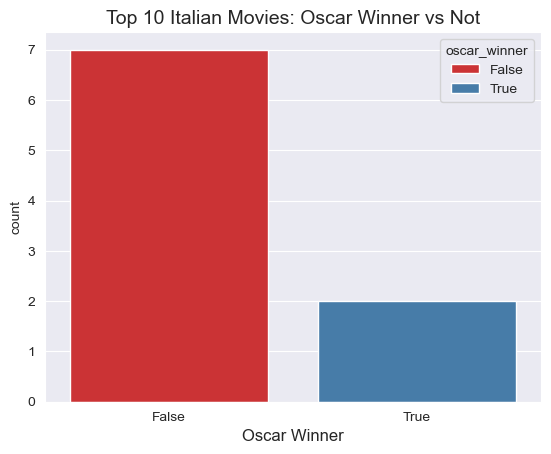

<Figure size 1200x800 with 0 Axes>

In [514]:
sns.countplot(x='oscar_winner', data=top_italian_movies, hue='oscar_winner', palette='Set1')

plt.title('Top 10 Italian Movies: Oscar Winner vs Not', fontsize=14)
plt.xlabel('Oscar Winner', fontsize=12)
plt.figure(figsize=(12, 8))
plt.show()

This highlights that despite their high ratings and immense appreciation within Italy, these acclaimed films haven't translated their success as significantly into Oscar wins, suggesting a potential disconnect between domestic critical and popular reception, and international academy recognition.

Let's see the italian movies with more Oscars.

In [515]:
italian_movies

id                 movie_title    date  \
5      1940941             Lacrime d'amore  1954.0   
32     1001068             Bicycle Thieves  1948.0   
41     1001362         Eyes Without a Face  1960.0   
43     1001367               La Dolce Vita  1960.0   
70     1002401           Nights of Cabiria  1957.0   
...        ...                         ...     ...   
25863  1892582              La città rossa  1952.0   
25908  1903687  Valeria ragazza poco seria  1958.0   
25930  1903778        L'Incantevole nemica  1953.0   
26015  1923308    Cyril (una cosa urgente)  1960.0   
26081  1923390     Le notti del melodramma  1954.0   

                                                 tagline  \
5                                                   None   
32                The Prize Picture They Want to Censor!   
41     Beautiful women were the victims of his FIENDI...   
43            The world’s most talked about movie today!   
70     The story of a betrayed but unquenchable littl...   
...                                                  ...   
25863                                               None   
25908                                               None   
25930                                               None   
26015                                               None   
26081                                               None   

                                             description  minute  rating  \
5                                                   None   107.0     NaN   
32     Antonio, an unemployed man in the depressed po...    89.0    4.31   
41     Dr. Génessier is riddled with guilt after an a...    84.0    3.93   
43     Journalist and man-about-town Marcello struggl...   176.0    4.28   
70     Rome, 1957. A woman, Cabiria, is robbed and le...   110.0    4.37   
...                                                  ...     ...     ...   
25863  Filming of the exhibition celebrating the hist...    40.0     NaN   
25908  Two young men love the same girl and decide to...    84.0     NaN   
25930                                               None    89.0     NaN   
26015  Lost film. "I have absolutely no memory of wha...    20.0     NaN   
26081                                               None    23.0     NaN   

      oscar_winner country  country_id  
5              NaN   Italy      692801  
32           False   Italy        1515  
41           False   Italy        1969  
43            True   Italy        1976  
70            True   Italy        3581  
...            ...     ...         ...  
25863          NaN   Italy      674482  
25908          NaN   Italy      678685  
25930          NaN   Italy      678725  
26015          NaN   Italy      686150  
26081          NaN   Italy      686219  

[1346 rows x 10 columns]

In [516]:
italian_oscars = pd.merge(italian_movies, oscars_df, on=['movie_title'], how='inner')
italian_oscars = italian_oscars.loc[((italian_oscars['date'] > 1945) & (italian_oscars['date'] <= 1960) & (italian_oscars['year_film'] >= 1945) & (italian_oscars['year_film'] <= 1961))]
italian_oscars.head(10)

id                   movie_title    date  \
0  1001367                 La Dolce Vita  1960.0   
1  1001367                 La Dolce Vita  1960.0   
2  1001367                 La Dolce Vita  1960.0   
3  1001367                 La Dolce Vita  1960.0   
4  1002570                     La Strada  1954.0   
5  1002570                     La Strada  1954.0   
6  1003675                    Umberto D.  1952.0   
7  1004275                 Black Orpheus  1959.0   
8  1004765  The Earrings of Madame de...  1953.0   
9  1005366                        Paisan  1946.0   

                                             tagline  \
0         The world’s most talked about movie today!   
1         The world’s most talked about movie today!   
2         The world’s most talked about movie today!   
3         The world’s most talked about movie today!   
4               Filmed in Italy - where it happened!   
5               Filmed in Italy - where it happened!   
6                                               None   
7  The film that introduced Bossa Nova to the wor...   
8              It was her vanity that destroyed her.   
9                                               None   

                                         description  minute  rating  \
0  Journalist and man-about-town Marcello struggl...   176.0    4.28   
1  Journalist and man-about-town Marcello struggl...   176.0    4.28   
2  Journalist and man-about-town Marcello struggl...   176.0    4.28   
3  Journalist and man-about-town Marcello struggl...   176.0    4.28   
4  When Gelsomina, a naïve young woman, is purcha...   115.0    4.17   
5  When Gelsomina, a naïve young woman, is purcha...   115.0    4.17   
6  When elderly pensioner Umberto Domenico Ferrar...    91.0    4.24   
7  Young lovers Orfeu and Eurydice run through th...   100.0    3.82   
8  In France of the late 19th century, the wife o...   105.0    4.06   
9  Six vignettes follow the Allied invasion from ...   125.0    3.91   

  oscar_winner country  country_id                       _id  year_film  \
0         True   Italy        1976  67de8c8cc8c9f9b21d2ee7cc       1961   
1         True   Italy        1976  67de8c8cc8c9f9b21d2ee7df       1961   
2         True   Italy        1976  67de8c8cc8c9f9b21d2ee7e9       1961   
3         True   Italy        1976  67de8c8cc8c9f9b21d2ee828       1961   
4        False   Italy        3822  67de8c8cc8c9f9b21d2ee5b7       1956   
5        False   Italy        3822  67de8c8cc8c9f9b21d2ee5ea       1956   
6        False   Italy        5511  67de8c8cc8c9f9b21d2ee5e2       1956   
7         True   Italy        6459  67de8c8cc8c9f9b21d2ee704       1959   
8         True   Italy        7217  67de8c8cc8c9f9b21d2ee49f       1954   
9        False   Italy        8142  67de8c8cc8c9f9b21d2ee287       1949   

   year_ceremony  ceremony                                           category  \
0           1962        34                    ART DIRECTION (Black-and-White)   
1           1962        34                   COSTUME DESIGN (Black-and-White)   
2           1962        34                                          DIRECTING   
3           1962        34  WRITING (Story and Screenplay--written directl...   
4           1957        29                              FOREIGN LANGUAGE FILM   
5           1957        29                     WRITING (Screenplay--Original)   
6           1957        29                     WRITING (Motion Picture Story)   
7           1960        32                              FOREIGN LANGUAGE FILM   
8           1955        27                   COSTUME DESIGN (Black-and-White)   
9           1950        22                     WRITING (Story and Screenplay)   

                                                name  winner  
0                                     Piero Gherardi   False  
1                                     Piero Gherardi    True  
2                                   Federico Fellini   False  
3  Federico Fellini, Tullio Pinelli, Ennio Flaian...   

In [517]:
italian_oscars = italian_oscars.loc[italian_oscars['winner'] == True]
sorted_values = italian_oscars['movie_title'].value_counts().sort_values(ascending=False)
sorted_values

movie_title
The Apartment            5
La Dolce Vita            1
La Strada                1
Black Orpheus            1
Two Women                1
The Barefoot Contessa    1
Giuseppina               1
Name: count, dtype: int64

Let's remove the foreign co-production

In [518]:
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'Black Orpheus')]
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'The Barefoot Contessa')]
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'Dangerous Liaisons')]
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'Les Misérables')]
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'The Apartment')]
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'Rebecca')]

In [519]:
italian_oscars.head(10)

id    movie_title    date  \
1   1001367  La Dolce Vita  1960.0   
4   1002570      La Strada  1954.0   
14  1008640      Two Women  1960.0   
64  1098250     Giuseppina  1960.0   

                                              tagline  \
1          The world’s most talked about movie today!   
4                Filmed in Italy - where it happened!   
14  Suddenly, Love Becomes Lust… Innocence becomes...   
64                                               None   

                                          description  minute  rating  \
1   Journalist and man-about-town Marcello struggl...   176.0    4.28   
4   When Gelsomina, a naïve young woman, is purcha...   115.0    4.17   
14  Widowed shopkeeper Cesira and her 13-year-old ...   100.0    3.87   
64  Oscar winning short in which a young girl obse...    32.0     NaN   

   oscar_winner country  country_id                       _id  year_film  \
1          True   Italy        1976  67de8c8cc8c9f9b21d2ee7df       1961   
4         False   Italy        3822  67de8c8cc8c9f9b21d2ee5b7       1956   
14          NaN   Italy       12942  67de8c8cc8c9f9b21d2ee7c0       1961   
64          NaN   Italy      122144  67de8c8cc8c9f9b21d2ee776       1960   

    year_ceremony  ceremony                          category  \
1            1962        34  COSTUME DESIGN (Black-and-White)   
4            1957        29             FOREIGN LANGUAGE FILM   
14           1962        34                           ACTRESS   
64           1961        33       DOCUMENTARY (Short Subject)   

                                                 name  winner  
1                                      Piero Gherardi    True  
4   Italy; Dino De Laurentiis and Carlo Ponti, Pro...    True  
14                                       Sophia Loren    True  
64                               James Hill, Producer    True

In [520]:
italian_dir.loc[italian_dir['movie_title'] == 'Romeo and Juliet']

id       movie_title    date tagline  \
186  1054757  Romeo and Juliet  1954.0    None   

                                           description  minute  rating  \
186  In Shakespeare's classic play, the Montagues a...   141.0     3.2   

    oscar_winner country  country_id           director    crew_id  
186          NaN   Italy       72641  Renato Castellani  1069403.0

Let's see a comparison of appreciation between Italian films (or Italian co-productions) and the rest of the films

In [521]:
italians = pd.merge(postwar_df, countries_df, on='id', how='left')
postwar_df.loc[:, 'ita'] = italians['country'] == 'Italy'
postwar_df

id                  movie_title    date tagline  \
0      1940934             Popeye's Travels  1960.0    None   
1      1940935                 Tiger Burger  1960.0    None   
2      1940937             Scherzo wiosenne  1960.0    None   
3      1940938               Belo Horizonte  1958.0    None   
4      1940939            The Phoenix Tower  1957.0    None   
...        ...                          ...     ...     ...   
28266  1937356              Wife Tames Wolf  1947.0    None   
28267  1937358            La Ceinture Dorée  1947.0    None   
28268  1937359            After Sixty Years  1946.0    None   
28269  1937360  Des hommes comme les autres  1946.0    None   
28270  1360716         Virgin Soil Upturned  1959.0    None   

                                             description  minute  rating  \
0      Popeye's journey in this short is based upon t...     7.0     NaN   
1      Popeye and Wimpy are in India where the native...     5.0     NaN   
2                           a Krzysztof Debowski cartoon     7.0     NaN   
3      A panel of the capital of Minas Gerais at the ...    18.0     NaN   
4      A short documentary charting the construction ...    39.0     NaN   
...                                                  ...     ...     ...   
28266  Caught philandering (for the 1867th time, give...    17.0     NaN   
28267  La Ceinture Dorée is an institutional document...    16.0     NaN   
28268  The Johannesburg City Council presents “After ...    29.0     NaN   
28269  Presents the work of the provincial insitution...    26.0     NaN   
28270  The movie is based on the the same name novel ...   278.0     NaN   

      oscar_winner    ita  
0              NaN  False  
1              NaN  False  
2              NaN  False  
3              NaN  False  
4              NaN  False  
...            ...    ...  
28266          NaN  False  
28267          NaN  False  
28268          NaN  False  
28269          NaN  False  
28270          NaN  False  

[28271 rows x 9 columns]

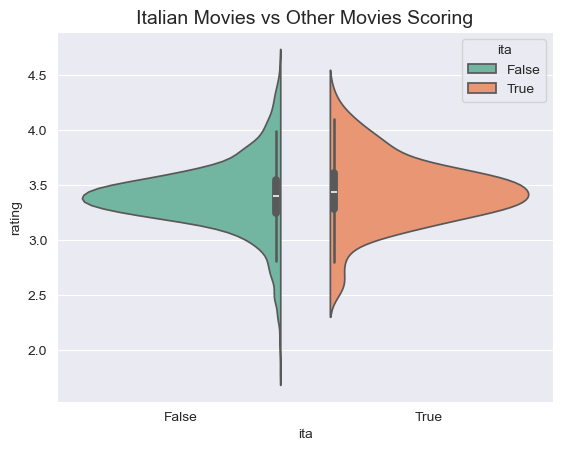

In [522]:
sns.violinplot(x='ita', y='rating', data=postwar_df, hue='ita', palette='Set2', split=True)
plt.title('Italian Movies vs Other Movies Scoring', fontsize=14)
plt.show()

In [523]:
italians = pd.merge(postwar_df, countries_df, on='id', how='left')
it = pd.merge(italians, review_df, on='movie_title', how='left')
postwar_df.loc[:, 'ita'] = it['country'] == 'Italy'
postwar_df

id                  movie_title    date tagline  \
0      1940934             Popeye's Travels  1960.0    None   
1      1940935                 Tiger Burger  1960.0    None   
2      1940937             Scherzo wiosenne  1960.0    None   
3      1940938               Belo Horizonte  1958.0    None   
4      1940939            The Phoenix Tower  1957.0    None   
...        ...                          ...     ...     ...   
28266  1937356              Wife Tames Wolf  1947.0    None   
28267  1937358            La Ceinture Dorée  1947.0    None   
28268  1937359            After Sixty Years  1946.0    None   
28269  1937360  Des hommes comme les autres  1946.0    None   
28270  1360716         Virgin Soil Upturned  1959.0    None   

                                             description  minute  rating  \
0      Popeye's journey in this short is based upon t...     7.0     NaN   
1      Popeye and Wimpy are in India where the native...     5.0     NaN   
2                           a Krzysztof Debowski cartoon     7.0     NaN   
3      A panel of the capital of Minas Gerais at the ...    18.0     NaN   
4      A short documentary charting the construction ...    39.0     NaN   
...                                                  ...     ...     ...   
28266  Caught philandering (for the 1867th time, give...    17.0     NaN   
28267  La Ceinture Dorée is an institutional document...    16.0     NaN   
28268  The Johannesburg City Council presents “After ...    29.0     NaN   
28269  Presents the work of the provincial insitution...    26.0     NaN   
28270  The movie is based on the the same name novel ...   278.0     NaN   

      oscar_winner    ita  
0              NaN  False  
1              NaN  False  
2              NaN  False  
3              NaN  False  
4              NaN  False  
...            ...    ...  
28266          NaN  False  
28267          NaN  False  
28268          NaN  False  
28269          NaN  False  
28270          NaN  False  

[28271 rows x 9 columns]

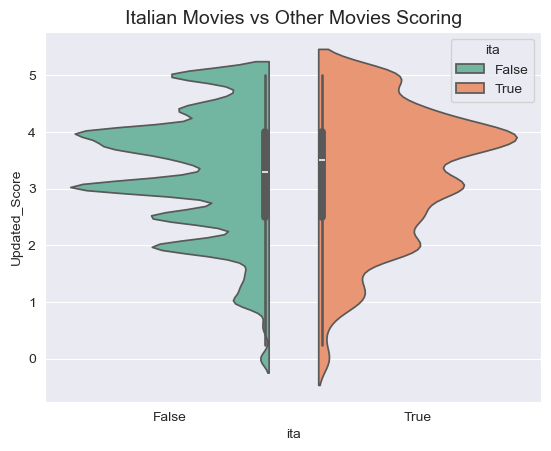

In [524]:
sns.violinplot(x='ita', y='Updated_Score', data=it, hue='ita', palette='Set2', split=True)
plt.title('Italian Movies vs Other Movies Scoring', fontsize=14)
plt.show()

The graph shows that the evaluation for Italian films of the time is very positive, supporting how important this Italian period was for Cinema.

Let's see a geographic map

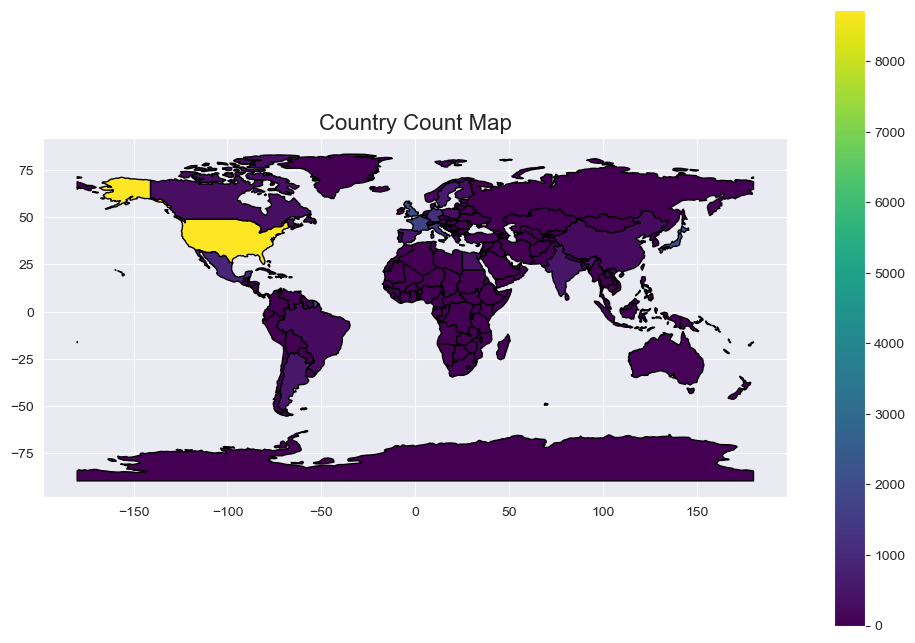

In [525]:
# Aggregate the count of occurrences for each country
country_counts = postwar_countries['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

world_data = countries_gdf.merge(country_counts, left_on='ADMIN', right_on='country', how='left')
world_data['count'] = world_data['count'].fillna(0)
#world_data_gdf = countries_gdf.merge(world_data_df, left_on='ADMIN', right_on='Country/Region', how='left')

# Plot the map with a color gradient based on the 'count' column
world_data.plot(column='count', cmap='viridis', legend=True, figsize=(12, 8), edgecolor='black')

# Add a title and display the map
plt.title('Country Count Map', fontsize=16)
plt.show()

While the United States firmly maintains its top position in production, and European nations like Italy, France, Spain, and the UK follow behind, Japan finally bursts onto the international stage. Its rise would mark a turning point, leading it to carve out an ever-growing market share in the years ahead.

## Modern Cinema (1960-1990)

The period of Modern Cinema, spanning from 1960 to 1990, represents a seismic shift in the cinematic landscape, moving away from the classical Hollywood studio system towards a more director-driven and often socially conscious approach. This era witnessed the rise of auteur theory, empowering filmmakers with greater artistic freedom, and brought forth influential movements like the French New Wave, New Hollywood, and New German Cinema. Films of this period frequently explored complex psychological themes, challenged traditional narrative structures, and reflected the profound social and political upheavals of the time, from the Vietnam War and Civil Rights movement to the rise of counterculture, laying the groundwork for much of the diverse and critically engaged cinema we experience today.

In [526]:
modern_df = movies_df.loc[(movies_df['date'] > 1960) & (movies_df['date'] <= 1990)]
modern_df.head(10)

id             movie_title    date tagline  \
704  1940794                Ninja Ko  1990.0    None   
705  1940795                   踏尽江湖路  1990.0    None   
706  1940796        The Perfect Date  1990.0    None   
707  1940797          Over The Limit  1990.0    None   
708  1940798       All That Glitters  1990.0    None   
709  1940799        A Town's Revenge  1989.0    None   
710  1940800  The Charming Traveller  1989.0    None   
711  1940801                  Wilder  1989.0    None   
712  1940802    Mikko, Pavlova's Son  1989.0    None   
713  1940803       Day of Revelation  1989.0    None   

                                           description  minute  rating  
704  Ninja Ko runs into trouble somewhere in the tr...     4.0     NaN  
705                                               None    94.0     NaN  
706  16-year-old student is convinced his upcoming ...    60.0     NaN  
707  A high-school student debates whether to come ...    60.0     NaN  
708  A group of high school students learn about et...    60.0     NaN  
709  A teenager who tries to convince his town to f...    60.0     NaN  
710                                   Animation short.     8.0     NaN  
711  Fifteen-year-old Aina is going through her fir...    77.0     NaN  
712  Dolphines Tristan and Pavlova adopt a boy, Mik...    10.0     NaN  
713  About the leaders and the nature of the activi...    55.0     NaN

Again, an analysis on the film duration

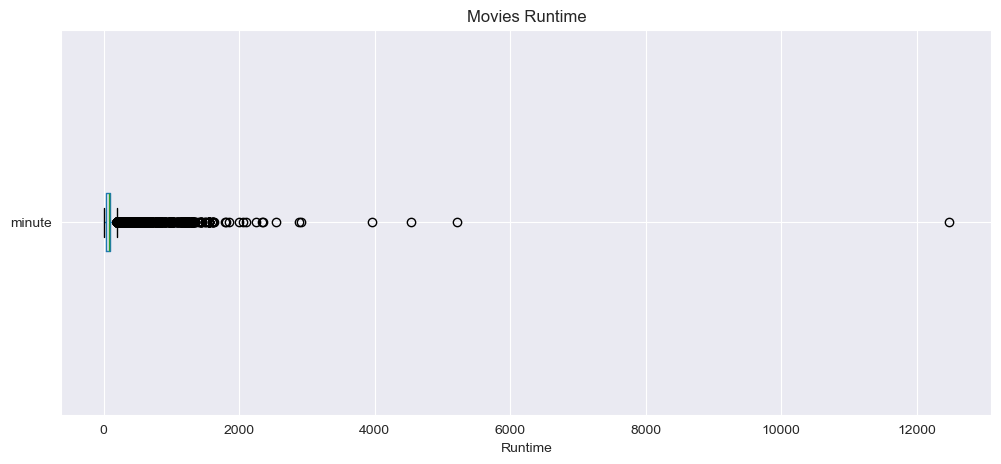

In [527]:
ax = modern_df.boxplot(column='minute', vert=False, figsize=(12, 5))
ax.set_title('Movies Runtime')
ax.set_xlabel('Runtime')
plt.show()

With such a vastness of titles, it becomes almost impossible to obtain an index as "precise" as the previous ones to catalogue the outsiders. We exclude from the dataframe, therefore, only titles that are certainly serial, or experimental films with too long a duration.

In [528]:
outliers = modern_df.loc[modern_df['minute'] > 480]
outliers.head(10)

id                   movie_title    date  \
4907   1003370                       Dekalog  1989.0   
5470   1003936                         Shoah  1985.0   
8546   1006985         Berlin Alexanderplatz  1980.0   
8637   1007076                         Out 1  1971.0   
12578  1011000     Cosmos: A Personal Voyage  1980.0   
13627  1012040  Eight Hours Don’t Make a Day  1972.0   
14310  1012722                 The Civil War  1990.0   
16654  1015052          Brideshead Revisited  1981.0   
17235  1015631              Future Boy Conan  1978.0   
18008  1016403              The World at War  1973.0   

                                                 tagline  \
4907                       THE CITIZEN KANE OF OUR TIME.   
5470                                                None   
8546                                                None   
8637                                                None   
12578  If you wish to make an apple pie from scratch,...   
13627                                    A Family Series   
14310                                               None   
16654  I should like to bury something precious every...   
17235                                               None   
18008                                               None   

                                             description  minute  rating  
4907   Originally made for Polish television, “The De...   572.0    4.57  
5470   Claude Lanzmann directed this 9½ hour document...   566.0    4.50  
8546   In late 1920s Berlin, Franz Biberkopf is relea...   907.0    4.22  
8637   While two theater groups rehearse plays by Aes...   743.0    4.06  
12578  Carl Sagan covers a wide range of scientific s...   780.0    4.49  
13627  Commissioned to make a working-class family dr...   500.0    4.32  
14310  A documentary on the American Civil War narrat...   680.0    4.32  
16654  Charles Ryder, an agnostic man, becomes involv...   659.0    4.21  
17235  After the great disaster of 2008, a war that d...   754.0    4.15  
18008  A documentary series that gives a historical a...  1334.0    4.48

In [529]:
runtime = modern_df.loc[modern_df['minute'] < 480]

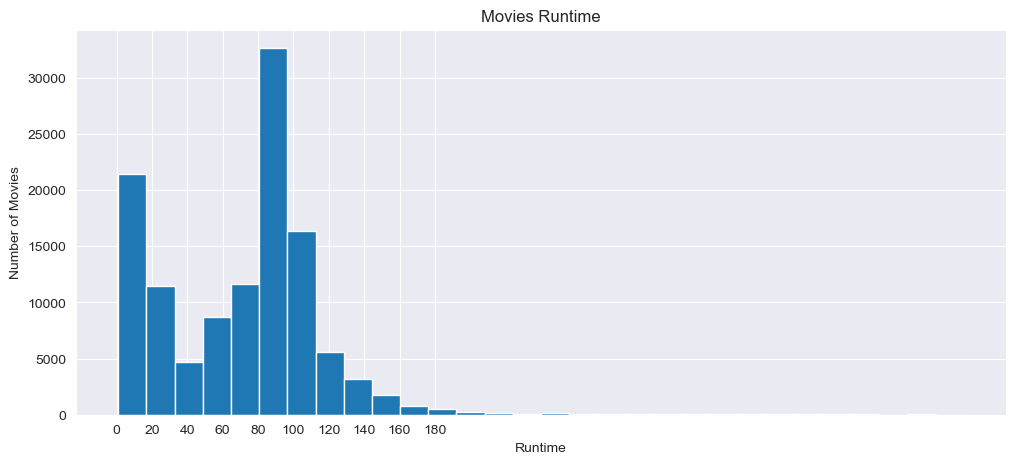

In [530]:
ax = runtime['minute'].plot(kind='hist', bins=30, title='Movies Runtime', figsize=(12, 5))
ax.set_xlabel('Runtime')
ax.set_ylabel('Number of Movies')
plt.xticks(np.arange(0, 200, 20))
plt.show()

In [531]:
runtime['minute'].describe()

count    119992.000000
mean         70.992108
std          45.884193
min           1.000000
25%          28.000000
50%          82.000000
75%          96.000000
max         479.000000
Name: minute, dtype: float64

The average length of films has further increased, with an average of 71 minutes.

Let's take a look at the short films.

In [532]:
short_movies = modern_df.loc[modern_df['minute'] <= 52]
short_movies.count()

id             39685
movie_title    39685
date           39685
tagline         1087
description    35582
minute         39685
rating          2177
dtype: int64

The number of short films produced is almost 5 times higher than in the previous period.

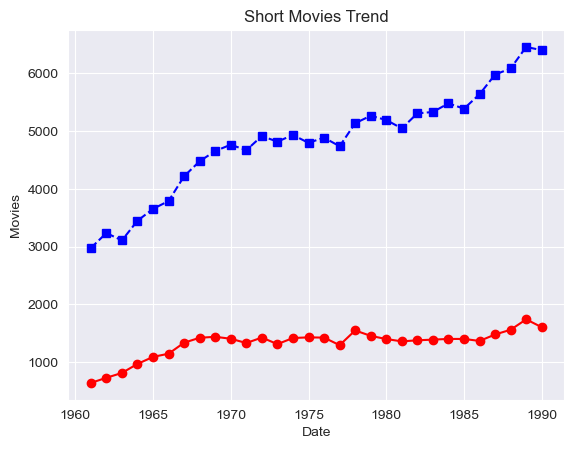

<Figure size 1200x600 with 0 Axes>

In [533]:
short_counters = short_movies.groupby('date').size()
counters = modern_df.groupby('date').size()

plt.plot(short_counters.index, short_counters.values, marker = 'o', linestyle='-', label='Short Movies', color='red')
plt.plot(counters.index, counters.values, marker='s', linestyle='--', label='All Movies', color='blue')
plt.title("Short Movies Trend")
plt.xlabel("Date")
plt.ylabel("Movies")
plt.figure(figsize=(12,6))
plt.show()

In [534]:
prop = len(short_movies)/len(modern_df)
prop

0.2740487535391202

The proportion of short films increased slightly, with 33% of total productions compared to 30% in the previous period.

Let's take a look at the evolution of the Walt Disney Company.

In [535]:
md_studios = pd.merge(modern_df, studios_df, on='id', how='left')
disney_movies = md_studios.loc[md_studios['studio'] == 'Walt Disney Productions']

In [536]:
disney_movies.head(10)

id                     movie_title    date  \
480   1001151                    Mary Poppins  1964.0   
505   1001273  One Hundred and One Dalmatians  1961.0   
543   1001358                 The Jungle Book  1967.0   
588   1001502                  The Aristocats  1970.0   
680   1001745                      Robin Hood  1973.0   
883   1002234           The Fox and the Hound  1981.0   
985   1002495          The Sword in the Stone  1963.0   
1040  1002630                            Tron  1982.0   
1417  1003375                    The Rescuers  1977.0   
1532  1003661              The Black Cauldron  1985.0   

                                                tagline  \
480            It's supercalifragilisticexpialidocious!   
505                     The Canine Caper of the Century   
543                              The Jungle is JUMPIN'!   
588                A tune-filled animated extravaganza.   
680            Meet Robin Hood and his MERRY MENagerie!   
883   A story of two friends who didn't know they we...   
985   Tired of living in a Medieval mess...Merlin us...   
1040  A world inside the computer where man has neve...   
1417  Two tiny agents vs. the world's wickedest woma...   
1532  Hidden by darkness. Guarded by witches. Discov...   

                                            description  minute  rating  \
480   A magical nanny employs music and adventure to...   139.0    3.89   
505   When a litter of dalmatian puppies are abducte...    79.0    3.64   
543   The boy Mowgli makes his way to the man-villag...    78.0    3.66   
588   When Madame Adelaide Bonfamille leaves her for...    78.0    3.63   
680   With King Richard off to the Crusades, Prince ...    83.0    3.69   
883   When a feisty little fox named Tod is adopted ...    82.0    3.64   
985   Wart is a young boy who aspires to be a knight...    79.0    3.40   
1040  As Kevin Flynn searches for proof that he inve...    96.0    3.18   
1417  What can two little mice possibly do to save a...    78.0    3.38   
1532  Taran is an assistant pigkeeper with boyish dr...    80.0    3.04   

                       studio  studios_id  
480   Walt Disney Productions      3836.0  
505   Walt Disney Productions      4314.0  
543   Walt Disney Productions      4561.0  
588   Walt Disney Productions      5087.0  
680   Walt Disney Productions      5888.0  
883   Walt Disney Productions      7564.0  
985   Walt Disney Productions      8430.0  
1040  Walt Disney Productions      8882.0  
1417  Walt Disney Productions     11359.0  
1532  Walt Disney Productions     12311.0

In [537]:
disney_movies['minute'].describe()

count    299.000000
mean      69.187291
std       40.290618
min        4.000000
25%       27.500000
50%       85.000000
75%       95.500000
max      240.000000
Name: minute, dtype: float64

The average length of Disney productions has increased significantly (69 minutes versus 28 previously), considering that the number of productions has decreased (299 versus 305).

This could be explained by a significant increase in feature films produced by the studio

In [538]:
disney_movies.loc[disney_movies['minute'] > 52]

id                                   movie_title    date  \
480     1001151                                  Mary Poppins  1964.0   
505     1001273                One Hundred and One Dalmatians  1961.0   
543     1001358                               The Jungle Book  1967.0   
588     1001502                                The Aristocats  1970.0   
680     1001745                                    Robin Hood  1973.0   
...         ...                                           ...     ...   
127085  1561722  Peter Alexander presents Walt Disney's World  1976.0   
127240  1561869                               Fantasy on Skis  1962.0   
142261  1666367                    Chester, Yesterday’s Horse  1974.0   
142404  1666499                                        Kilroy  1965.0   
144164  1678817                             The Haunted House  1964.0   

                                         tagline  \
480     It's supercalifragilisticexpialidocious!   
505              The Canine Caper of the Century   
543                       The Jungle is JUMPIN'!   
588         A tune-filled animated extravaganza.   
680     Meet Robin Hood and his MERRY MENagerie!   
...                                          ...   
127085                                      None   
127240                                      None   
142261                                      None   
142404                                      None   
144164                                      None   

                                              description  minute  rating  \
480     A magical nanny employs music and adventure to...   139.0    3.89   
505     When a litter of dalmatian puppies are abducte...    79.0    3.64   
543     The boy Mowgli makes his way to the man-villag...    78.0    3.66   
588     When Madame Adelaide Bonfamille leaves her for...    78.0    3.63   
680     With King Richard off to the Crusades, Prince ...    83.0    3.69   
...                                                   ...     ...     ...   
127085                                               None    87.0     NaN   
127240  A young girl, while skiing in Aspen, Colorado ...    60.0     NaN   
142261  It's about the faith of a fourteen-year-old bo...    90.0     NaN   
142404                                               None   240.0     NaN   
144164                                               None    60.0     NaN   

                         studio  studios_id  
480     Walt Disney Productions      3836.0  
505     Walt Disney Productions      4314.0  
543     Walt Disney Productions      4561.0  
588     Walt Disney Productions      5087.0  
680     Walt Disney Productions      5888.0  
...                         ...         ...  
127085  Walt Disney Productions    532085.0  
127240  Walt Disney Productions    532169.0  
142261  Walt Disney Productions    580087.0  
142404  Walt Disney Productions    580166.0  
144164  Walt Disney Productions    585466.0  

[190 rows x 9 columns]

Disney feature films tripled, with 190 versus 63 in the previous period

In [539]:
disney_shorts = disney_movies.loc[disney_movies['minute'] <= 52]
disney_shorts

id                           movie_title    date  \
1642    1003929                               Vincent  1982.0   
2323    1005475              Mickey's Christmas Carol  1983.0   
8827    1020329                     Hansel and Gretel  1983.0   
10152   1023790  Winnie the Pooh and the Blustery Day  1968.0   
10894   1025770                         The Small One  1978.0   
...         ...                                   ...     ...   
118653  1504123            Holiday Time at Disneyland  1962.0   
124807  1545761     Dumbo: A Lesson in Being Prepared  1981.0   
161420  1802938                     The CalArts Story  1964.0   
173893  1921498       The Challenge of Survival: Land  1984.0   
173894  1921499      The Challenge of Survival: Water  1984.0   

                 tagline                                        description  \
1642                None  Young Vincent Malloy dreams of being just like...   
2323                None  Ebenezer Scrooge is far too greedy to understa...   
8827                None  Tim Burton's reimagined classic combines live ...   
10152   Hip hip Poohray!  Winnie the Pooh and his friends experience hig...   
10894               None  Ordered by his father to sell his old, small d...   
...                  ...                                                ...   
118653              None  We see numerous Disneyland attractions over th...   
124807              None                             Educational short film   
161420              None  A short film presenting an overview of plans f...   
173893              None                                               None   
173894              None                                               None   

        minute  rating                   studio  studios_id  
1642       6.0    4.02  Walt Disney Productions     13246.0  
2323      25.0    3.68  Walt Disney Productions     18176.0  
8827      35.0    3.28  Walt Disney Productions     59012.0  
10152     25.0    3.79  Walt Disney Productions     66951.0  
10894     26.0    3.47  Walt Disney Productions     71371.0  
...        ...     ...                      ...         ...  
118653    52.0     NaN  Walt Disney Productions    503117.0  
124807     8.0     NaN  Walt Disney Productions    524258.0  
161420    15.0     NaN  Walt Disney Productions    634969.0  
173893     9.0     NaN  Walt Disney Productions    673954.0  
173894    10.0     NaN  Walt Disney Productions    673955.0  

[109 rows x 9 columns]

Short films, on the other hand, were halved, from 242 films to only 109

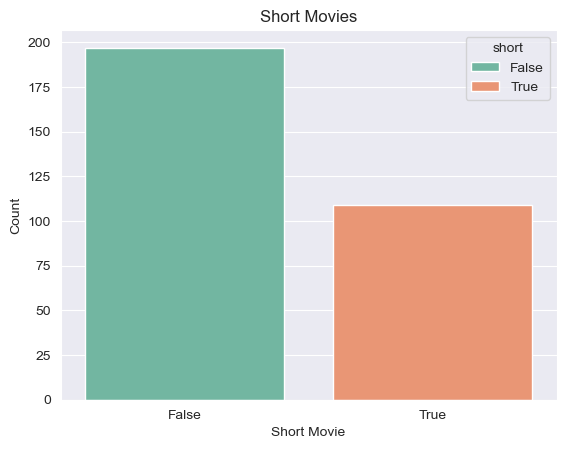

In [617]:
disney_movies.loc[:, 'short'] = disney_movies['minute'] <= 52
disney_shorts = disney_movies.dropna(subset=['short'])

sns.countplot(x='short', data=disney_shorts, hue='short', palette='Set2')
plt.title('Short Movies')
plt.xlabel('Short Movie')
plt.ylabel('Count')
plt.show()

Given its highly successful productions and unparalleled brand recognition, we must consider the true extent of Disney's global impact.

In [541]:
short_studios = md_studios.loc[md_studios['minute'] <= 52]
short_studios

id                      movie_title    date tagline  \
0       1940794                         Ninja Ko  1990.0    None   
7       1940800           The Charming Traveller  1989.0    None   
9       1940802             Mikko, Pavlova's Son  1989.0    None   
14      1940806                    Space Fantasy  1989.0    None   
17      1940809                          Ledvina  1988.0    None   
...         ...                              ...     ...     ...   
176401  1937294                 The Great Kurobe  1961.0    None   
176402  1937295                         Mexico 1  1961.0    None   
176403  1937296                         Mexico 2  1961.0    None   
176404  1937297  Mexico: The Land and the People  1961.0    None   
176405  1937298             Werbung im Fernsehen  1961.0    None   

                                              description  minute  rating  \
0       Ninja Ko runs into trouble somewhere in the tr...     4.0     NaN   
7                                        Animation short.     8.0     NaN   
9       Dolphines Tristan and Pavlova adopt a boy, Mik...    10.0     NaN   
14      Dedicated to the future joint flight of Soviet...    10.0     NaN   
17                                                   None    41.0     NaN   
...                                                   ...     ...     ...   
176401                                               None    41.0     NaN   
176402  Soundtrack:  Carlos Chávez's XOCHIPILLI, AN IM...    20.0     NaN   
176403  Soundtrack:  Manuel de Falla's HOMENAJE, POUR ...    13.0     NaN   
176404  This film portrays the changes that are taking...    20.0     NaN   
176405  Short educational film about advertising, show...     9.0     NaN   

                                                   studio  studios_id  
0                                                     NaN         NaN  
7                                               Floricica    678759.0  
9                                           Soyuzmultfilm    678761.0  
14                                              Floricica    678766.0  
17                          Československá televize Praha    678767.0  
...                                                   ...         ...  
176401                                                NaN         NaN  
176402                                                NaN         NaN  
176403                                                NaN         NaN  
176404                      Encyclopedia Brittanica Films    677960.0  
176405  Institut für Film und Bild in Wissenschaft und...    677961.0  

[43168 rows x 9 columns]

In [618]:
short_studios.loc[:, 'Disney'] = short_studios['studio'].apply(lambda x: is_Disney(x))
short_studios

id                      movie_title    date tagline  \
0       1940794                         Ninja Ko  1990.0    None   
7       1940800           The Charming Traveller  1989.0    None   
9       1940802             Mikko, Pavlova's Son  1989.0    None   
14      1940806                    Space Fantasy  1989.0    None   
17      1940809                          Ledvina  1988.0    None   
...         ...                              ...     ...     ...   
176401  1937294                 The Great Kurobe  1961.0    None   
176402  1937295                         Mexico 1  1961.0    None   
176403  1937296                         Mexico 2  1961.0    None   
176404  1937297  Mexico: The Land and the People  1961.0    None   
176405  1937298             Werbung im Fernsehen  1961.0    None   

                                              description  minute  rating  \
0       Ninja Ko runs into trouble somewhere in the tr...     4.0     NaN   
7                                        Animation short.     8.0     NaN   
9       Dolphines Tristan and Pavlova adopt a boy, Mik...    10.0     NaN   
14      Dedicated to the future joint flight of Soviet...    10.0     NaN   
17                                                   None    41.0     NaN   
...                                                   ...     ...     ...   
176401                                               None    41.0     NaN   
176402  Soundtrack:  Carlos Chávez's XOCHIPILLI, AN IM...    20.0     NaN   
176403  Soundtrack:  Manuel de Falla's HOMENAJE, POUR ...    13.0     NaN   
176404  This film portrays the changes that are taking...    20.0     NaN   
176405  Short educational film about advertising, show...     9.0     NaN   

                                                   studio  studios_id  Disney  
0                                                     NaN         NaN   False  
7                                               Floricica    678759.0   False  
9                                           Soyuzmultfilm    678761.0   False  
14                                              Floricica    678766.0   False  
17                          Československá televize Praha    678767.0   False  
...                                                   ...         ...     ...  
176401                                                NaN         NaN   False  
176402                                                NaN         NaN   False  
176403                                                NaN         NaN   False  
176404                      Encyclopedia Brittanica Films    677960.0   False  
176405  Institut für Film und Bild in Wissenschaft und...    677961.0   False  

[43168 rows x 10 columns]

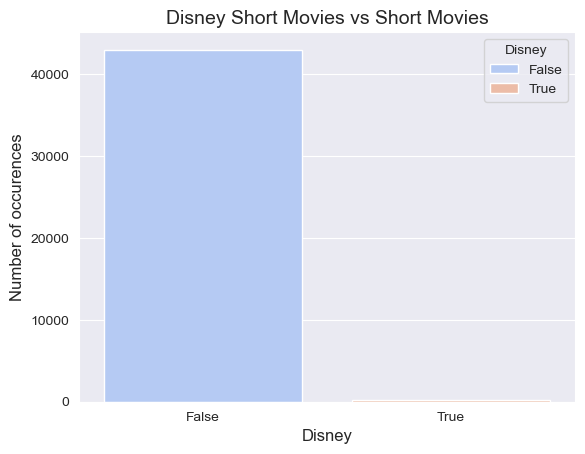

<Figure size 1200x800 with 0 Axes>

In [543]:
sns.countplot(x='Disney', data=short_studios, hue='Disney', palette='coolwarm')

plt.title('Disney Short Movies vs Short Movies', fontsize=14)
plt.xlabel('Disney', fontsize=12)
plt.ylabel('Number of occurences', fontsize=12)
plt.figure(figsize=(12, 8))
plt.show()

In [544]:
animation_shorts = pd.merge(short_studios, genres_df, on='id', how='left')
animation_shorts = animation_shorts.loc[animation_shorts['genre'] == 'Animation']
animation_shorts

id                 movie_title    date tagline  \
1      1940800      The Charming Traveller  1989.0    None   
2      1940802        Mikko, Pavlova's Son  1989.0    None   
5      1940811                Hello, Bread  1988.0    None   
6      1940812  Where Does Rain Come From?  1988.0    None   
8      1940821             Give the Warmth  1987.0    None   
...        ...                         ...     ...     ...   
53138  1937085                       Music  1976.0    None   
53156  1937097     Boy and the Illusionist  1975.0    None   
53165  1937103                  Bevendzhik  1975.0    None   
53223  1937157  Why a fir-tree has needles  1973.0    None   
53361  1937284            Robes et volants  1962.0    None   

                                             description  minute  rating  \
1                                       Animation short.     8.0     NaN   
2      Dolphines Tristan and Pavlova adopt a boy, Mik...    10.0     NaN   
5                                        Animation short     7.0     NaN   
6      An animated film for children based on the fai...    10.0     NaN   
8      A New Year's story about a little girl's frien...     9.0     NaN   
...                                                  ...     ...     ...   
53138  A film about music itself, and about how conce...     6.0     NaN   
53156  As a traveling illusionist he performed in the...    10.0     NaN   
53165  A satirical film tale about the greedy and evi...     6.0     NaN   
53223          Animated film directed by Nina Vassilenko     9.0     NaN   
53361  A short animated feature about a lady and her ...     5.0     NaN   

                                   studio  studios_id  Disney      genre  \
1                               Floricica    678759.0   False  Animation   
2                           Soyuzmultfilm    678761.0   False  Animation   
5                               Floricica    678770.0   False  Animation   
6                               Floricica    678771.0   False  Animation   
8                               Floricica    678774.0   False  Animation   
...                                   ...         ...     ...        ...   
53138                           Armenfilm    677808.0   False  Animation   
53156                        Georgia-Film    677819.0   False  Animation   
53165                         Turkmenfilm    677824.0   False  Animation   
53223                                 NaN         NaN   False  Animation   
53361  Société des Films Albert Champeaux    677955.0   False  Animation   

        genre_id  
1      1046328.0  
2      1046330.0  
5      1046338.0  
6      1046339.0  
8      1046345.0  
...          ...  
53138  1044278.0  
53156  1044293.0  
53165  1044301.0  
53223  1044351.0  
53361  1044444.0  

[8852 rows x 12 columns]

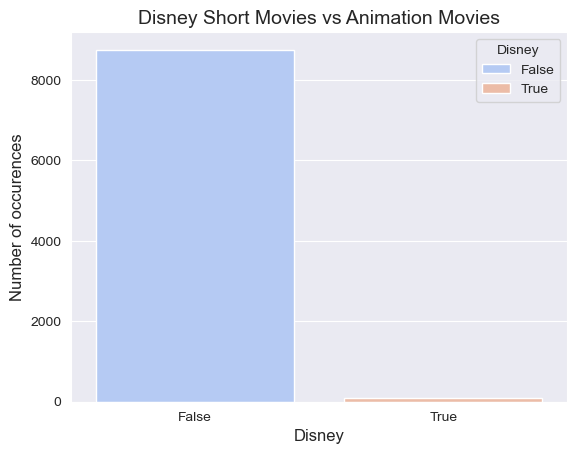

<Figure size 1200x800 with 0 Axes>

In [545]:
sns.countplot(x='Disney', data=animation_shorts, hue='Disney', palette='coolwarm')

plt.title('Disney Short Movies vs Animation Movies', fontsize=14)
plt.xlabel('Disney', fontsize=12)
plt.ylabel('Number of occurences', fontsize=12)
plt.figure(figsize=(12, 8))
plt.show()

The reach of Disney shorts against the competition has virtually disappeared.

It is worth comparing Disney animated feature films with others


In [546]:
animation = pd.merge(modern_df, genres_df, on='id', how='left')
animation = animation.loc[animation['genre'] == 'Animation']
animation_studios = pd.merge(animation, studios_df, on='id', how='left')
animation_studios['disney'] = animation_studios['studio'].apply(lambda x: is_Disney(x))
animation_studios.drop_duplicates(subset='movie_title', keep='first', inplace=True)
animation_studios

id                 movie_title    date tagline  \
0      1940800      The Charming Traveller  1989.0    None   
1      1940802        Mikko, Pavlova's Son  1989.0    None   
2      1940811                Hello, Bread  1988.0    None   
3      1940812  Where Does Rain Come From?  1988.0    None   
4      1940821             Give the Warmth  1987.0    None   
...        ...                         ...     ...     ...   
11612  1937085                       Music  1976.0    None   
11613  1937097     Boy and the Illusionist  1975.0    None   
11614  1937103                  Bevendzhik  1975.0    None   
11615  1937157  Why a fir-tree has needles  1973.0    None   
11616  1937284            Robes et volants  1962.0    None   

                                             description  minute  rating  \
0                                       Animation short.     8.0     NaN   
1      Dolphines Tristan and Pavlova adopt a boy, Mik...    10.0     NaN   
2                                        Animation short     7.0     NaN   
3      An animated film for children based on the fai...    10.0     NaN   
4      A New Year's story about a little girl's frien...     9.0     NaN   
...                                                  ...     ...     ...   
11612  A film about music itself, and about how conce...     6.0     NaN   
11613  As a traveling illusionist he performed in the...    10.0     NaN   
11614  A satirical film tale about the greedy and evi...     6.0     NaN   
11615          Animated film directed by Nina Vassilenko     9.0     NaN   
11616  A short animated feature about a lady and her ...     5.0     NaN   

           genre   genre_id                              studio  studios_id  \
0      Animation  1046328.0                           Floricica    678759.0   
1      Animation  1046330.0                       Soyuzmultfilm    678761.0   
2      Animation  1046338.0                           Floricica    678770.0   
3      Animation  1046339.0                           Floricica    678771.0   
4      Animation  1046345.0                           Floricica    678774.0   
...          ...        ...                                 ...         ...   
11612  Animation  1044278.0                           Armenfilm    677808.0   
11613  Animation  1044293.0                        Georgia-Film    677819.0   
11614  Animation  1044301.0                         Turkmenfilm    677824.0   
11615  Animation  1044351.0                                 NaN         NaN   
11616  Animation  1044444.0  Société des Films Albert Champeaux    677955.0   

       disney  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
11612   False  
11613   False  
11614   False  
11615   False  
11616   False  

[9368 rows x 12 columns]

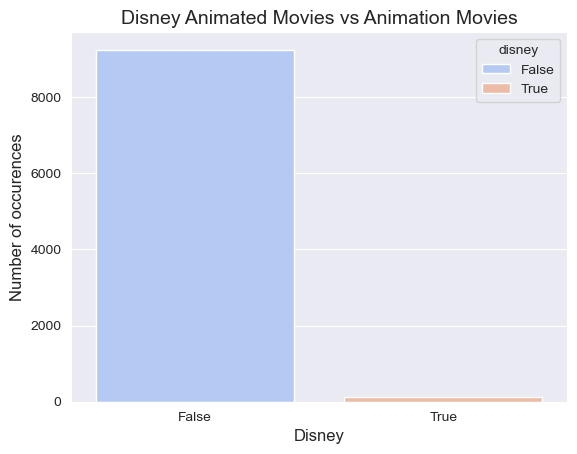

<Figure size 1200x800 with 0 Axes>

In [547]:
sns.countplot(x='disney', data=animation_studios, hue='disney', palette='coolwarm')

plt.title('Disney Animated Movies vs Animation Movies', fontsize=14)
plt.xlabel('Disney', fontsize=12)
plt.ylabel('Number of occurences', fontsize=12)
plt.figure(figsize=(12, 8))
plt.show()

In conclusion, Disney's impact wasn't measured by its production volume. In a crowded marketplace with countless studios releasing films, Disney's output was relatively low. However, the key to its influence was that its few releases consistently achieved enormous success.

Let's see the Movies' Ratings of this Period.

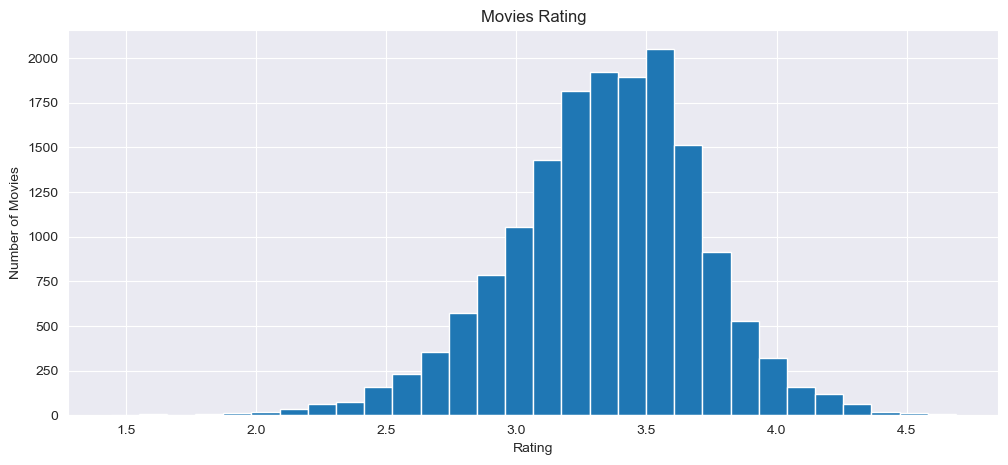

In [548]:
ax = modern_df['rating'].plot(kind='hist', bins=30, title='Movies Rating', figsize=(12, 5))
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
plt.show()

In [549]:
modern_df['rating'].describe()

count    16136.000000
mean         3.339345
std          0.373148
min          1.440000
25%          3.120000
50%          3.370000
75%          3.580000
max          4.690000
Name: rating, dtype: float64

In [550]:
modern_df.loc[modern_df['rating'] == 4.69]

id movie_title    date  \
2369  1000864    Harakiri  1962.0   

                                                tagline  \
2369  The world has never understood why the Japanes...   

                                            description  minute  rating  
2369  Down-on-his-luck veteran Tsugumo Hanshirō ente...   135.0    4.69

According to the Dataframe 'Ratings' column, the best film of the period is "Harakiri" (1962) by Masaki Kobayashi.

Let's now look at the Rotten Tomatoes ratings

In [551]:
modern_rev = modern_df[['id', 'movie_title', 'date', 'minute']]
modern_rev = pd.merge(modern_rev, review_df, on='movie_title', how='left')
modern_rev

id                      movie_title    date  minute  \
0       1940794                         Ninja Ko  1990.0     4.0   
1       1940795                            踏尽江湖路  1990.0    94.0   
2       1940796                 The Perfect Date  1990.0    60.0   
3       1940796                 The Perfect Date  1990.0    60.0   
4       1940796                 The Perfect Date  1990.0    60.0   
...         ...                              ...     ...     ...   
405683  1937294                 The Great Kurobe  1961.0    41.0   
405684  1937295                         Mexico 1  1961.0    20.0   
405685  1937296                         Mexico 2  1961.0    13.0   
405686  1937297  Mexico: The Land and the People  1961.0    20.0   
405687  1937298             Werbung im Fernsehen  1961.0     9.0   

                             _id rotten_tomatoes_link      critic_name  \
0                            NaN                  NaN              NaN   
1                            NaN                  NaN              NaN   
2       67de8c89c8c9f9b21d2d89dd   m/the_perfect_date    Molly Freeman   
3       67de8c89c8c9f9b21d2d89de   m/the_perfect_date  Constance Grady   
4       67de8c89c8c9f9b21d2d89df   m/the_perfect_date    Kiko Martinez   
...                          ...                  ...              ...   
405683                       NaN                  NaN              NaN   
405684                       NaN                  NaN              NaN   
405685                       NaN                  NaN              NaN   
405686                       NaN                  NaN              NaN   
405687                       NaN                  NaN              NaN   

       top_critic       publisher_name review_type review_score review_date  \
0             NaN                  NaN         NaN          NaN         NaT   
1             NaN                  NaN         NaN          NaN         NaT   
2           False          Screen Rant       Fresh          3/5  2019-04-12   
3           False                  Vox       Fresh          3/5  2019-04-12   
4           False  San Antonio Current      Rotten          2/5  2019-04-13   
...           ...                  ...         ...          ...         ...   
405683        NaN                  NaN         NaN          NaN         NaT   
405684        NaN                  NaN         NaN          NaN         NaT   
405685        NaN                  NaN         NaN          NaN         NaT   
405686        NaN                  NaN         NaN          NaN         NaT   
405687        NaN                  NaN         NaN          NaN         NaT   

                                           review_content  Updated_Score  
0                                                     NaN            NaN  
1                                                     NaN            NaN  
2       Netflix's The Perfect Date is a fairly standar...            3.0  
3       It's a perfectly middle-of-the-road teen flick...            3.0  
4       The script...is overwritten and forces its hea...            2.0  
...                                                   ...            ...  
405683                                                NaN            NaN  
405684                                                NaN            NaN  
405685                                                NaN            NaN  
405686                                                NaN            NaN  
405687                                                NaN            NaN  

[405688 rows x 14 columns]

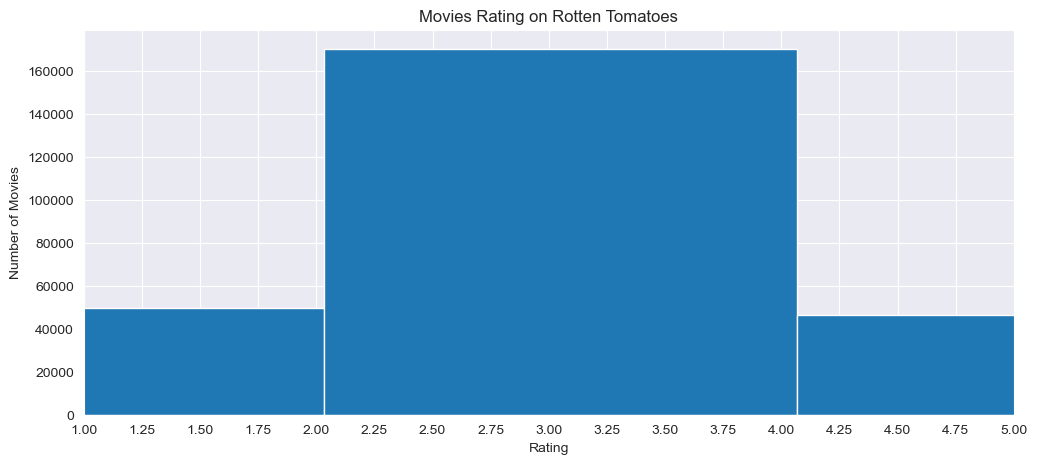

In [552]:
ax = modern_rev['Updated_Score'].plot(kind='hist', bins=30, title='Movies Rating on Rotten Tomatoes', figsize=(12, 5))
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
plt.xlim(1, 5)
plt.xticks(np.arange(1, 5.25, 0.25))
plt.show()

In [553]:
modern_rev['Updated_Score'].describe()

count    266851.000000
mean          3.233761
std           1.064366
min           0.000000
25%           2.500000
50%           3.300000
75%           4.000000
max          61.000000
Name: Updated_Score, dtype: float64

In [554]:
rotten_rev = modern_rev[['id', 'movie_title', 'date', 'minute']]
rotten_rev = pd.merge(rotten_rev, review_df, on='movie_title', how='left')
rotten_rev.head(10)

id       movie_title    date  minute                       _id  \
0  1940794          Ninja Ko  1990.0     4.0                       NaN   
1  1940795             踏尽江湖路  1990.0    94.0                       NaN   
2  1940796  The Perfect Date  1990.0    60.0  67de8c89c8c9f9b21d2d89dd   
3  1940796  The Perfect Date  1990.0    60.0  67de8c89c8c9f9b21d2d89de   
4  1940796  The Perfect Date  1990.0    60.0  67de8c89c8c9f9b21d2d89df   
5  1940796  The Perfect Date  1990.0    60.0  67de8c89c8c9f9b21d2d89e0   
6  1940796  The Perfect Date  1990.0    60.0  67de8c89c8c9f9b21d2d89e1   
7  1940796  The Perfect Date  1990.0    60.0  67de8c89c8c9f9b21d2d89e2   
8  1940796  The Perfect Date  1990.0    60.0  67de8c89c8c9f9b21d2d89e3   
9  1940796  The Perfect Date  1990.0    60.0  67de8c89c8c9f9b21d2d89e4   

  rotten_tomatoes_link       critic_name top_critic       publisher_name  \
0                  NaN               NaN        NaN                  NaN   
1                  NaN               NaN        NaN                  NaN   
2   m/the_perfect_date     Molly Freeman      False          Screen Rant   
3   m/the_perfect_date   Constance Grady      False                  Vox   
4   m/the_perfect_date     Kiko Martinez      False  San Antonio Current   
5   m/the_perfect_date     Jeffrey Lyles      False   Lyles' Movie Files   
6   m/the_perfect_date      Eddie Strait      False        The Daily Dot   
7   m/the_perfect_date  Lauren Veneziani      False              WBAL-TV   
8   m/the_perfect_date   Renee Schonfeld      False   Common Sense Media   
9   m/the_perfect_date    Mikel Zorrilla      False              Espinof   

  review_type review_score review_date  \
0         NaN          NaN         NaT   
1         NaN          NaN         NaT   
2       Fresh          3/5  2019-04-12   
3       Fresh          3/5  2019-04-12   
4      Rotten          2/5  2019-04-13   
5       Fresh         7/10  2019-04-14   
6       Fresh        2.5/5  2019-04-16   
7       Fresh        3.5/5  2019-04-16   
8       Fresh          4/5  2019-04-17   
9       Fresh          3/5  2019-04-19   

                                      review_content  Updated_Score  
0                                                NaN            NaN  
1                                                NaN            NaN  
2  Netflix's The Perfect Date is a fairly standar...            3.0  
3  It's a perfectly middle-of-the-road teen flick...            3.0  
4  The script...is overwritten and forces its hea...            2.0  
5  Bring your rom-com Bingo cards out as few clic...            3.5  
6  You'll have a good time if you go into it with...            2.5  
7  Noah Centineo continues to be our Netflix boyf...            3.5  
8  Solid romcom fun with two charismatic leads; s...            4.0  
9  A delightful romantic fun that's ideal for lov...            3.0

In [555]:
grouped_df = rotten_rev.groupby('movie_title', as_index=False)['Updated_Score'].mean()
grouped_df.sort_values(by='Updated_Score', ascending=False, inplace=True)
grouped_df.head(10)

movie_title  Updated_Score
36038             Fat City      10.175000
118968           Tom Thumb       5.000000
43616             Harakiri       5.000000
63918                    M       4.900000
105855       The Godfather       4.886111
84769          Rear Window       4.817262
116465    The Wizard of Oz       4.814437
19317            Charulata       4.798611
59331   Lawrence of Arabia       4.795408
19910            Chinatown       4.794508

Let's now compare the ratings of films that have won at least one Oscar and other titles

In [619]:
oscars = pd.merge(modern_df, oscars_df, on='movie_title', how='inner')
winning_titles = oscars.loc[
    (oscars['winner'] == True) &
    (oscars['date'] > 1960) &
    (oscars['date'] <= 1990) &
    (oscars['year_film'] >= 1970) &
    (oscars['year_film'] <= 1991),
    'movie_title'
]
modern_df['oscar_winner'] = modern_df['movie_title'].isin(winning_titles)
modern_df

/var/folders/md/2y2335gj2zd2r5b1cxkf0yw80000gn/T/ipykernel_45745/4201578061.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_df['oscar_winner'] = modern_df['movie_title'].isin(winning_titles)


id                      movie_title    date tagline  \
704     1940794                         Ninja Ko  1990.0    None   
705     1940795                            踏尽江湖路  1990.0    None   
706     1940796                 The Perfect Date  1990.0    None   
707     1940797                   Over The Limit  1990.0    None   
708     1940798                All That Glitters  1990.0    None   
...         ...                              ...     ...     ...   
938788  1937294                 The Great Kurobe  1961.0    None   
938789  1937295                         Mexico 1  1961.0    None   
938790  1937296                         Mexico 2  1961.0    None   
938791  1937297  Mexico: The Land and the People  1961.0    None   
938792  1937298             Werbung im Fernsehen  1961.0    None   

                                              description  minute  rating  \
704     Ninja Ko runs into trouble somewhere in the tr...     4.0     NaN   
705                                                  None    94.0     NaN   
706     16-year-old student is convinced his upcoming ...    60.0     NaN   
707     A high-school student debates whether to come ...    60.0     NaN   
708     A group of high school students learn about et...    60.0     NaN   
...                                                   ...     ...     ...   
938788                                               None    41.0     NaN   
938789  Soundtrack:  Carlos Chávez's XOCHIPILLI, AN IM...    20.0     NaN   
938790  Soundtrack:  Manuel de Falla's HOMENAJE, POUR ...    13.0     NaN   
938791  This film portrays the changes that are taking...    20.0     NaN   
938792  Short educational film about advertising, show...     9.0     NaN   

        oscar_winner    ita  
704            False  False  
705            False  False  
706            False  False  
707            False  False  
708            False  False  
...              ...    ...  
938788         False    NaN  
938789         False    NaN  
938790         False    NaN  
938791         False    NaN  
938792         False    NaN  

[144810 rows x 9 columns]

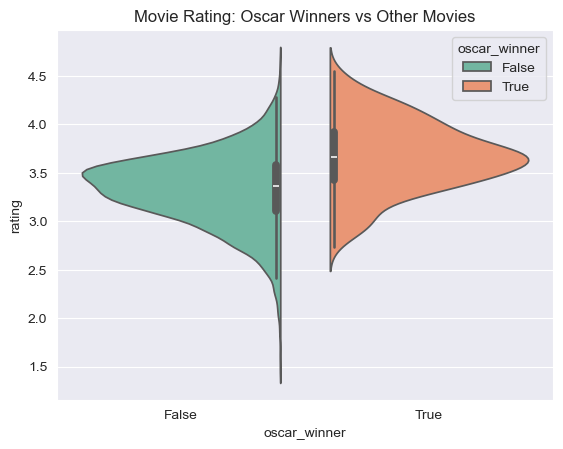

In [557]:
sns.violinplot(x='oscar_winner', y='rating', data=modern_df, hue='oscar_winner', palette='Set2', split=True)
plt.title('Movie Rating: Oscar Winners vs Other Movies')
plt.show()

For this period, however, the ratings do not seem to be influenced by the victory of an Oscar

Let's see the same analysis for Rotten Tomatoes

In [558]:
scoring = review_df[['movie_title', 'Updated_Score']]
oscars = pd.merge(modern_df, scoring, on='movie_title', how='inner')
oscars

id       movie_title    date tagline  \
0       1940796  The Perfect Date  1990.0    None   
1       1940796  The Perfect Date  1990.0    None   
2       1940796  The Perfect Date  1990.0    None   
3       1940796  The Perfect Date  1990.0    None   
4       1940796  The Perfect Date  1990.0    None   
...         ...               ...     ...     ...   
267390  1937268             Birth  1963.0    None   
267391  1937268             Birth  1963.0    None   
267392  1937268             Birth  1963.0    None   
267393  1937268             Birth  1963.0    None   
267394  1937268             Birth  1963.0    None   

                                              description  minute  rating  \
0       16-year-old student is convinced his upcoming ...    60.0     NaN   
1       16-year-old student is convinced his upcoming ...    60.0     NaN   
2       16-year-old student is convinced his upcoming ...    60.0     NaN   
3       16-year-old student is convinced his upcoming ...    60.0     NaN   
4       16-year-old student is convinced his upcoming ...    60.0     NaN   
...                                                   ...     ...     ...   
267390         Soundtrack: African Instruments and Songs.    12.0     NaN   
267391         Soundtrack: African Instruments and Songs.    12.0     NaN   
267392         Soundtrack: African Instruments and Songs.    12.0     NaN   
267393         Soundtrack: African Instruments and Songs.    12.0     NaN   
267394         Soundtrack: African Instruments and Songs.    12.0     NaN   

        oscar_winner  Updated_Score  
0              False            3.0  
1              False            3.0  
2              False            2.0  
3              False            3.5  
4              False            2.5  
...              ...            ...  
267390         False            3.0  
267391         False            3.5  
267392         False            2.3  
267393         False            1.0  
267394         False            2.7  

[267395 rows x 9 columns]

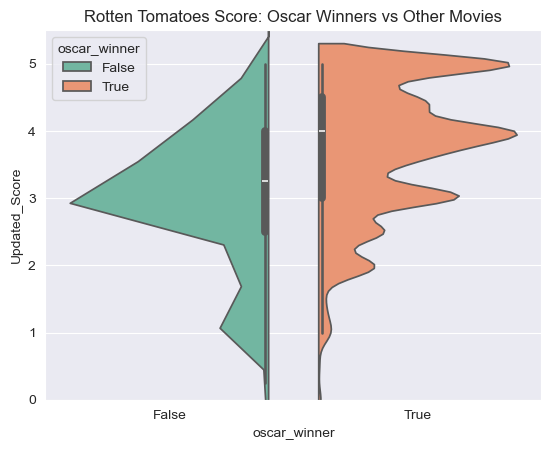

In [559]:
sns.violinplot(x='oscar_winner', y='Updated_Score', data=oscars, hue='oscar_winner', palette='Set2', split=True)
plt.title('Rotten Tomatoes Score: Oscar Winners vs Other Movies')
plt.ylim(0, 5.5)
plt.show()

According to Rotten Tomatoes data, many Oscar-winning films have been rated below average.

Let's see the Top 10 movies by Oscar received.

In [560]:
oscar_winners = modern_df.loc[modern_df['oscar_winner'] == True]
oscar_winners

id              movie_title    date  \
1537    1000046            The Godfather  1972.0   
1551    1000060       Dead Poets Society  1989.0   
1574    1000082                Star Wars  1977.0   
1582    1000090       Back to the Future  1985.0   
1613    1000122  The Empire Strikes Back  1980.0   
...         ...                      ...     ...   
872102  1870394                The River  1979.0   
904968  1903399               Earthquake  1980.0   
923483  1921990                    Tango  1977.0   
924500  1923004                    Ghost  1966.0   
938717  1937223                   Cocoon  1968.0   

                                                  tagline  \
1537                           An offer you can't refuse.   
1551    He was their inspiration. He made their lives ...   
1574         A long time ago in a galaxy far, far away...   
1582    He's the only kid ever to get into trouble bef...   
1613                           The Adventure Continues...   
...                                                   ...   
872102                                               None   
904968                                               None   
923483                                               None   
924500                                               None   
938717                                               None   

                                              description  minute  rating  \
1537    Spanning the years 1945 to 1955, a chronicle o...   175.0    4.55   
1551    At an elite, old-fashioned boarding school in ...   128.0    4.26   
1574    Princess Leia is captured and held hostage by ...   121.0    4.17   
1582    Eighties teenager Marty McFly is accidentally ...   116.0    4.20   
1613    The epic saga continues as Luke Skywalker, in ...   124.0    4.41   
...                                                   ...     ...     ...   
872102  A haunting love story using rotoscope and seve...     NaN     NaN   
904968                                        Short film.    33.0     NaN   
923483                                               None     NaN     NaN   
924500  Soundtrack: ANAKLASIS FOR STRINGS AND PERCUSSI...     9.0     NaN   
938717  This unusual short was made while the director...    28.0     NaN   

        oscar_winner  
1537            True  
1551            True  
1574            True  
1582            True  
1613            True  
...              ...  
872102          True  
904968          True  
923483          True  
924500          True  
938717          True  

[376 rows x 8 columns]

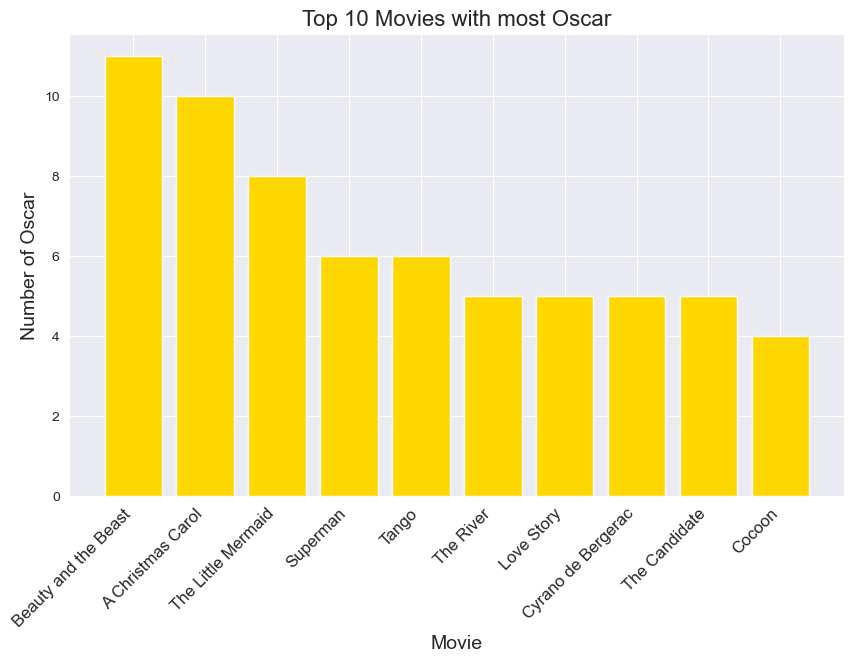

In [561]:
oscar_count = oscar_winners['movie_title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(oscar_count.index, oscar_count.values, color='gold')
plt.title('Top 10 Movies with most Oscar', fontsize=16)
plt.xlabel('Movie', fontsize=14)
plt.ylabel('Number of Oscar', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

When it comes to Oscar wins, Beauty and the Beast claims the top spot, ahead of A Christmas Carol and The Little Mermaid.

### The Italian Cinema between 1960 and 1990

The period between 1960 and 1990 marked a fascinating, albeit complex, evolution for Italian cinema. While the golden age of Neorealism had faded, this era saw Italian filmmakers bravely navigate new artistic territories, often grappling with the social and political transformations sweeping the nation. From the darkly satirical comedies of the Commedia all'italiana to the visually stunning and intellectually challenging works of auteurs like Federico Fellini, Michelangelo Antonioni, and Pier Paolo Pasolini, Italian cinema continued to captivate audiences worldwide with its unique blend of artistic ambition, profound humanism, and often critical gaze on contemporary society, solidifying its place as a significant force in global filmmaking.

In [562]:
modern_countries = pd.merge(modern_df, countries_df, on='id', how='inner')

In [563]:
italian_movies = modern_countries.loc[modern_countries['country'] == 'Italy']
italian_movies

id                                        movie_title    date  \
197     1000442                                           Suspiria  1977.0   
199     1000445                     The Good, the Bad and the Ugly  1966.0   
233     1000620                                    Cinema Paradiso  1988.0   
268     1000855                                                 8½  1963.0   
277     1000920                        Once Upon a Time in America  1984.0   
...         ...                                                ...     ...   
122594  1937144                                     Carosello nero  1973.0   
122638  1937206  Abbandonate ogni illusione, preparatevi alla l...  1969.0   
122654  1937239                                Dove sono i registi  1967.0   
122662  1937252                                          L'eccesso  1965.0   
122663  1937253                                    Identificazione  1965.0   

                                                  tagline  \
197            The Most Frightening Film You'll Ever See!   
199     For three men the Civil War wasn't hell. It wa...   
233     A celebration of youth, friendship, and the ev...   
268     A picture that goes beyond what men think abou...   
277                    Crime, passion and lust for power.   
...                                                   ...   
122594                                               None   
122638                                               None   
122654                                               None   
122662                                               None   
122663                                               None   

                                              description  minute  rating  \
197     From the moment she arrives in Freiberg, Germa...    99.0    3.95   
199     While the Civil War rages on between the Union...   161.0    4.50   
233     A filmmaker recalls his childhood, when he fel...   124.0    4.45   
268     Guido Anselmi, a film director, finds himself ...   139.0    4.30   
277     A former Prohibition-era Jewish gangster retur...   229.0    4.21   
...                                                   ...     ...     ...   
122594                                               None    10.0     NaN   
122638  Lost film: Abandon all illusions, prepare for ...    40.0     NaN   
122654  Whoever searches for them does not find them, ...    30.0     NaN   
122662  Those who run remain there, those who don't ru...    15.0     NaN   
122663            The sculptor is compared to the martyr.    15.0     NaN   

        oscar_winner country  country_id  
197            False   Italy         617  
199            False   Italy         623  
233             True   Italy         884  
268            False   Italy        1209  
277            False   Italy        1306  
...              ...     ...         ...  
122594         False   Italy      690969  
122638         False   Italy      691013  
122654         False   Italy      691029  
122662         False   Italy      691037  
122663         False   Italy      691038  

[6180 rows x 10 columns]

Italian Cinema between the 60s and the 90s is a cinema of transitions. The genre of Italian Comedy asserts itself, and other successful genres are born, including the so-called "Spaghetti Western"

In [564]:
italian_gen = pd.merge(italian_movies, genres_df, on='id', how='inner')

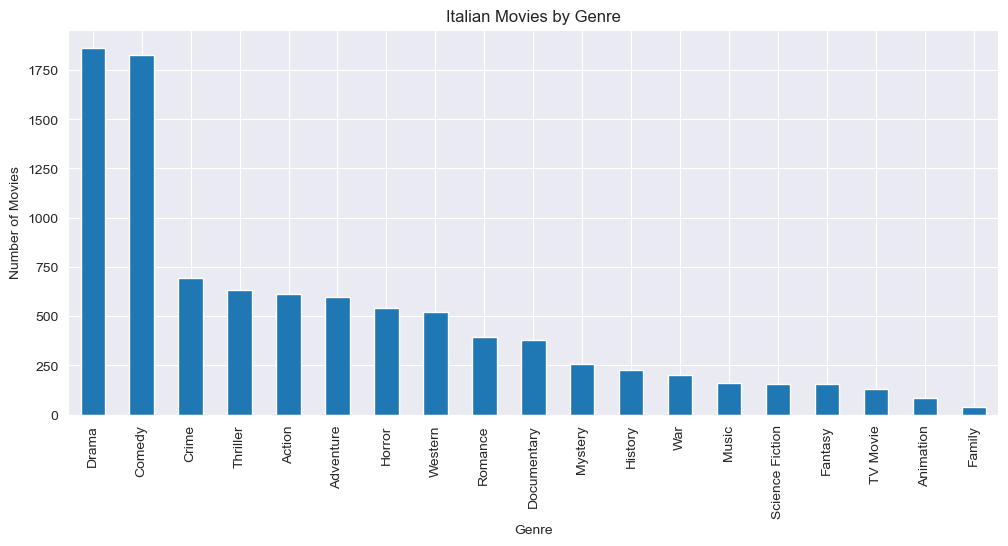

In [565]:
ax = italian_gen['genre'].value_counts() \
    .plot(kind='bar', title='Italian Movies by Genre', figsize=(12, 5))
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Movies')
plt.show()

As always, Drama and Comedy were the most frequently produced and popular genres. However, it's surprising to see Crime emerge in third place, perhaps influenced by the terrorist attacks and socio-political turmoil experienced in Italy during those years.

In [566]:
comedy = italian_gen.loc[italian_gen['genre'] == 'Comedy']
comedy

id                                movie_title    date  \
31    1001829                                   PlayTime  1967.0   
40    1002068      The Discreet Charm of the Bourgeoisie  1972.0   
62    1002830                         A Woman Is a Woman  1961.0   
70    1002906                                   Amarcord  1973.0   
71    1003038                              Day for Night  1973.0   
...       ...                                        ...     ...   
9420  1846097                 Arsenico e vecchi merletti  1969.0   
9428  1864548                                 Hot Senses  1980.0   
9429  1864611                Una settimana come un'altra  1978.0   
9435  1891455                            Fatto su misura  1985.0   
9451  1922162  Lezioni di violoncello con toccata e fuga  1976.0   

                                                tagline  \
31                                                 None   
40                                                 None   
62    Is this a tragedy or a comedy? Either way, it'...   
70                      The Fantastic World of Fellini!   
71                   A movie for people who love movies   
...                                                 ...   
9420                                               None   
9428                                               None   
9429                                               None   
9435                                               None   
9451                                               None   

                                            description  minute  rating  \
31    Clumsy Monsieur Hulot finds himself perplexed ...   115.0    4.20   
40    In Luis Buñuel’s deliciously satiric masterpie...   101.0    4.01   
62    Longing for a baby, a stripper pursues another...    83.0    3.87   
70    In an Italian seaside town, young Titta gets i...   123.0    4.11   
71    A committed film director struggles to complet...   116.0    4.17   
...                                                 ...     ...     ...   
9420                                               None     NaN     NaN   
9428  Sonia cares more about her job than her husban...    80.0     NaN   
9429                             A comedy feature film.    99.0     NaN   
9435                                               None   101.0     NaN   
9451                                               None    95.0     NaN   

      oscar_winner country  country_id   genre  genre_id  
31           False   Italy        2687  Comedy      4869  
40            True   Italy        3041  Comedy      5478  
62           False   Italy        4221  Comedy      7344  
70            True   Italy        4333  Comedy      7543  
71            True   Italy        4511  Comedy      7875  
...            ...     ...         ...     ...       ...  
9420         False   Italy      652458  Comedy    994530  
9428         False   Italy      661068  Comedy   1006687  
9429         False   Italy      661111  Comedy   1006744  
9435         False   Italy      673600  Comedy   1023283  
9451         False   Italy      685465  Comedy   1038395  

[1824 rows x 12 columns]

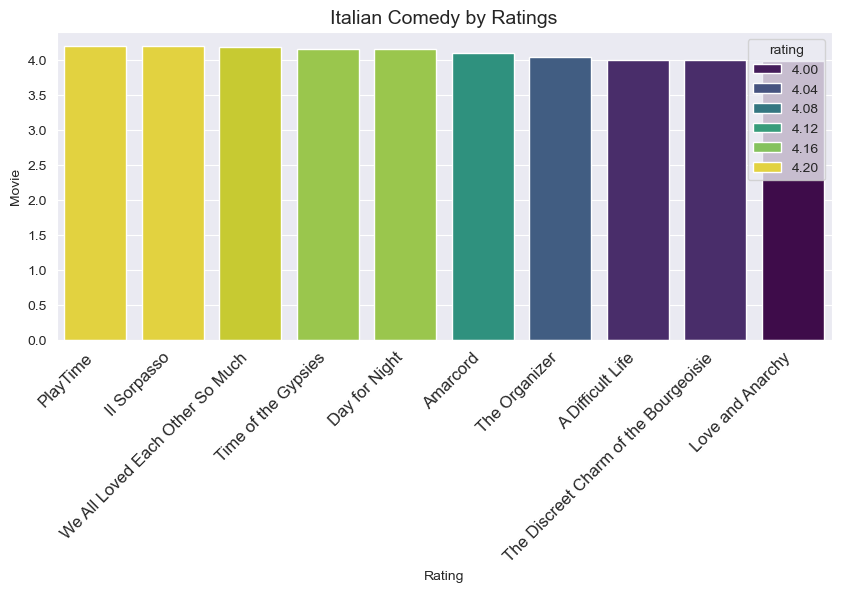

In [567]:
comedy = comedy.sort_values(by='rating', ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x='movie_title', y='rating', data=comedy.head(10), hue='rating', palette='viridis')
plt.title('Italian Comedy by Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

Enduring classics of Italian cinema and some of its most cherished comedies.

In [568]:
western = italian_gen.loc[italian_gen['genre'] == 'Western']
western

id                                        movie_title    date  \
1     1000445                     The Good, the Bad and the Ugly  1966.0   
8     1001069                       Once Upon a Time in the West  1968.0   
10    1001261                               A Fistful of Dollars  1964.0   
20    1001607                             For a Few Dollars More  1965.0   
119   1003746                                             Django  1966.0   
...       ...                                                ...     ...   
8079  1319705                        Revenge of the Black Knight  1963.0   
8563  1397283                                         Black Fury  1975.0   
9082  1545883                                        Bloody Days  1968.0   
9343  1757538              Sartana - Töten war sein täglich Brot  1970.0   
9354  1769832  L'Attaque de Fort Adams (Une aventure de Buffa...  1965.0   

                                                tagline  \
1     For three men the Civil War wasn't hell. It wa...   
8     The father of the spaghetti western returns ag...   
10    In his own way he is perhaps, the most dangero...   
20    The man with no name is back... the man in bla...   
119                     The movie that spawned a genre.   
...                                                 ...   
8079                                               None   
8563                                               None   
9082                                               None   
9343                                               None   
9354                                               None   

                                            description  minute  rating  \
1     While the Civil War rages on between the Union...   161.0    4.50   
8     A widow whose land and life are in danger as t...   166.0    4.39   
10    The Man With No Name enters the Mexican villag...    99.0    3.95   
20    Two bounty hunters are in pursuit of "El Indio...   132.0    4.20   
119   A coffin-dragging gunslinger and a prostitute ...    93.0    3.79   
...                                                 ...     ...     ...   
8079  La Cieca Di Sorrento (also known as Revenge of...   102.0     NaN   
8563  A working-class kid is mistaken for a rich Ame...    88.0     NaN   
9082                                               None    80.0     NaN   
9343                                               None    94.0     NaN   
9354                                               None     NaN     NaN   

      oscar_winner country  country_id    genre  genre_id  
1            False   Italy         623  Western      1198  
8            False   Italy        1516  Western      2856  
10           False   Italy        1834  Western      3387  
20           False   Italy        2348  Western      4307  
119          False   Italy        5630  Western      9653  
...            ...     ...         ...      ...       ...  
8079         False   Italy      321638  Western    503951  
8563         False   Italy      380083  Western    593962  
9082         False   Italy      481585  Western    745005  
9343         False   Italy      606806  Western    929260  
9354         False   Italy      613198  Western    938769  

[520 rows x 12 columns]

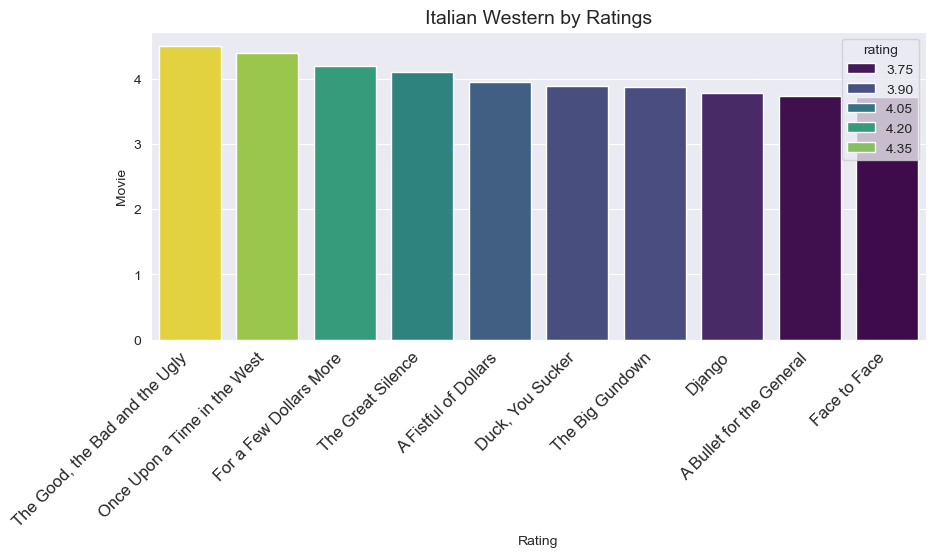

In [569]:
western = western.sort_values(by='rating', ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x='movie_title', y='rating', data=western.head(10), hue='rating', palette='viridis')
plt.title('Italian Western by Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

In [570]:
comedy_dir = pd.merge(comedy, directors, on='id', how='left')
comedy_dir = comedy_dir.drop('role', axis=1)
comedy_dir.rename(columns={'name': 'director'}, inplace=True)
comedy_dir

id                                movie_title    date  \
0     1001829                                   PlayTime  1967.0   
1     1005297                                Il Sorpasso  1962.0   
2     1006187            We All Loved Each Other So Much  1974.0   
3     1005647                        Time of the Gypsies  1988.0   
4     1003038                              Day for Night  1973.0   
...       ...                                        ...     ...   
2013  1846097                 Arsenico e vecchi merletti  1969.0   
2014  1864548                                 Hot Senses  1980.0   
2015  1864611                Una settimana come un'altra  1978.0   
2016  1891455                            Fatto su misura  1985.0   
2017  1922162  Lezioni di violoncello con toccata e fuga  1976.0   

                                 tagline  \
0                                   None   
1                                   None   
2               A many splendored thing.   
3                                   None   
4     A movie for people who love movies   
...                                  ...   
2013                                None   
2014                                None   
2015                                None   
2016                                None   
2017                                None   

                                            description  minute  rating  \
0     Clumsy Monsieur Hulot finds himself perplexed ...   115.0    4.20   
1     Roberto, a shy law student in Rome, meets Brun...   105.0    4.20   
2     Three partisans bound by a strong friendship r...   124.0    4.19   
3     In this luminous tale set in the former Yugosl...   142.0    4.17   
4     A committed film director struggles to complet...   116.0    4.17   
...                                                 ...     ...     ...   
2013                                               None     NaN     NaN   
2014  Sonia cares more about her job than her husban...    80.0     NaN   
2015                             A comedy feature film.    99.0     NaN   
2016                                               None   101.0     NaN   
2017                                               None    95.0     NaN   

      oscar_winner country  country_id   genre  genre_id            director  \
0            False   Italy        2687  Comedy      4869        Jacques Tati   
1            False   Italy        8037  Comedy     13503           Dino Risi   
2            False   Italy        9383  Comedy     15746        Ettore Scola   
3            False   Italy        8569  Comedy     14388      Emir Kusturica   
4             True   Italy        4511  Comedy      7875   François Truffaut   
...            ...     ...         ...     ...       ...                 ...   
2013         False   Italy      652458  Comedy    994530   Davide Montemurri   
2014         False   Italy      661068  Comedy   1006687       Arduino Sacco   
2015         False   Italy      661111  Comedy   1006744  Daniele Costantini   
2016         False   Italy      673600  Comedy   1023283  Francesco Laudadio   
2017         False   Italy      685465  Comedy   1038395   Davide Montemurri   

        crew_id  
0      115487.0  
1      257995.0  
2      287915.0  
3      270060.0  
4      171334.0  
...         ...  
2013  4532515.0  
2014  4570987.0  
2015  4571266.0  
2016  4628910.0  
2017  4683348.0  

[2018 rows x 14 columns]

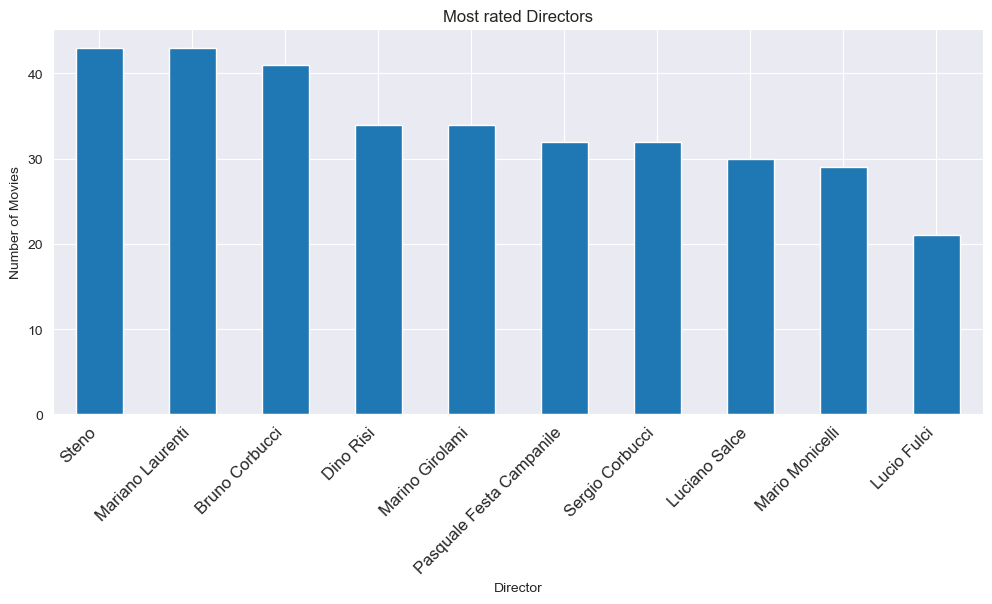

In [571]:
ax = comedy_dir['director'].value_counts().head(10) \
    .plot(kind='bar', title='Most rated Directors', figsize=(12, 5))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()

Eternal directors from the previous era continue to feature prominently, alongside the rising talents of a new generation.

In [572]:
western_dir = pd.merge(western, directors, on='id', how='left')
western_dir = western_dir.drop('role', axis=1)
western_dir.rename(columns={'name': 'director'}, inplace=True)
western_dir

id                                        movie_title    date  \
0    1000445                     The Good, the Bad and the Ugly  1966.0   
1    1001069                       Once Upon a Time in the West  1968.0   
2    1001607                             For a Few Dollars More  1965.0   
3    1004150                                  The Great Silence  1968.0   
4    1001261                               A Fistful of Dollars  1964.0   
..       ...                                                ...     ...   
549  1319705                        Revenge of the Black Knight  1963.0   
550  1397283                                         Black Fury  1975.0   
551  1545883                                        Bloody Days  1968.0   
552  1757538              Sartana - Töten war sein täglich Brot  1970.0   
553  1769832  L'Attaque de Fort Adams (Une aventure de Buffa...  1965.0   

                                               tagline  \
0    For three men the Civil War wasn't hell. It wa...   
1    The father of the spaghetti western returns ag...   
2    The man with no name is back... the man in bla...   
3                  His voice was the silence of death!   
4    In his own way he is perhaps, the most dangero...   
..                                                 ...   
549                                               None   
550                                               None   
551                                               None   
552                                               None   
553                                               None   

                                           description  minute  rating  \
0    While the Civil War rages on between the Union...   161.0    4.50   
1    A widow whose land and life are in danger as t...   166.0    4.39   
2    Two bounty hunters are in pursuit of "El Indio...   132.0    4.20   
3    A mute gunslinger fights in the defense of a g...   106.0    4.11   
4    The Man With No Name enters the Mexican villag...    99.0    3.95   
..                                                 ...     ...     ...   
549  La Cieca Di Sorrento (also known as Revenge of...   102.0     NaN   
550  A working-class kid is mistaken for a rich Ame...    88.0     NaN   
551                                               None    80.0     NaN   
552                                               None    94.0     NaN   
553                                               None     NaN     NaN   

     oscar_winner country  country_id    genre  genre_id             director  \
0           False   Italy         623  Western      1198         Sergio Leone   
1           False   Italy        1516  Western      2856         Sergio Leone   
2           False   Italy        2348  Western      4307         Sergio Leone   
3           False   Italy        6277  Western     10645      Sergio Corbucci   
4           False   Italy        1834  Western      3387         Sergio Leone   
..            ...     ...         ...      ...       ...                  ...   
549         False   Italy      321638  Western    503951          Nick Nostro   
550         False   Italy      380083  Western    593962      Demofilo Fidani   
551         False   Italy      481585  Western    745005  Lorenzo Gicca Palli   
552         False   Italy      606806  Western    929260                  NaN   
553         False   Italy      613198  Western    938769                  NaN   

       crew_id  
0      34992.0  
1      74927.0  
2     104937.0  
3     216443.0  
4      86388.0  
..         ...  
549  2791476.0  
550  3123660.0  
551  3676795.0  
552        NaN  
553        NaN  

[554 rows x 14 columns]

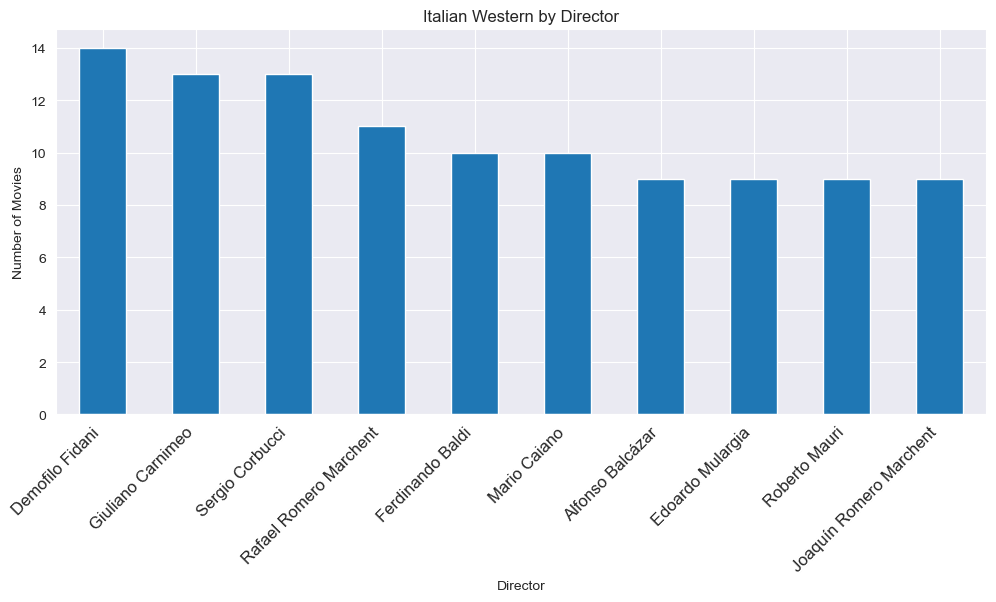

In [573]:
ax = western_dir['director'].value_counts().head(10) \
    .plot(kind='bar', title='Italian Western by Director', figsize=(12, 5))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()

The "Commedia all'italiana" confirms itself as the most widespread genre, affirming great Italian directors renowned throughout the world, such as Dino Risi, Mario Monicelli, Federico Fellini and Ettore Scola.
The Western, a genre that does not appear in the graph of the previous period, climbs the ranking of genres produced, placing itself in eighth place, highlighting great directors such as Sergio Leone and Sergio Corbucci.

In [574]:
italian_dir = pd.merge(italian_movies, directors, on='id', how='left')
italian_dir.rename(columns={'name': 'director'}, inplace=True)
italian_dir

id                                        movie_title    date  \
0     1000442                                           Suspiria  1977.0   
1     1000445                     The Good, the Bad and the Ugly  1966.0   
2     1000620                                    Cinema Paradiso  1988.0   
3     1000855                                                 8½  1963.0   
4     1000920                        Once Upon a Time in America  1984.0   
...       ...                                                ...     ...   
6814  1937206  Abbandonate ogni illusione, preparatevi alla l...  1969.0   
6815  1937206  Abbandonate ogni illusione, preparatevi alla l...  1969.0   
6816  1937239                                Dove sono i registi  1967.0   
6817  1937252                                          L'eccesso  1965.0   
6818  1937253                                    Identificazione  1965.0   

                                                tagline  \
0            The Most Frightening Film You'll Ever See!   
1     For three men the Civil War wasn't hell. It wa...   
2     A celebration of youth, friendship, and the ev...   
3     A picture that goes beyond what men think abou...   
4                    Crime, passion and lust for power.   
...                                                 ...   
6814                                               None   
6815                                               None   
6816                                               None   
6817                                               None   
6818                                               None   

                                            description  minute  rating  \
0     From the moment she arrives in Freiberg, Germa...    99.0    3.95   
1     While the Civil War rages on between the Union...   161.0    4.50   
2     A filmmaker recalls his childhood, when he fel...   124.0    4.45   
3     Guido Anselmi, a film director, finds himself ...   139.0    4.30   
4     A former Prohibition-era Jewish gangster retur...   229.0    4.21   
...                                                 ...     ...     ...   
6814  Lost film: Abandon all illusions, prepare for ...    40.0     NaN   
6815  Lost film: Abandon all illusions, prepare for ...    40.0     NaN   
6816  Whoever searches for them does not find them, ...    30.0     NaN   
6817  Those who run remain there, those who don't ru...    15.0     NaN   
6818            The sculptor is compared to the martyr.    15.0     NaN   

      oscar_winner country  country_id      role             director  \
0            False   Italy         617  Director        Dario Argento   
1            False   Italy         623  Director         Sergio Leone   
2             True   Italy         884  Director   Giuseppe Tornatore   
3            False   Italy        1209  Director     Federico Fellini   
4            False   Italy        1306  Director         Sergio Leone   
...            ...     ...         ...       ...                  ...   
6814         False   Italy      691013  Director         Marco Melani   
6815         False   Italy      691013  Director  Stefano Beccastrini   
6816         False   Italy      691029  Director   Gianfranco Brebbia   
6817         False   Italy      691037  Director   Gianfranco Brebbia   
6818         False   Italy      691038  Director   Gianfranco Brebbia   

        crew_id  
0       34714.0  
1       34992.0  
2       46425.0  
3       62544.0  
4       66495.0  
...         ...  
6814  4709691.0  
6815  4709692.0  
6816  4709769.0  
6817  4709821.0  
6818  4709822.0  

[6819 rows x 13 columns]

In [575]:
italian_dir = italian_dir[~(italian_dir['director'] == 'Claude Chabrol')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Jean-Luc Godard')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Philippe de Broca')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Édoua')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Jacques Deray')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Édouard Molinaro')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Henri Verneuil')]
italian_dir = italian_dir[~(italian_dir['director'] == 'André Hunebelle')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Theo Angelopoulos')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Jean-Pierre Melville')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Agnès Varda')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Jacques Tati')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Louis Malle')]
italian_dir = italian_dir[~(italian_dir['director'] == 'François Truffaut')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Alain Resnais')]
italian_dir = italian_dir[~(italian_dir['director'] == 'John Frankenheimer')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Orson Welles')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Robert Kramer')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Alain Robbe-Grillet')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Georges Lautner')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Claude Sautet')]
italian_dir = italian_dir[~(italian_dir['director'] == 'Costa-Gavras')]

Let's take a look to the italian directors with more movies made

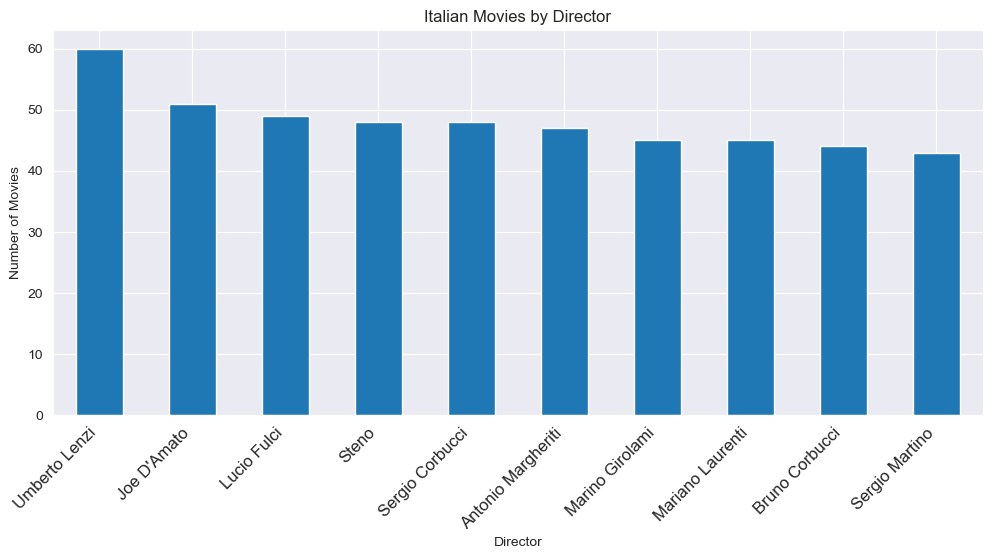

In [576]:
ax = italian_dir['director'].value_counts().head(10) \
    .plot(kind='bar', title='Italian Movies by Director', figsize=(12, 5))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()

Let's take a look to the directors of the most appreciated movies

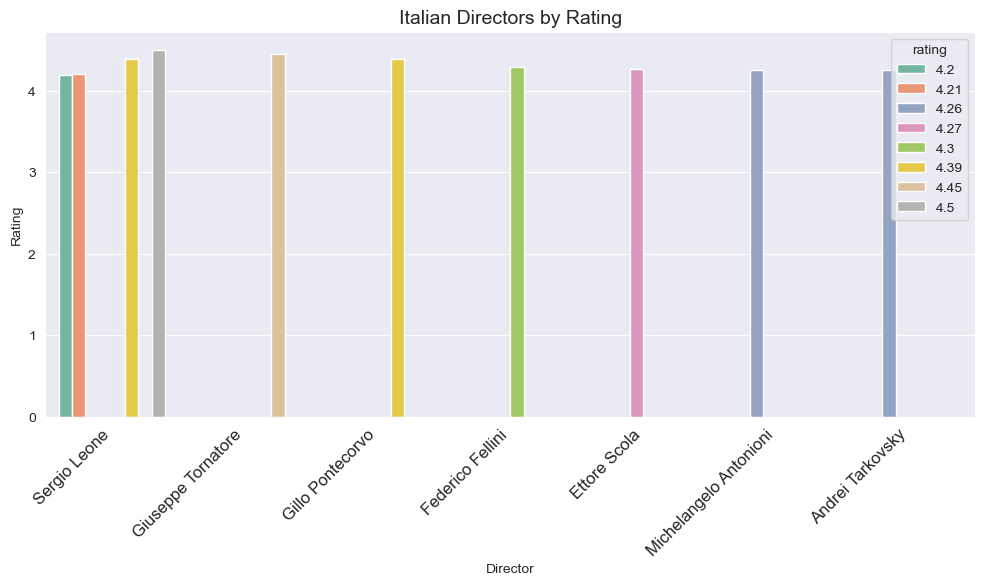

In [577]:
italian_dir = italian_dir.sort_values(by='rating', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='director', y='rating', data=italian_dir.head(10), hue='rating', palette='Set2')
plt.title('Italian Directors by Rating', fontsize=14)
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

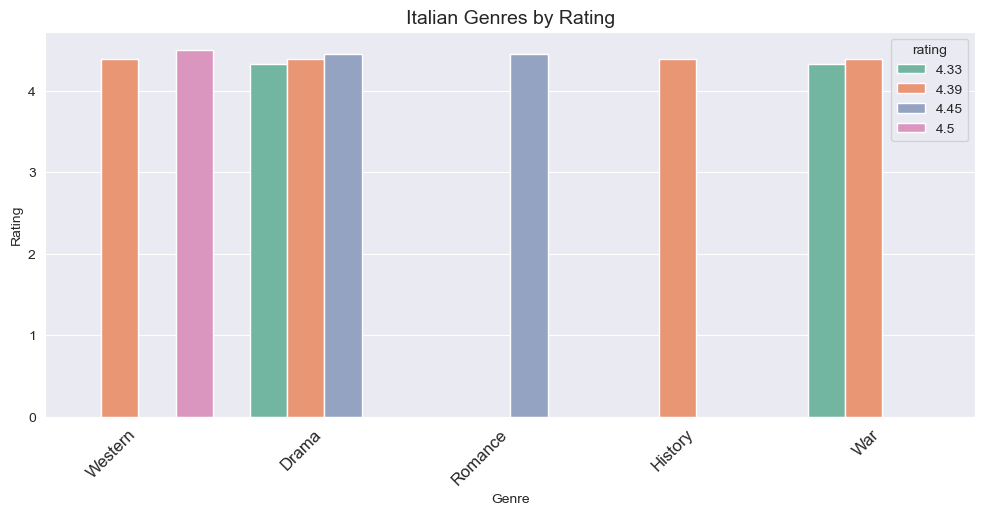

In [578]:
italian_gen = italian_gen.sort_values(by='rating', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='genre', y='rating', data=italian_gen.head(10), hue='rating', palette='Set2')
plt.title('Italian Genres by Rating', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

We therefore note that the most popular genres are Sergio Leone's Westerns, followed by the Dramas (Dramas movies or "Commedia all'italiana") of the great directors of the period.

In [579]:
italian_oscars = pd.merge(italian_movies, oscars_df, on=['movie_title'], how='inner')
italian_oscars = italian_oscars.loc[((italian_oscars['date'] > 1960) & (italian_oscars['date'] <= 1990) & (italian_oscars['year_film'] >= 1960) & (italian_oscars['year_film'] <= 1991))]
italian_oscars

id      movie_title    date  \
0    1000620  Cinema Paradiso  1988.0   
1    1001667          Blow-Up  1966.0   
2    1001667          Blow-Up  1966.0   
3    1001673          Serpico  1973.0   
4    1001673          Serpico  1973.0   
..       ...              ...     ...   
283  1317609    The Big Chill  1971.0   
291  1398095      Taras Bulba  1962.0   
292  1483232           Otello  1982.0   
295  1658419      That's Life  1986.0   
297  1921801              Duo  1979.0   

                                               tagline  \
0    A celebration of youth, friendship, and the ev...   
1    Sometimes, reality is the strangest fantasy of...   
2    Sometimes, reality is the strangest fantasy of...   
3    Many of his fellow officers considered him the...   
4    Many of his fellow officers considered him the...   
..                                                 ...   
283                                               None   
291                                               None   
292                                               None   
295                                               None   
297                                               None   

                                           description  minute  rating  \
0    A filmmaker recalls his childhood, when he fel...   124.0    4.45   
1    A successful mod photographer in London whose ...   111.0    3.84   
2    A successful mod photographer in London whose ...   111.0    3.84   
3    The real-life struggle of an honest New York C...   130.0    3.91   
4    The real-life struggle of an honest New York C...   130.0    3.91   
..                                                 ...     ...     ...   
283  A film about painting and its denial concernin...    20.0     NaN   
291  Italian adaptation of the historical novella o...    90.0     NaN   
292  Verdi's 'Otello', based on Shakespeare's famou...   145.0     NaN   
295  Theo Eshetu uses the manipulation of televisio...    12.0     NaN   
297  In this video performance I used one of the mo...    18.0     NaN   

     oscar_winner country  country_id                       _id  year_film  \
0            True   Italy         884  67de8c8cc8c9f9b21d2ef3e7       1989   
1           False   Italy        2442  67de8c8cc8c9f9b21d2eea4b       1966   
2           False   Italy        2442  67de8c8cc8c9f9b21d2eea8c       1966   
3           False   Italy        2454  67de8c8cc8c9f9b21d2eed15       1973   
4           False   Italy        2454  67de8c8cc8c9f9b21d2eed6f       1973   
..            ...     ...         ...                       ...        ...   
283         False   Italy      320016  67de8c8cc8c9f9b21d2ef195       1983   
291         False   Italy      380663  67de8c8cc8c9f9b21d2ee879       1962   
292         False   Italy      440334  67de8c8cc8c9f9b21d2ef295       1986   
295         False   Italy      551131  67de8c8cc8c9f9b21d2ef2bb       1986   
297         False   Italy      685198  67de8c8cc8c9f9b21d2eeb57       1968   

     year_ceremony  ceremony  \
0             1990        62   
1             1967        39   
2             1967        39   
3             1974        46   
4             1974        46   
..             ...       ...   
283           1984        56   
291           1963        35   
292           1987        59   
295           1987        59   
297           1969        41   

                                              category  \
0                                FOREIGN LANGUAGE FILM   
1                                            DIRECTING   
2    WRITING (Story and Screenplay--written directl...   
3                                                ACTOR   
4    WRITING (Screenplay--based on material from an...   
..                                                 ...   
283  WRITING (Screenplay Written Directly for the S...   
291        MUSIC (Music Score--substantially original)   
292                                     COSTUME DESIGN   
295                          

In [580]:
italian_oscars = italian_oscars.loc[italian_oscars['winner'] == True]

In [581]:
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'The Discreet Charm of the Bourgeoisie')]
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'Day for Night')]
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'Cleopatra')]
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'Beauty and the Beast')]
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'Doctor Zhivago')]
italian_oscars = italian_oscars[~(italian_oscars['movie_title'] == 'King Kong')]

In [582]:
italian_oscars

id                    movie_title    date  \
0   1000620                Cinema Paradiso  1988.0   
12  1002787               The Last Emperor  1987.0   
13  1002787               The Last Emperor  1987.0   
14  1002787               The Last Emperor  1987.0   
15  1002787               The Last Emperor  1987.0   
16  1002787               The Last Emperor  1987.0   
17  1002787               The Last Emperor  1987.0   
18  1002787               The Last Emperor  1987.0   
19  1002787               The Last Emperor  1987.0   
20  1002787               The Last Emperor  1987.0   
21  1002906                       Amarcord  1973.0   
56  1004793               Romeo and Juliet  1968.0   
57  1004793               Romeo and Juliet  1968.0   
94  1007908  Yesterday, Today and Tomorrow  1963.0   
97  1008871             Fellini's Casanova  1976.0   

                                              tagline  \
0   A celebration of youth, friendship, and the ev...   
12  He was the Lord of Ten Thousand Years, the abs...   
13  He was the Lord of Ten Thousand Years, the abs...   
14  He was the Lord of Ten Thousand Years, the abs...   
15  He was the Lord of Ten Thousand Years, the abs...   
16  He was the Lord of Ten Thousand Years, the abs...   
17  He was the Lord of Ten Thousand Years, the abs...   
18  He was the Lord of Ten Thousand Years, the abs...   
19  He was the Lord of Ten Thousand Years, the abs...   
20  He was the Lord of Ten Thousand Years, the abs...   
21                    The Fantastic World of Fellini!   
56                          No ordinary love story...   
57                          No ordinary love story...   
94  They're in Love Three Times and Three Ways...I...   
97  And Now... after four years of preparation and...   

                                          description  minute  rating  \
0   A filmmaker recalls his childhood, when he fel...   124.0    4.45   
12  A dramatic history of Pu Yi, the last of the E...   163.0    3.89   
13  A dramatic history of Pu Yi, the last of the E...   163.0    3.89   
14  A dramatic history of Pu Yi, the last of the E...   163.0    3.89   
15  A dramatic history of Pu Yi, the last of the E...   163.0    3.89   
16  A dramatic history of Pu Yi, the last of the E...   163.0    3.89   
17  A dramatic history of Pu Yi, the last of the E...   163.0    3.89   
18  A dramatic history of Pu Yi, the last of the E...   163.0    3.89   
19  A dramatic history of Pu Yi, the last of the E...   163.0    3.89   
20  A dramatic history of Pu Yi, the last of the E...   163.0    3.89   
21  In an Italian seaside town, young Titta gets i...   123.0    4.11   
56  Director Franco Zeffirelli's beloved version o...   138.0    3.53   
57  Director Franco Zeffirelli's beloved version o...   138.0    3.53   
94  Three tales of very different women using thei...   119.0    3.72   
97  Casanova is a libertine, collecting seductions...   155.0    3.60   

    oscar_winner country  country_id                       _id  year_film  \
0           True   Italy         884  67de8c8cc8c9f9b21d2ef3e7       1989   
12          True   Italy        4152  67de8c8cc8c9f9b21d2ef2f7       1987   
13          True   Italy        4152  67de8c8cc8c9f9b21d2ef2fd       1987   
14          True   Italy        4152  67de8c8cc8c9f9b21d2ef301       1987   
15          True   Italy        4152  67de8c8cc8c9f9b21d2ef306       1987   
16          True   Italy        4152  67de8c8cc8c9f9b21d2ef316       1987   
17          True   Italy        4152  67de8c8cc8c9f9b21d2ef321       1987   
18          True   Italy        4152  67de8c8cc8c9f9b21d2ef32c       1987   
19          True   Italy        4152  67de8c8cc8c9f9b21d2ef335       1987   
20          True   Italy        4152  67de8c8cc8c9f9b21d2ef33e       1987   
21          True   Italy        4333  67de8c8cc8c9f9b21d2eedb0       1974   
56         False   Italy        7262  67de8c8cc8c9f9b21d2eeb1e       1968   
57         False   Italy        7262  67de8c8cc8c9f9b21d2eeb2

In [583]:
italian_oscars.groupby('movie_title').count()

id  date  tagline  description  minute  rating  \
movie_title                                                                     
Amarcord                        1     1        1            1       1       1   
Cinema Paradiso                 1     1        1            1       1       1   
Fellini's Casanova              1     1        1            1       1       1   
Romeo and Juliet                2     2        2            2       2       2   
The Last Emperor                9     9        9            9       9       9   
Yesterday, Today and Tomorrow   1     1        1            1       1       1   

                               oscar_winner  country  country_id  _id  \
movie_title                                                             
Amarcord                                  1        1           1    1   
Cinema Paradiso                           1        1           1    1   
Fellini's Casanova                        1        1           1    1   
Romeo and Juliet                          2        2           2    2   
The Last Emperor                          9        9           9    9   
Yesterday, Today and Tomorrow             1        1           1    1   

                               year_film  year_ceremony  ceremony  category  \
movie_title                                                                   
Amarcord                               1              1         1         1   
Cinema Paradiso                        1              1         1         1   
Fellini's Casanova                     1              1         1         1   
Romeo and Juliet                       2              2         2         2   
The Last Emperor                       9              9         9         9   
Yesterday, Today and Tomorrow          1              1         1         1   

                               name  winner  
movie_title                                  
Amarcord                          1       1  
Cinema Paradiso                   1       1  
Fellini's Casanova                1       1  
Romeo and Juliet                  2       2  
The Last Emperor                  9       9  
Yesterday, Today and Tomorrow     1       1

Throughout this timeframe, Italian cinema was awarded a total of 15 Oscars. Notably, 9 of these awards were secured by a single film: 'The Last Emperor' (1987), directed by Bernardo Bertolucci.

Let's see a comparison of appreciation between Italian films (or Italian co-productions) and the rest of the films

In [620]:
italians = pd.merge(modern_df, countries_df, on='id', how='left')
modern_df.loc[:, 'ita'] = italians['country'] == 'Italy'
modern_df

id                      movie_title    date tagline  \
704     1940794                         Ninja Ko  1990.0    None   
705     1940795                            踏尽江湖路  1990.0    None   
706     1940796                 The Perfect Date  1990.0    None   
707     1940797                   Over The Limit  1990.0    None   
708     1940798                All That Glitters  1990.0    None   
...         ...                              ...     ...     ...   
938788  1937294                 The Great Kurobe  1961.0    None   
938789  1937295                         Mexico 1  1961.0    None   
938790  1937296                         Mexico 2  1961.0    None   
938791  1937297  Mexico: The Land and the People  1961.0    None   
938792  1937298             Werbung im Fernsehen  1961.0    None   

                                              description  minute  rating  \
704     Ninja Ko runs into trouble somewhere in the tr...     4.0     NaN   
705                                                  None    94.0     NaN   
706     16-year-old student is convinced his upcoming ...    60.0     NaN   
707     A high-school student debates whether to come ...    60.0     NaN   
708     A group of high school students learn about et...    60.0     NaN   
...                                                   ...     ...     ...   
938788                                               None    41.0     NaN   
938789  Soundtrack:  Carlos Chávez's XOCHIPILLI, AN IM...    20.0     NaN   
938790  Soundtrack:  Manuel de Falla's HOMENAJE, POUR ...    13.0     NaN   
938791  This film portrays the changes that are taking...    20.0     NaN   
938792  Short educational film about advertising, show...     9.0     NaN   

        oscar_winner    ita  
704            False  False  
705            False  False  
706            False  False  
707            False  False  
708            False  False  
...              ...    ...  
938788         False    NaN  
938789         False    NaN  
938790         False    NaN  
938791         False    NaN  
938792         False    NaN  

[144810 rows x 9 columns]

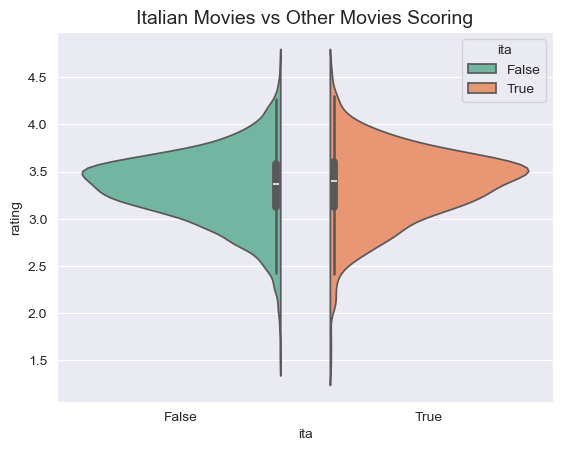

In [585]:
sns.violinplot(x='ita', y='rating', data=modern_df, hue='ita', palette='Set2', split=True)
plt.title('Italian Movies vs Other Movies Scoring', fontsize=14)
plt.show()

Rotten Tomatoes.

In [586]:
italians = pd.merge(modern_df, countries_df, on='id', how='left')
it = pd.merge(italians, review_df, on='movie_title', how='left')
modern_df.loc[:, 'ita'] = it['country'] == 'Italy'
modern_df

id                      movie_title    date tagline  \
704     1940794                         Ninja Ko  1990.0    None   
705     1940795                            踏尽江湖路  1990.0    None   
706     1940796                 The Perfect Date  1990.0    None   
707     1940797                   Over The Limit  1990.0    None   
708     1940798                All That Glitters  1990.0    None   
...         ...                              ...     ...     ...   
938788  1937294                 The Great Kurobe  1961.0    None   
938789  1937295                         Mexico 1  1961.0    None   
938790  1937296                         Mexico 2  1961.0    None   
938791  1937297  Mexico: The Land and the People  1961.0    None   
938792  1937298             Werbung im Fernsehen  1961.0    None   

                                              description  minute  rating  \
704     Ninja Ko runs into trouble somewhere in the tr...     4.0     NaN   
705                                                  None    94.0     NaN   
706     16-year-old student is convinced his upcoming ...    60.0     NaN   
707     A high-school student debates whether to come ...    60.0     NaN   
708     A group of high school students learn about et...    60.0     NaN   
...                                                   ...     ...     ...   
938788                                               None    41.0     NaN   
938789  Soundtrack:  Carlos Chávez's XOCHIPILLI, AN IM...    20.0     NaN   
938790  Soundtrack:  Manuel de Falla's HOMENAJE, POUR ...    13.0     NaN   
938791  This film portrays the changes that are taking...    20.0     NaN   
938792  Short educational film about advertising, show...     9.0     NaN   

        oscar_winner    ita  
704            False  False  
705            False  False  
706            False  False  
707            False  False  
708            False  False  
...              ...    ...  
938788         False    NaN  
938789         False    NaN  
938790         False    NaN  
938791         False    NaN  
938792         False    NaN  

[144810 rows x 9 columns]

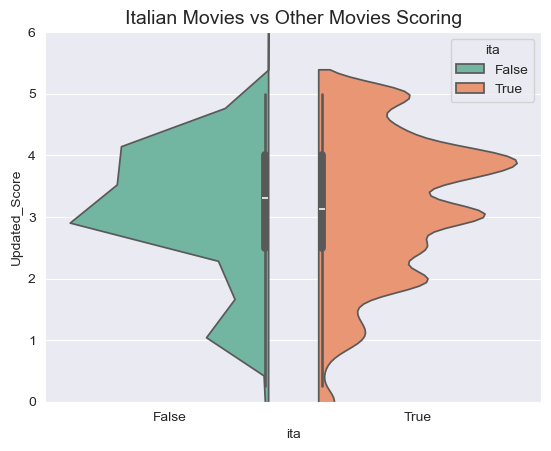

In [587]:
sns.violinplot(x='ita', y='Updated_Score', data=it, hue='ita', palette='Set2', split=True)
plt.title('Italian Movies vs Other Movies Scoring', fontsize=14)
plt.ylim(0,6)
plt.show()

The graphs show a high level of appreciation for Italian cinema even in this period.

### The New Hollywood and American Genre Cinema

The period between 1960 and 1990 is a great period for American cinema, characterized by three decades that revolutionized cinema worldwide:
- 1960-70: The Birth of the New Hollywood, with the cinema of Stanley Kubrick (Dr. Strangelove, 2001) and Polansky (Rosemary's Baby)
- 1970-80: The Golden Age of the New Hollywood, with the affirmation of directors such as Martin Scorsese (Taxi Driver), Francis Ford Coppola (The Godfather) and the romantic comedies of Woody Allen (Annie Hall, Manhattan), and the birth of the Blockbuster, with films such as Jaws and Indiana Jones (Spielberg), Star Wars (Lucas) and Superman (Donner).
- 1980-1990: The Blockbuster Era marks a globalization of American cinema worldwide, with titles such as E.T., Indiana Jones (Spielberg), Back to the Future (Zemeckis), and Ghost Busters (Reitman).

In [588]:
am = pd.merge(modern_df, countries_df, on='id', how='left')
american_movies = am.loc[am['country'] == 'USA']
american_movies = american_movies.drop('ita', axis=1)
american_movies

id                                        movie_title    date  \
0       1940794                                           Ninja Ko  1990.0   
2       1940796                                   The Perfect Date  1990.0   
3       1940797                                     Over The Limit  1990.0   
4       1940798                                  All That Glitters  1990.0   
5       1940799                                   A Town's Revenge  1989.0   
...         ...                                                ...     ...   
156349  1937274     Space Science: Comets, Meteors, and Planetoids  1963.0   
156355  1937280                      Climates of the United States  1962.0   
156356  1937281                               Getting Into College  1962.0   
156361  1937286  Sponges and Coelenterates: Porous and Sac-Like...  1962.0   
156362  1937287                              We Explore Ocean Life  1962.0   

       tagline                                        description  minute  \
0         None  Ninja Ko runs into trouble somewhere in the tr...     4.0   
2         None  16-year-old student is convinced his upcoming ...    60.0   
3         None  A high-school student debates whether to come ...    60.0   
4         None  A group of high school students learn about et...    60.0   
5         None  A teenager who tries to convince his town to f...    60.0   
...        ...                                                ...     ...   
156349    None  Shows how the spectroscope, radio and optical ...    10.0   
156355    None  Describes the eight major climatic regions of ...    10.0   
156356    None  Illustrates the importance of planning early a...    13.0   
156361    None  Studies the life cycles of sponges and coelent...    10.0   
156362    None  Explores the coral reef and the ocean floor sh...    10.0   

        rating  oscar_winner country  country_id  
0          NaN         False     USA    692650.0  
2          NaN         False     USA    692652.0  
3          NaN         False     USA    692653.0  
4          NaN         False     USA    692654.0  
5          NaN         False     USA    692655.0  
...        ...           ...     ...         ...  
156349     NaN         False     USA    691048.0  
156355     NaN         False     USA    691053.0  
156356     NaN         False     USA    691054.0  
156361     NaN         False     USA    691057.0  
156362     NaN         False     USA    691058.0  

[22501 rows x 10 columns]

Let's start analysing the genres that dominated this Period

In [589]:
american_gen = pd.merge(american_movies, genres_df, on='id', how='left')
american_gen

id                                        movie_title    date  \
0      1940794                                           Ninja Ko  1990.0   
1      1940796                                   The Perfect Date  1990.0   
2      1940797                                     Over The Limit  1990.0   
3      1940798                                  All That Glitters  1990.0   
4      1940799                                   A Town's Revenge  1989.0   
...        ...                                                ...     ...   
40285  1937274     Space Science: Comets, Meteors, and Planetoids  1963.0   
40286  1937280                      Climates of the United States  1962.0   
40287  1937281                               Getting Into College  1962.0   
40288  1937286  Sponges and Coelenterates: Porous and Sac-Like...  1962.0   
40289  1937287                              We Explore Ocean Life  1962.0   

      tagline                                        description  minute  \
0        None  Ninja Ko runs into trouble somewhere in the tr...     4.0   
1        None  16-year-old student is convinced his upcoming ...    60.0   
2        None  A high-school student debates whether to come ...    60.0   
3        None  A group of high school students learn about et...    60.0   
4        None  A teenager who tries to convince his town to f...    60.0   
...       ...                                                ...     ...   
40285    None  Shows how the spectroscope, radio and optical ...    10.0   
40286    None  Describes the eight major climatic regions of ...    10.0   
40287    None  Illustrates the importance of planning early a...    13.0   
40288    None  Studies the life cycles of sponges and coelent...    10.0   
40289    None  Explores the coral reef and the ocean floor sh...    10.0   

       rating  oscar_winner country  country_id        genre   genre_id  
0         NaN         False     USA    692650.0          NaN        NaN  
1         NaN         False     USA    692652.0        Drama  1046324.0  
2         NaN         False     USA    692653.0        Drama  1046325.0  
3         NaN         False     USA    692654.0        Drama  1046326.0  
4         NaN         False     USA    692655.0        Drama  1046327.0  
...       ...           ...     ...         ...          ...        ...  
40285     NaN         False     USA    691048.0  Documentary  1044435.0  
40286     NaN         False     USA    691053.0  Documentary  1044440.0  
40287     NaN         False     USA    691054.0  Documentary  1044441.0  
40288     NaN         False     USA    691057.0  Documentary  1044445.0  
40289     NaN         False     USA    691058.0  Documentary  1044446.0  

[40290 rows x 12 columns]

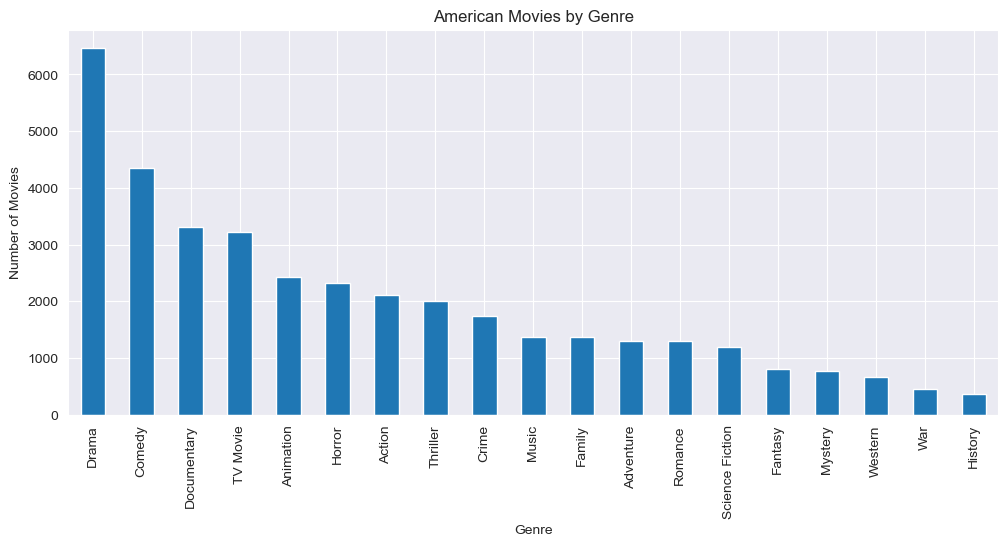

In [590]:
ax = american_gen['genre'].value_counts() \
    .plot(kind='bar', title='American Movies by Genre', figsize=(12, 5))
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Movies')
plt.show()

Drama and Comedy genres dominate the period, but Horror, Action, Thriller and even Sci-Fi films also stand out

Let's now see the evolution of appreciation in these years.

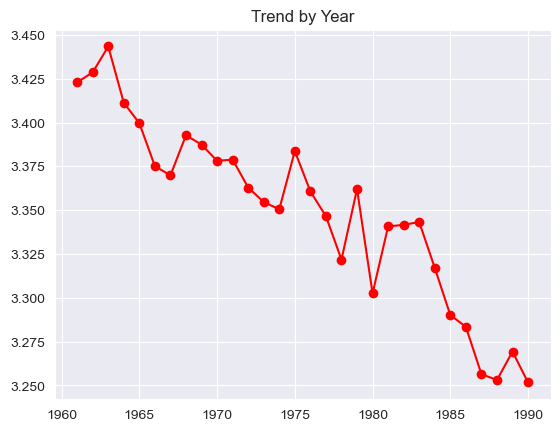

<Figure size 1200x600 with 0 Axes>

In [591]:
counters = modern_df.groupby('date')['rating'].mean()

plt.plot(counters.index, counters, marker='o', linestyle='-', color='red')
plt.title('Trend by Year')
plt.figure(figsize=(12,6))
plt.show()

In [592]:
simple = modern_df[['id', 'movie_title', 'date']]
counters = pd.merge(simple, review_df, on='movie_title', how='inner')
counters = counters.groupby('date')['Updated_Score'].mean()

The rating generally appears to decline from the beginning of the period to the end.

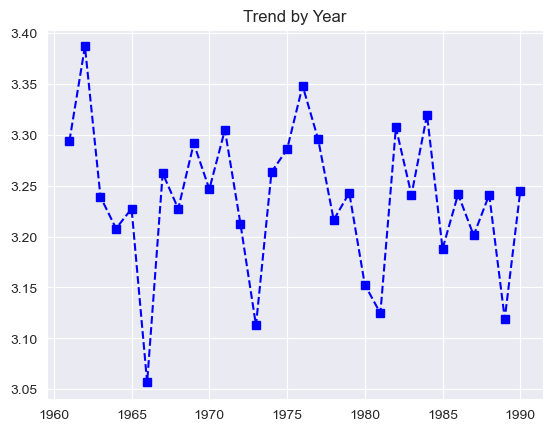

<Figure size 1200x600 with 0 Axes>

In [593]:
plt.plot(counters.index, counters, marker='s', linestyle='--', color='blue')
plt.title('Trend by Year')
plt.figure(figsize=(12,6))
plt.show()

The Rotten Tomatoes ratings, on the other hand, are more mixed, with numerous ups and downs.

Let's see the Studios with more movies produced

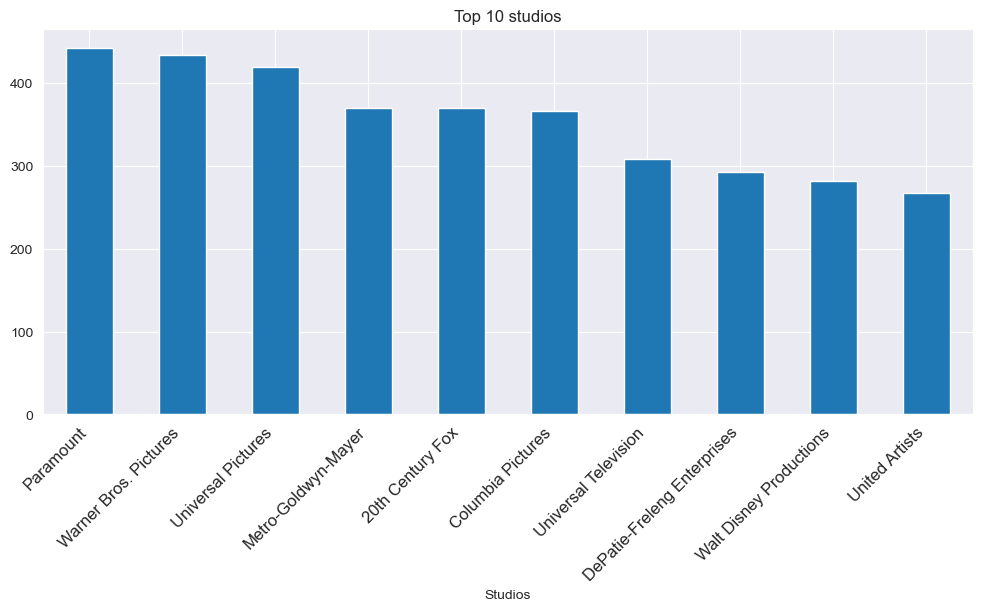

In [594]:
american_studios = pd.merge(american_movies, studios_df, on='id', how='left')
ax = american_studios['studio'].value_counts().head(10) \
    .plot(kind='bar', title='Top 10 studios', figsize=(12, 5))
ax.set_xlabel('Studios')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

Let's see the 10 most famous actors of the time

In [595]:
american_actors = pd.merge(american_movies, actors_df, on='id', how='left')
american_actors

id                                        movie_title    date  \
0       1940794                                           Ninja Ko  1990.0   
1       1940796                                   The Perfect Date  1990.0   
2       1940796                                   The Perfect Date  1990.0   
3       1940796                                   The Perfect Date  1990.0   
4       1940796                                   The Perfect Date  1990.0   
...         ...                                                ...     ...   
285959  1937274     Space Science: Comets, Meteors, and Planetoids  1963.0   
285960  1937280                      Climates of the United States  1962.0   
285961  1937281                               Getting Into College  1962.0   
285962  1937286  Sponges and Coelenterates: Porous and Sac-Like...  1962.0   
285963  1937287                              We Explore Ocean Life  1962.0   

       tagline                                        description  minute  \
0         None  Ninja Ko runs into trouble somewhere in the tr...     4.0   
1         None  16-year-old student is convinced his upcoming ...    60.0   
2         None  16-year-old student is convinced his upcoming ...    60.0   
3         None  16-year-old student is convinced his upcoming ...    60.0   
4         None  16-year-old student is convinced his upcoming ...    60.0   
...        ...                                                ...     ...   
285959    None  Shows how the spectroscope, radio and optical ...    10.0   
285960    None  Describes the eight major climatic regions of ...    10.0   
285961    None  Illustrates the importance of planning early a...    13.0   
285962    None  Studies the life cycles of sponges and coelent...    10.0   
285963    None  Explores the coral reef and the ocean floor sh...    10.0   

        rating  oscar_winner country  country_id            name  \
0          NaN         False     USA    692650.0             NaN   
1          NaN         False     USA    692652.0  Richard Murphy   
2          NaN         False     USA    692652.0      Lycia Naff   
3          NaN         False     USA    692652.0  James Sutorius   
4          NaN         False     USA    692652.0  Marnie Mosiman   
...        ...           ...     ...         ...             ...   
285959     NaN         False     USA    691048.0             NaN   
285960     NaN         False     USA    691053.0             NaN   
285961     NaN         False     USA    691054.0             NaN   
285962     NaN         False     USA    691057.0             NaN   
285963     NaN         False     USA    691058.0             NaN   

                   role   actor_id  
0                   NaN        NaN  
1       Stephen Sanders  5796197.0  
2       Bernice Sherman  5796198.0  
3           Mr. Sanders  5796199.0  
4          Mrs. Sanders  5796200.0  
...                 ...        ...  
285959              NaN        NaN  
285960              NaN        NaN  
285961              NaN        NaN  
285962              NaN        NaN  
285963              NaN        NaN  

[285964 rows x 13 columns]

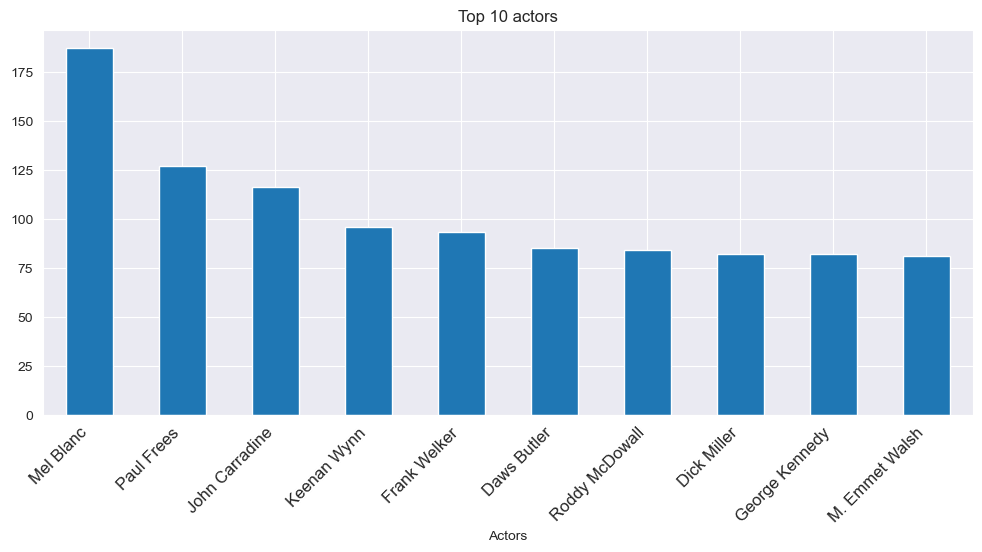

In [596]:
ax = american_actors['name'].value_counts().head(10) \
    .plot(kind='bar', title='Top 10 actors', figsize=(12, 5))
ax.set_xlabel('Actors')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

Let's now look at a map of the countries with the most production:

In [597]:
modern_countries = pd.merge(modern_df, countries_df, on='id', how='inner')
modern_countries

id            movie_title    date tagline  \
0       1940794               Ninja Ko  1990.0    None   
1       1940795                  踏尽江湖路  1990.0    None   
2       1940796       The Perfect Date  1990.0    None   
3       1940797         Over The Limit  1990.0    None   
4       1940798      All That Glitters  1990.0    None   
...         ...                    ...     ...     ...   
122683  1937287  We Explore Ocean Life  1962.0    None   
122684  1937290             Wonsullang  1961.0    None   
122685  1937291       Person Number...  1961.0    None   
122686  1937292                 A Star  1961.0    None   
122687  1937294       The Great Kurobe  1961.0    None   

                                              description  minute  rating  \
0       Ninja Ko runs into trouble somewhere in the tr...     4.0     NaN   
1                                                    None    94.0     NaN   
2       16-year-old student is convinced his upcoming ...    60.0     NaN   
3       A high-school student debates whether to come ...    60.0     NaN   
4       A group of high school students learn about et...    60.0     NaN   
...                                                   ...     ...     ...   
122683  Explores the coral reef and the ocean floor sh...    10.0     NaN   
122684                                               None   120.0     NaN   
122685                                 Short documentary.    13.0     NaN   
122686                                               None     NaN     NaN   
122687                                               None    41.0     NaN   

        oscar_winner    ita      country  country_id  
0              False  False          USA      692650  
1              False  False        China      692651  
2              False  False          USA      692652  
3              False  False          USA      692653  
4              False  False          USA      692654  
...              ...    ...          ...         ...  
122683         False    NaN          USA      691058  
122684         False    NaN  South Korea      691059  
122685         False    NaN   Yugoslavia      691060  
122686         False    NaN  South Korea      691061  
122687         False    NaN        Japan      691062  

[122688 rows x 11 columns]

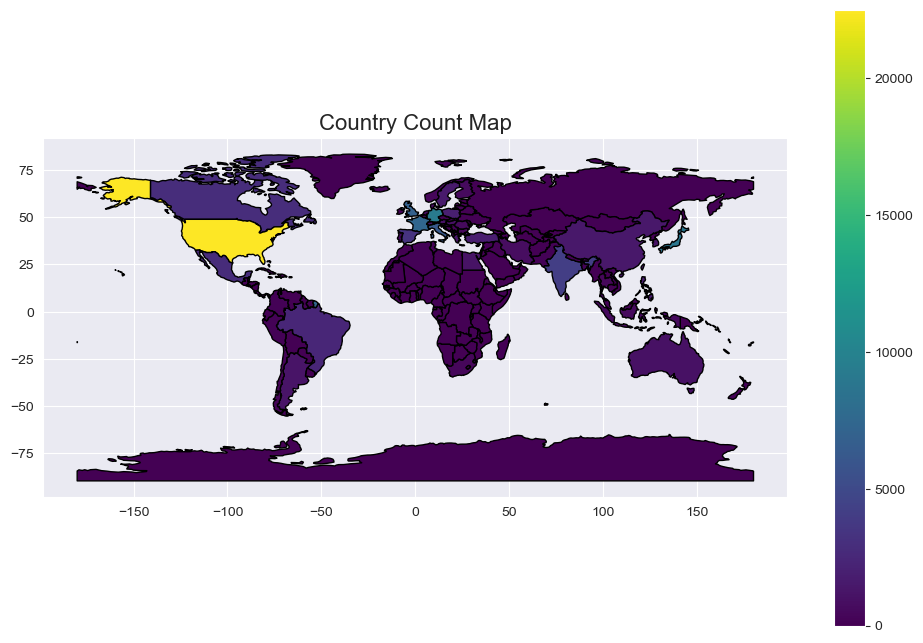

In [598]:
# Aggregate the count of occurrences for each country
country_counts = modern_countries['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

world_data = countries_gdf.merge(country_counts, left_on='ADMIN', right_on='country', how='left')
world_data['count'] = world_data['count'].fillna(0)
#world_data_gdf = countries_gdf.merge(world_data_df, left_on='ADMIN', right_on='Country/Region', how='left')

# Plot the map with a color gradient based on the 'count' column
world_data.plot(column='count', cmap='viridis', legend=True, figsize=(12, 8), edgecolor='black')

# Add a title and display the map
plt.title('Country Count Map', fontsize=16)
plt.show()

We can note that the United States remains the market leader, followed again by Italy, France, Spain, the United Kingdom and Japan. However, we note a production peak for some South American countries, China and especially India with Bollywood productions.

## Contemporary Cinema (1990 - Today)

First, let's compare the average length of films produced at the beginning of the twentieth century with those made towards the end of the century and today.

In [599]:
contemporary_df = movies_df.loc[(movies_df['date'] >= 1990)]
contemporary_df.tail()

id                                        movie_title    date  \
941582  1940087                                          Dad Jokes  2024.0   
941583  1940088                DIAMOND TEMA vs ASRIN TOK "Şeriat?"  2024.0   
941584  1940089                                          Dreamcoin  2024.0   
941585  1940128                                       Intersection  2024.0   
941586  1940090  Have A Word: The Red Bull Soapbox Special - Ep...  2024.0   

                                    tagline  \
941582                                 None   
941583  DIAMOND TEMA vs ASRIN TOK "Şeriat?"   
941584                                 None   
941585                                 None   
941586          Willpower and Gorilla Tape®   

                                              description  minute  rating  
941582  Dad Jokes is a docu-special directed by Daniel...    58.0     NaN  
941583   Diamond Tema and Asrın Tok debating about sharia   133.0     NaN  
941584                                               None   113.0     NaN  
941585  Inside the control room of a traffic light, th...    11.0     NaN  
941586  The lads build their prototype soapbox to comp...    65.0     NaN

In [600]:
contemporary_df['minute'].describe()

count    521061.000000
mean         67.923276
std         181.037863
min           1.000000
25%          15.000000
50%          61.000000
75%          92.000000
max       72000.000000
Name: minute, dtype: float64

In [601]:
contemporary_df_try = contemporary_df.loc[(contemporary_df['minute'] <= 240)]

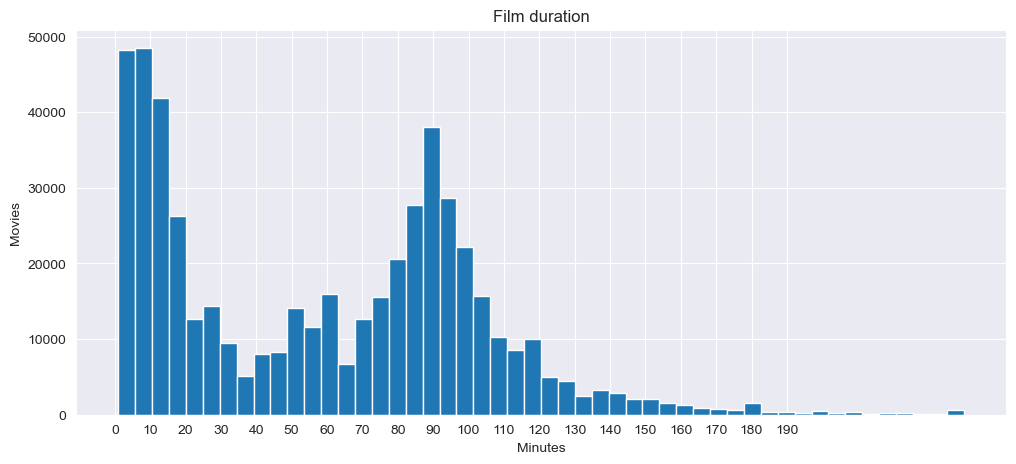

In [602]:
cx = contemporary_df_try['minute'].plot(kind = 'hist', bins = 50, title = "Film duration", figsize = (12,5))
cx.set_xlabel('Minutes')
cx.set_ylabel('Movies')
plt.xticks(np.arange(0, 200, 10))
plt.show()

Distribution of films produced from 1990 to today, with their respective durations.

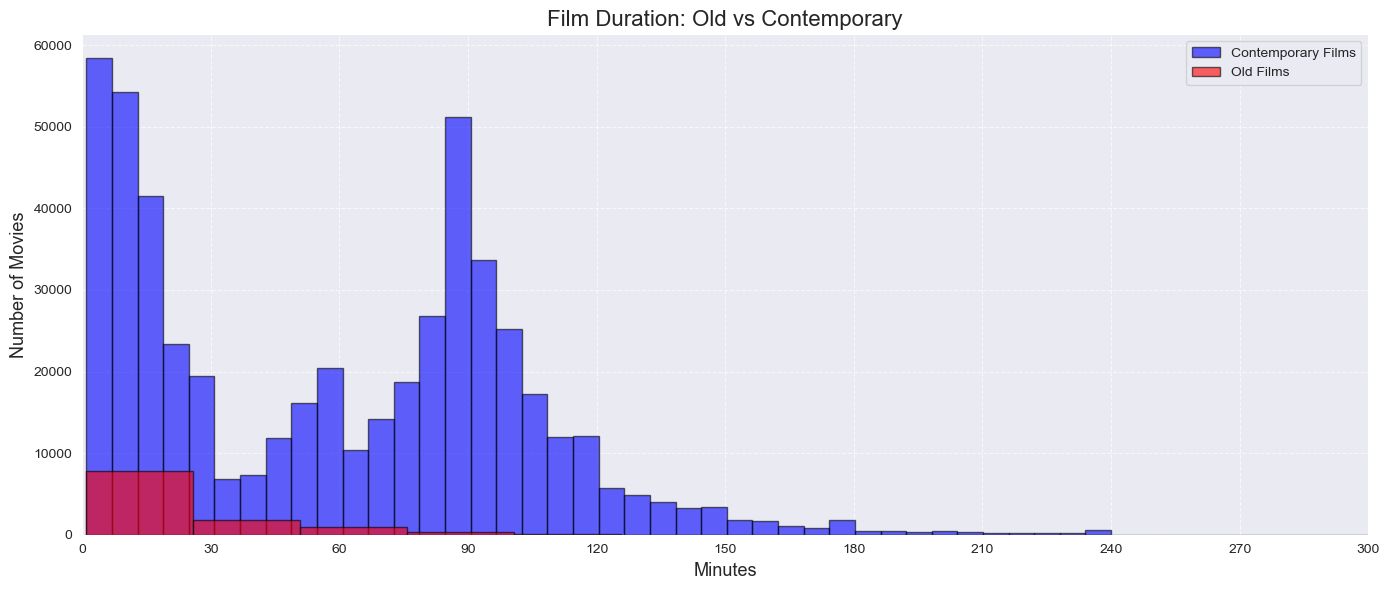

In [603]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 6))

plt.hist(
    contemporary_df_try['minute'],
    bins=40,
    alpha=0.6,
    label="Contemporary Films",
    color='blue',
    edgecolor='black'
)

plt.hist(
    birth_df['minute'],
    bins=40,
    alpha=0.6,
    label="Old Films",
    color='red',
    edgecolor='black'
)

plt.title("Film Duration: Old vs Contemporary", fontsize=16)
plt.xlabel("Minutes", fontsize=13)
plt.ylabel("Number of Movies", fontsize=13)
plt.xlim(0, 300)
plt.xticks(np.arange(0, 301, 30))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The comparison between films from 1900 and contemporary ones highlights a significant evolution in the average duration of film productions. Today, 90 minutes represents the minimum standard for a feature film.


In the current context, in which social media and digital platforms increasingly promote short and easily accessible content, it is interesting to ask ourselves how the length of a film can influence public perception. For this reason let us now try to analyze the relationship between duration and rating. The goal is to understand whether, similarly to the world of social content, there is a preference towards shorter films.

In [604]:
contemporary_feature_film = contemporary_df_try.loc[(contemporary_df['minute'] >= 60) & (contemporary_df['minute'] <= 240)]

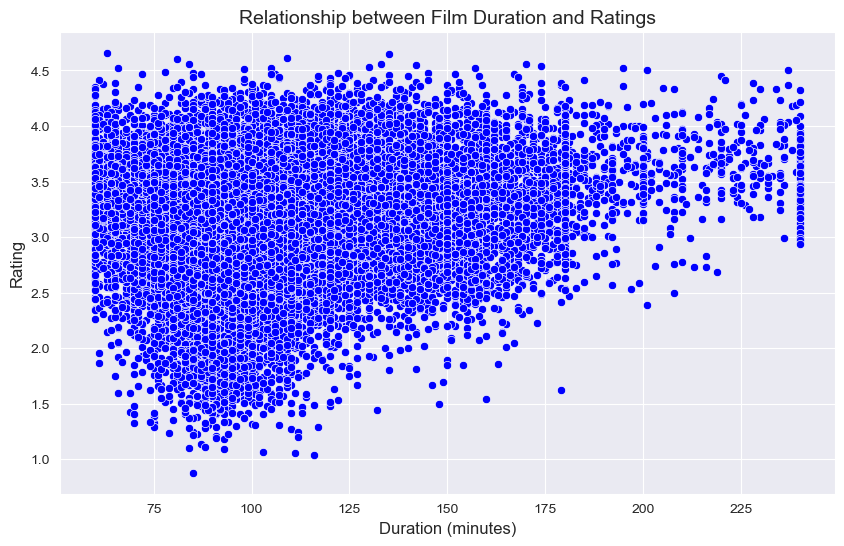

In [605]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='minute', y='rating', data=contemporary_feature_film, alpha=1, color="blue"
)
plt.title("Relationship between Film Duration and Ratings", fontsize=14)
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.grid(True)
plt.show()

We note the absence of a clear relationship between duration and rating in this case. This graph therefore suggests that the quality of a film does not depend exclusively on its length but rather on other factors such as plot, direction and genre.

In [606]:
contemporary_genre = pd.merge(contemporary_feature_film, genres_df, on='id', how='left')
contemporary_genre

id                                        movie_title    date  \
0       1940092      UEFA Euro 2024 - Group A: Germany vs Scotland  2024.0   
1       1940107                             Uzeda - Do It Yourself  2024.0   
2       1940107                             Uzeda - Do It Yourself  2024.0   
3       1940116                                         Glory Hole  2024.0   
4       1940116                                         Glory Hole  2024.0   
...         ...                                                ...     ...   
423915  1940088                DIAMOND TEMA vs ASRIN TOK "Şeriat?"  2024.0   
423916  1940089                                          Dreamcoin  2024.0   
423917  1940089                                          Dreamcoin  2024.0   
423918  1940089                                          Dreamcoin  2024.0   
423919  1940090  Have A Word: The Red Bull Soapbox Special - Ep...  2024.0   

                                    tagline  \
0                                      None   
1                                      None   
2                                      None   
3                                      None   
4                                      None   
...                                     ...   
423915  DIAMOND TEMA vs ASRIN TOK "Şeriat?"   
423916                                 None   
423917                                 None   
423918                                 None   
423919          Willpower and Gorilla Tape®   

                                              description  minute  rating  \
0       Germany plays Scotland in Group A match for UE...   100.0     NaN   
1                                                    None   102.0     NaN   
2                                                    None   102.0     NaN   
3       An entrepreneur from Caserta becomes entangled...    95.0     NaN   
4       An entrepreneur from Caserta becomes entangled...    95.0     NaN   
...                                                   ...     ...     ...   
423915   Diamond Tema and Asrın Tok debating about sharia   133.0     NaN   
423916                                               None   113.0     NaN   
423917                                               None   113.0     NaN   
423918                                               None   113.0     NaN   
423919  The lads build their prototype soapbox to comp...    65.0     NaN   

              genre   genre_id  
0               NaN        NaN  
1             Music  1045602.0  
2       Documentary  1045603.0  
3          Thriller  1045614.0  
4             Drama  1045615.0  
...             ...        ...  
423915  Documentary  1045573.0  
423916       Comedy  1045574.0  
423917       Action  1045575.0  
423918        Drama  1045576.0  
423919          NaN        NaN  

[423920 rows x 9 columns]

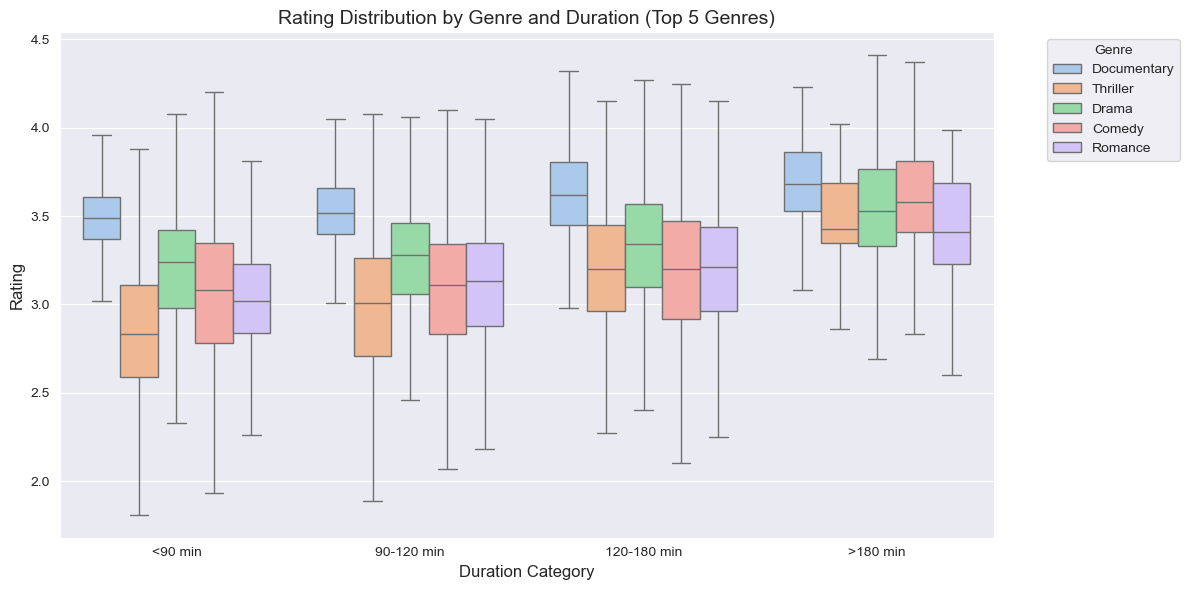

In [607]:
# Creazione della colonna delle categorie di durata, se non già presente
contemporary_genre['minute'] = pd.cut(
    contemporary_genre['minute'], bins=[0, 90, 120, 180, 240],
    labels=['<90 min', '90-120 min', '120-180 min', '>180 min']
)

top_genres = contemporary_genre['genre'].value_counts().head(5).index
filtered_data = contemporary_genre[contemporary_genre['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='minute', y='rating', hue='genre', data=filtered_data,
    palette='pastel', showfliers=False  # Palette più chiara e rimozione degli outlier
)

plt.title("Rating Distribution by Genre and Duration (Top 5 Genres)", fontsize=14)
plt.xlabel("Duration Category", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Comedy and Drama have a very wide distribution of ratings across all length categories, indicating significant variability in the perceived quality of these films.

Documentaries show a greater consistency in ratings, with high medians (around 3.5) and a narrower distribution, especially in the <90 min category.

Thriller films show a highly variable rating distribution, with a polarization between high-quality works and less well-regarded films. Length does not appear to have a significant impact, although longer films tend to be more uniform.

Romance films, on the contrary, have a more concentrated distribution around average values (around 3.0), with fewer negative outliers than Thrillers.

Let's now see which of these won the Oscar and consequently their duration and their rating

In [608]:
contemporary_feature_film_with_filmname = contemporary_feature_film.rename(columns={'name':'movie_title'})
contemporary_feature_film_with_filmname

id                                        movie_title    date  \
1       1940092      UEFA Euro 2024 - Group A: Germany vs Scotland  2024.0   
16      1940107                             Uzeda - Do It Yourself  2024.0   
25      1940116                                         Glory Hole  2024.0   
26      1940117                                       All American  2024.0   
35      1940126                                           The Cult  2024.0   
...         ...                                                ...     ...   
941578  1940083        UEFA Euro 2024 - Group C: England vs Serbia  2024.0   
941580  1940085                                  Emilia: .mp3 Tour  2024.0   
941583  1940088                DIAMOND TEMA vs ASRIN TOK "Şeriat?"  2024.0   
941584  1940089                                          Dreamcoin  2024.0   
941586  1940090  Have A Word: The Red Bull Soapbox Special - Ep...  2024.0   

                                                  tagline  \
1                                                    None   
16                                                   None   
25                                                   None   
26      I don't think there is a limit to what girls c...   
35                                                   None   
...                                                   ...   
941578                                               None   
941580                                               None   
941583                DIAMOND TEMA vs ASRIN TOK "Şeriat?"   
941584                                               None   
941586                        Willpower and Gorilla Tape®   

                                              description  minute  rating  
1       Germany plays Scotland in Group A match for UE...   100.0     NaN  
16                                                   None   102.0     NaN  
25      An entrepreneur from Caserta becomes entangled...    95.0     NaN  
26      In this modern, coming of age documentary, Nao...    87.0     NaN  
35      When a young woman relocates to a small town i...    90.0     NaN  
...                                                   ...     ...     ...  
941578  One of the first matches in UEFA Euro 2024... ...   100.0     NaN  
941580  After the successful launch of her long-awaite...   120.0     NaN  
941583   Diamond Tema and Asrın Tok debating about sharia   133.0     NaN  
941584                                               None   113.0     NaN  
941586  The lads build their prototype soapbox to comp...    65.0     NaN  

[261785 rows x 7 columns]

In [609]:
oscars_df

_id  year_film  year_ceremony  ceremony  \
0      67de8c8cc8c9f9b21d2ed932       1927           1928         1   
1      67de8c8cc8c9f9b21d2ed933       1927           1928         1   
2      67de8c8cc8c9f9b21d2ed934       1927           1928         1   
3      67de8c8cc8c9f9b21d2ed935       1927           1928         1   
4      67de8c8cc8c9f9b21d2ed936       1927           1928         1   
...                         ...        ...            ...       ...   
10877  67de8c8cc8c9f9b21d2f03af       2023           2024        96   
10878  67de8c8cc8c9f9b21d2f03b0       2023           2024        96   
10879  67de8c8cc8c9f9b21d2f03b1       2023           2024        96   
10880  67de8c8cc8c9f9b21d2f03b2       2023           2024        96   
10881  67de8c8cc8c9f9b21d2f03b3       2023           2024        96   

                               category  \
0                                 ACTOR   
1                                 ACTOR   
2                               ACTRESS   
3                               ACTRESS   
4                               ACTRESS   
...                                 ...   
10877     WRITING (Original Screenplay)   
10878  JEAN HERSHOLT HUMANITARIAN AWARD   
10879                    HONORARY AWARD   
10880                    HONORARY AWARD   
10881                    HONORARY AWARD   

                                                    name       movie_title  \
0                                    Richard Barthelmess         The Noose   
1                                          Emil Jannings  The Last Command   
2                                         Louise Dresser   A Ship Comes In   
3                                           Janet Gaynor        7th Heaven   
4                                         Gloria Swanson    Sadie Thompson   
...                                                  ...               ...   
10877                             Written by Celine Song        Past Lives   
10878                                                NaN               NaN   
10879  To Angela Bassett, who has inspired audiences ...               NaN   
10880  To Mel Brooks, for his comedic brilliance, pro...               NaN   
10881  To Carol Littleton, whose commitment to her cr...               NaN   

       winner  
0       False  
1        True  
2       False  
3        True  
4       False  
...       ...  
10877   False  
10878    True  
10879    True  
10880    True  
10881    True  

[10882 rows x 8 columns]

In [610]:
contemporary_oscars = pd.merge(contemporary_feature_film_with_filmname, oscars_df, on='movie_title', how='inner')

contemporary_oscars = contemporary_oscars.loc[(contemporary_oscars['date'] > 1990) & (contemporary_oscars['year_film'] >= 1990)]
contemporary_oscars

id    movie_title    date                           tagline  \
0      1940735          Alice  2002.0                              None   
1      1000001         Barbie  2023.0  She's everything. He's just Ken.   
2      1000001         Barbie  2023.0  She's everything. He's just Ken.   
3      1000001         Barbie  2023.0  She's everything. He's just Ken.   
4      1000001         Barbie  2023.0  She's everything. He's just Ken.   
...        ...            ...     ...                               ...   
10786  1914463     The Master  2017.0                              None   
10795  1918373    Jolly Roger  2009.0                              None   
10797  1919418  The Cathedral  2006.0                              None   
10800  1920524    Possessions  2001.0                              None   
10815  1940068      Ascension  2024.0                              None   

                                             description  minute  rating  \
0      A mother hunts down the killer of her son only...    85.0     NaN   
1      Barbie and Ken are having the time of their li...   114.0    3.86   
2      Barbie and Ken are having the time of their li...   114.0    3.86   
3      Barbie and Ken are having the time of their li...   114.0    3.86   
4      Barbie and Ken are having the time of their li...   114.0    3.86   
...                                                  ...     ...     ...   
10786                                               None    84.0     NaN   
10795  The Jolly Roger represents THE ultimate person...    85.0     NaN   
10797  The Cathedral is a lyrical narration set in th...    78.0     NaN   
10800  There's six suspects each with a terrible tale...   132.0     NaN   
10815  Jacob Kaiser and his wife Laura finally have t...    97.0     NaN   

                            _id  year_film  year_ceremony  ceremony  \
0      67de8c8cc8c9f9b21d2ef47d       1990           1991        63   
1      67de8c8cc8c9f9b21d2f0340       2023           2024        96   
2      67de8c8cc8c9f9b21d2f0349       2023           2024        96   
3      67de8c8cc8c9f9b21d2f0356       2023           2024        96   
4      67de8c8cc8c9f9b21d2f037f       2023           2024        96   
...                         ...        ...            ...       ...   
10786  67de8c8cc8c9f9b21d2efde7       2012           2013        85   
10795  67de8c8cc8c9f9b21d2ef7e9       1998           1999        71   
10797  67de8c8cc8c9f9b21d2ef9a4       2002           2003        75   
10800  67de8c8cc8c9f9b21d2efeb0       2013           2014        86   
10815  67de8c8cc8c9f9b21d2f0266       2021           2022        94   

                                                category  \
0      WRITING (Screenplay Written Directly for the S...   
1                             ACTOR IN A SUPPORTING ROLE   
2                           ACTRESS IN A SUPPORTING ROLE   
3                                         COSTUME DESIGN   
4                                  MUSIC (Original Song)   
...                                                  ...   
10786                       ACTRESS IN A SUPPORTING ROLE   
10795                              SHORT FILM (Animated)   
10797                              SHORT FILM (Animated)   
10800                              SHORT FILM (Animated)   
10815                              DOCUMENTARY (Feature)   

                                                    name  winner  
0                                            Woody Allen   False  
1                                           Ryan Gosling   False  
2                                        America Ferrera   False  
3                                      Jacqueline Durran   False  
4        Music and Lyric by Mark Ronson and Andrew Wyatt   False  
...                                                  ...     ...  
10786                                          Amy Adams   False  
10795                                         Mark Baker   False  
10797                

In [611]:
contemporary_oscars = contemporary_oscars.loc[contemporary_oscars['winner'] == True]
contemporary_oscars

id     movie_title    date                           tagline  \
5      1000001          Barbie  2023.0  She's everything. He's just Ken.   
9      1000002        Parasite  2019.0       Act like you own the place.   
11     1000002        Parasite  2019.0       Act like you own the place.   
12     1000002        Parasite  2019.0       Act like you own the place.   
14     1000002        Parasite  2019.0       Act like you own the place.   
...        ...             ...     ...                               ...   
10750  1886365            Emma  2020.0                              None   
10756  1888953      Inside Out  2011.0                              None   
10759  1890111  American Dream  2006.0     How far will you go for love?   
10760  1897138         Aladdin  2018.0                              None   
10762  1897138         Aladdin  2018.0                              None   

                                             description  minute  rating  \
5      Barbie and Ken are having the time of their li...   114.0    3.86   
9      All unemployed, Ki-taek's family takes peculia...   133.0    4.56   
11     All unemployed, Ki-taek's family takes peculia...   133.0    4.56   
12     All unemployed, Ki-taek's family takes peculia...   133.0    4.56   
14     All unemployed, Ki-taek's family takes peculia...   133.0    4.56   
...                                                  ...     ...     ...   
10750  Emma has fetal alcohol syndrome; she was adopt...    73.0     NaN   
10756  Trang loses faith in God when his mother succu...    90.0     NaN   
10759  When handsome Ade Bakare, a suave advertising ...   120.0     NaN   
10760                                               None    96.0     NaN   
10762                                               None    96.0     NaN   

                            _id  year_film  year_ceremony  ceremony  \
5      67de8c8cc8c9f9b21d2f0382       2023           2024        96   
9      67de8c8cc8c9f9b21d2f016e       2019           2020        92   
11     67de8c8cc8c9f9b21d2f0182       2019           2020        92   
12     67de8c8cc8c9f9b21d2f019a       2019           2020        92   
14     67de8c8cc8c9f9b21d2f01c2       2019           2020        92   
...                         ...        ...            ...       ...   
10750  67de8c8cc8c9f9b21d2ef6f4       1996           1997        69   
10756  67de8c8cc8c9f9b21d2eff67       2015           2016        88   
10759  67de8c8cc8c9f9b21d2ef442       1990           1991        63   
10760  67de8c8cc8c9f9b21d2ef52f       1992           1993        65   
10762  67de8c8cc8c9f9b21d2ef538       1992           1993        65   

                                       category  \
5                         MUSIC (Original Song)   
9                                     DIRECTING   
11                   INTERNATIONAL FEATURE FILM   
12                                 BEST PICTURE   
14                WRITING (Original Screenplay)   
...                                         ...   
10750  MUSIC (Original Musical or Comedy Score)   
10756                     ANIMATED FEATURE FILM   
10759                     DOCUMENTARY (Feature)   
10760                    MUSIC (Original Score)   
10762                     MUSIC (Original Song)   

                                                    name  winner  
5      Music and Lyric by Billie Eilish and Finneas O...    True  
9                                           Bong Joon Ho    True  
11                                           South Korea    True  
12               Kwak Sin Ae and Bong Joon Ho, Producers    True  
14     Screenplay by Bong Joon Ho, Han Jin Won; Story...    True  
...                                                  ...     ...  
10750                                     Rachel Portman    True  
10756                       Pete Docter and Jonas Rivera    True  
10759          Barbara Kopple and Arthur Cohn, Producers    True  
10760                                        Alan 

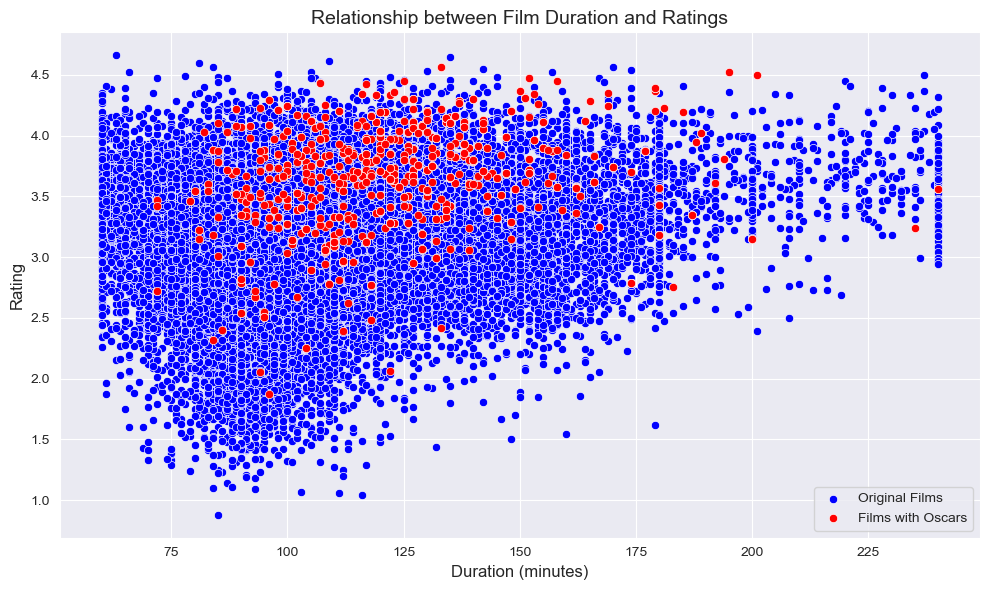

In [612]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='minute', y='rating', data=contemporary_feature_film, alpha=1, color="blue", label="Original Films"
)

sns.scatterplot(
    x='minute', y='rating', data=contemporary_oscars, alpha=1, color="red", label="Films with Oscars"
)

plt.title("Relationship between Film Duration and Ratings", fontsize=14)
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(True)

plt.legend()

plt.tight_layout()
plt.show()

It is possible to notice that there are no films lasting less than 75 minutes that have won an Oscar. In fact, there is a greater concentration among films with a duration between 90 and 140 minutes and with an average rating between 3.5 and 4.

In [613]:
contemporary_oscars.loc[(contemporary_oscars['rating'] < 2)]

id movie_title    date                         tagline  \
4262  1029888        Vice  2015.0  Where the future is your past.   

                                            description  minute  rating  \
4262  Julian Michaels has designed the ultimate reso...    96.0    1.87   

                           _id  year_film  year_ceremony  ceremony  \
4262  67de8c8cc8c9f9b21d2f0108       2018           2019        91   

                    category                                           name  \
4262  MAKEUP AND HAIRSTYLING  Greg Cannom, Kate Biscoe and Patricia Dehaney   

      winner  
4262    True

Vice won the Oscar in 2017 but received an average rating of 1.87

In [614]:
contemporary_oscars.loc[(contemporary_oscars['minute'] >= 240)]

id  movie_title    date tagline  \
3955  1020524  Howards End  2017.0    None   
3957  1020524  Howards End  2017.0    None   
3963  1020524  Howards End  2017.0    None   
6265  1168967      Lincoln  1992.0    None   
6274  1168967      Lincoln  1992.0    None   

                                            description  minute  rating  \
3955  The social and class divisions in early 20th c...   240.0    3.56   
3957  The social and class divisions in early 20th c...   240.0    3.56   
3963  The social and class divisions in early 20th c...   240.0    3.56   
6265  Famous actors read testimonies from people clo...   240.0     NaN   
6274  Famous actors read testimonies from people clo...   240.0     NaN   

                           _id  year_film  year_ceremony  ceremony  \
3955  67de8c8cc8c9f9b21d2ef4fe       1992           1993        65   
3957  67de8c8cc8c9f9b21d2ef506       1992           1993        65   
3963  67de8c8cc8c9f9b21d2ef554       1992           1993        65   
6265  67de8c8cc8c9f9b21d2efdd9       2012           2013        85   
6274  67de8c8cc8c9f9b21d2efe2e       2012           2013        85   

                                               category  \
3955                          ACTRESS IN A LEADING ROLE   
3957                                      ART DIRECTION   
3963  WRITING (Screenplay Based on Material Previous...   
6265                            ACTOR IN A LEADING ROLE   
6274                                  PRODUCTION DESIGN   

                                                   name  winner  
3955                                      Emma Thompson    True  
3957  Art Direction:  Luciana Arrighi;  Set Decorati...    True  
3963                               Ruth Prawer Jhabvala    True  
6265                                   Daniel Day-Lewis    True  
6274  Production Design: Rick Carter; Set Decoration...    True

Howards End won the Oscar in 1993. It is one of the longest-running film to win an Oscar.

Here are the two films on the chart highlighted in pink

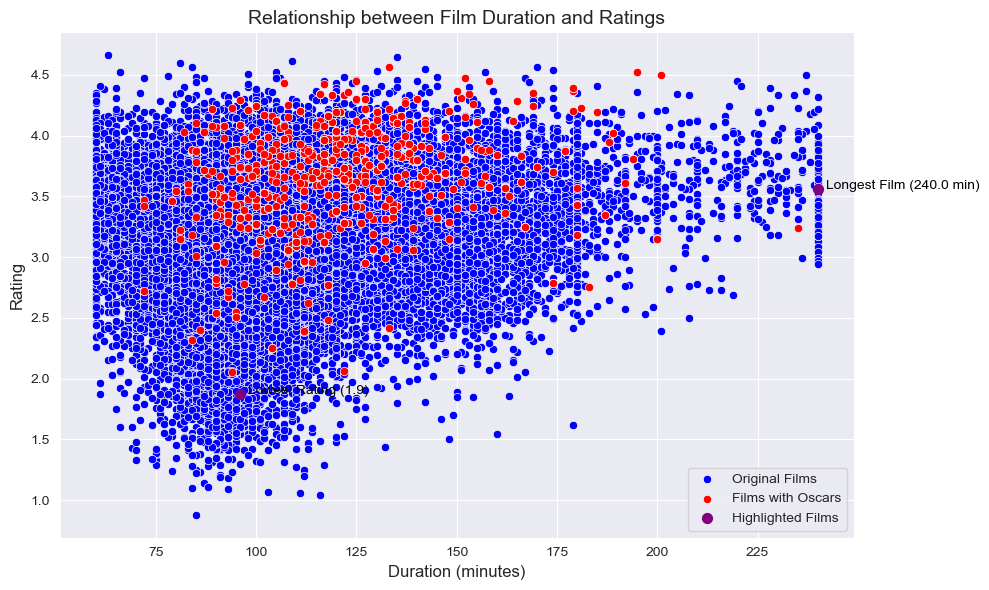

In [615]:
valid_data = contemporary_oscars[contemporary_oscars['minute'].notna() & contemporary_oscars['rating'].notna()]
valid_data = valid_data[np.isfinite(valid_data['minute']) & np.isfinite(valid_data['rating'])]

lowest_rating_film = valid_data.loc[valid_data['rating'].idxmin()]
longest_duration_film = valid_data.loc[valid_data['minute'].idxmax()]

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='minute', y='rating', data=contemporary_feature_film,
    alpha=1, color="blue", label="Original Films"
)

sns.scatterplot(
    x='minute', y='rating', data=contemporary_oscars,
    alpha=1, color="red", label="Films with Oscars"
)

plt.scatter(
    x=[lowest_rating_film['minute'], longest_duration_film['minute']],
    y=[lowest_rating_film['rating'], longest_duration_film['rating']],
    color='purple', s=50, label="Highlighted Films"
)

plt.text(
    lowest_rating_film['minute'] + 2, lowest_rating_film['rating'],
    f"Lowest Rating ({lowest_rating_film['rating']:.1f})", fontsize=10, color='black'
)
plt.text(
    longest_duration_film['minute'] + 2, longest_duration_film['rating'],
    f"Longest Film ({longest_duration_film['minute']} min)", fontsize=10, color='black'
)

plt.title("Relationship between Film Duration and Ratings", fontsize=14)
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(True)

plt.legend()

plt.tight_layout()
plt.show()

Unusual Oscar Records and Landmark Wins.

This project translated the vast history of cinema into a tangible data landscape. Through the interactive environment of Jupyter Notebook, we navigated this terrain, visualizing global production trends, identifying influential figures, and uncovering the patterns that define cinematic eras.
Our data-driven approach quantifies the "what" and "where" of film's evolution, but in doing so, it reminds us of the art form's true essence. It confirms that while we can measure decades and runtimes, a film's lasting impact lies elsewhere. In a world where everything moves fast, cinema continues to take care of its time: and it is not how long a film lasts that makes the difference, but how that time is used.